In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [3]:
data_df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
data_df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data_df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values in our dataset.

# EDA

In [7]:
data_df.groupby('DEATH_EVENT').mean()

age   anaemia  creatinine_phosphokinase  diabetes  \
DEATH_EVENT                                                            
0            58.761906  0.408867                540.054187  0.418719   
1            65.215281  0.479167                670.197917  0.416667   

             ejection_fraction  high_blood_pressure      platelets  \
DEATH_EVENT                                                          
0                     40.26601             0.325123  266657.489901   
1                     33.46875             0.406250  256381.044792   

             serum_creatinine  serum_sodium       sex   smoking        time  
DEATH_EVENT                                                                  
0                    1.184877    137.216749  0.650246  0.325123  158.339901  
1                    1.835833    135.375000  0.645833  0.312500   70.885417

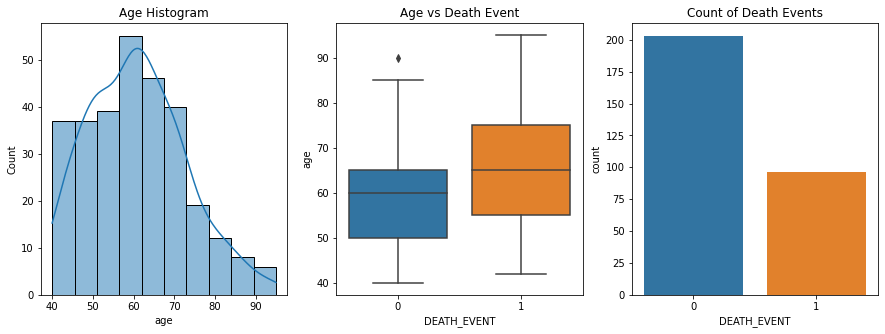

In [8]:
#Age vs. Death Event. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))

sns.histplot(x='age', data=data_df, ax=axes[0],kde=True)
axes[0].set_title("Age Histogram")

sns.boxplot(x='DEATH_EVENT', y='age', data=data_df, ax=axes[1])
axes[1].set_title("Age vs Death Event")


sns.countplot(x='DEATH_EVENT', data=data_df, ax=axes[2])
axes[2].set_title("Count of Death Events")
plt.show()

#### Most of the poeople are bekiw age 65. The median for people who died is 65. Only 1/3 of people died. 

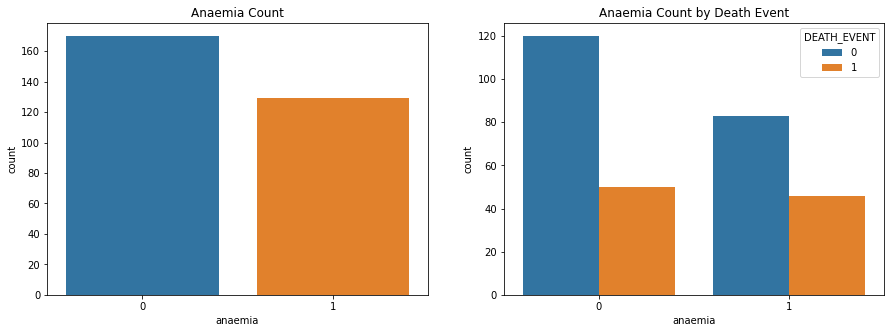

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='anaemia', data=data_df, ax=axes[0])
axes[0].set_title("Anaemia Count")

sns.countplot(x='anaemia', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Anaemia Count by Death Event")
plt.show()

#### Most people who died were not anaemic.

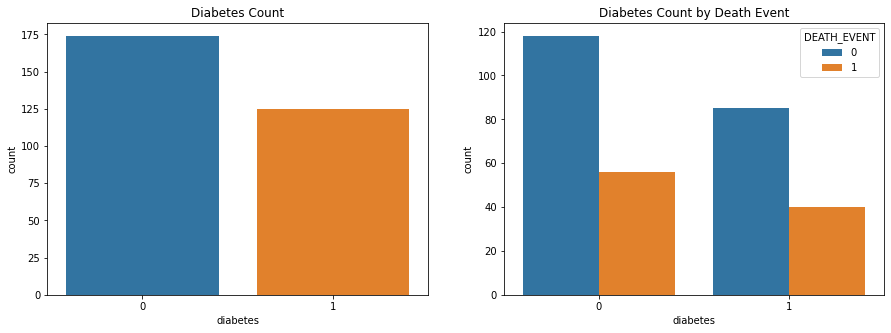

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='diabetes', data=data_df, ax=axes[0])
axes[0].set_title("Diabetes Count")

sns.countplot(x='diabetes', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Diabetes Count by Death Event")
plt.show()

#### In the original dataset, people without diabetes have a higher count. However, Death_event for people with and without diabetes is almost the same. 

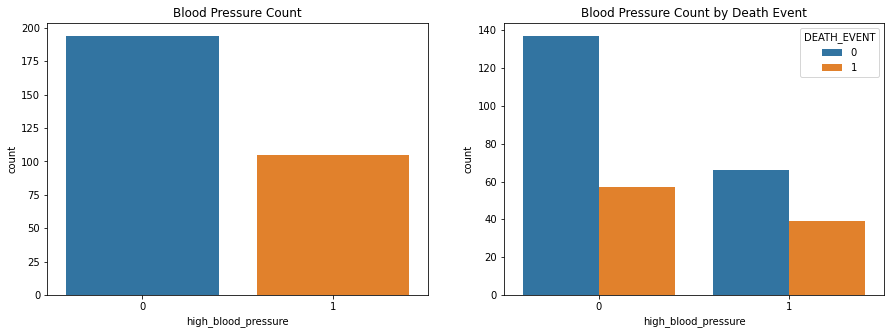

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='high_blood_pressure', data=data_df, ax=axes[0])
axes[0].set_title("Blood Pressure Count")

sns.countplot(x='high_blood_pressure', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Blood Pressure Count by Death Event")
plt.show()

#### The number of people having a high blood pressure is approximately 45-50% lower than the number of people who do not have a high blood pressure. Furthermore, People who do not have high blood pressure have a slightly higher count of death than people with blood pressure.

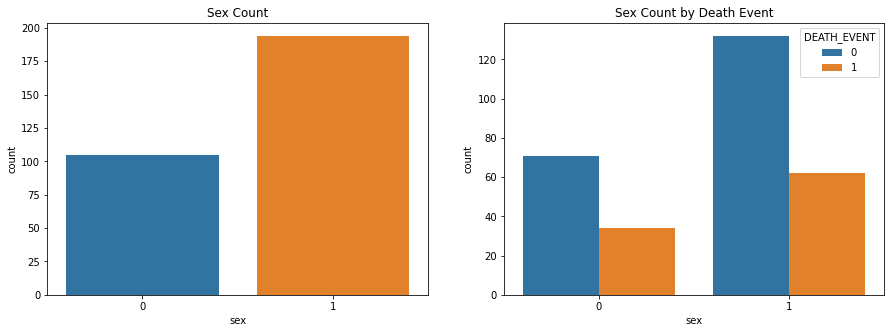

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='sex', data=data_df, ax=axes[0])
axes[0].set_title("Sex Count")

sns.countplot(x='sex', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Sex Count by Death Event")
plt.show()

#### The number of people with sex 1 is higher in the original dataset, and they also have a higher count of death.

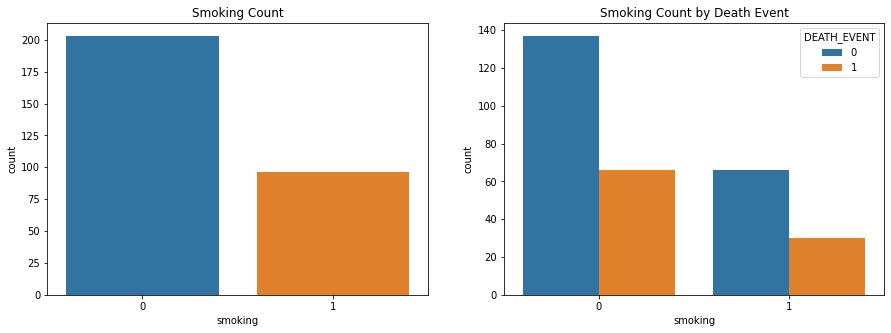

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='smoking', data=data_df, ax=axes[0])
axes[0].set_title("Smoking Count")

sns.countplot(x='smoking', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Smoking Count by Death Event")
plt.show()

#### Using the above plots, we can deduce that people who do not smoke have a higher death count than people who do smoke.

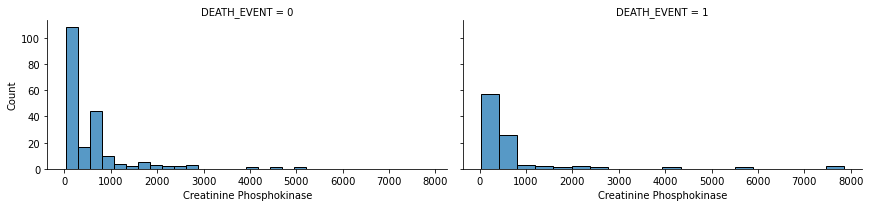

In [14]:
fig = sns.FacetGrid(data_df, col = "DEATH_EVENT", aspect = 2)
fig.map(sns.histplot, 'creatinine_phosphokinase', bins = 20)
fig.set_axis_labels("Creatinine Phosphokinase", "Count")

#### Almost everyone have a creatinine phosphokinase level from 0-1000. Although there are some outliers in the range 4000-8000, we can deduce that creatinine_phosphokinase is not strongly correlated to the death rate.

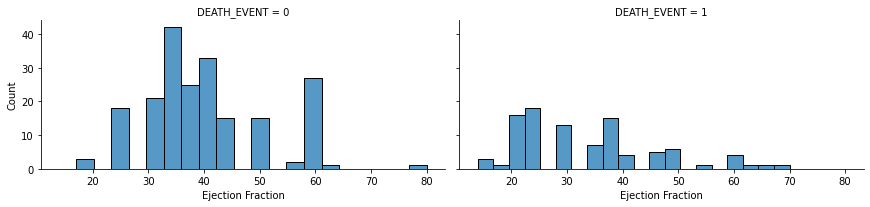

In [15]:
fig = sns.FacetGrid(data_df, col = "DEATH_EVENT", aspect = 2)
fig.map(sns.histplot, 'ejection_fraction', bins = 20)
fig.set_axis_labels("Ejection Fraction", "Count")

#### The death event is 1 for people with a lower ejection fraction. People who are alive have a higher ejection fraction.

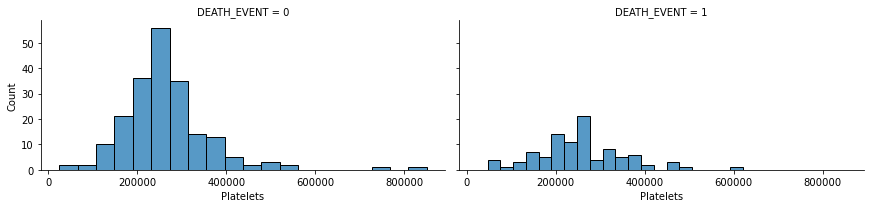

In [16]:
fig = sns.FacetGrid(data_df, col = "DEATH_EVENT", aspect = 2)
fig.map(sns.histplot, 'platelets', bins = 20)
fig.set_axis_labels("Platelets", "Count")

#### Almost everyone have platelets in the range of 500-40000. People who are alive have a greater platelet count than people who died. However, this doesn't show a definite pattern.

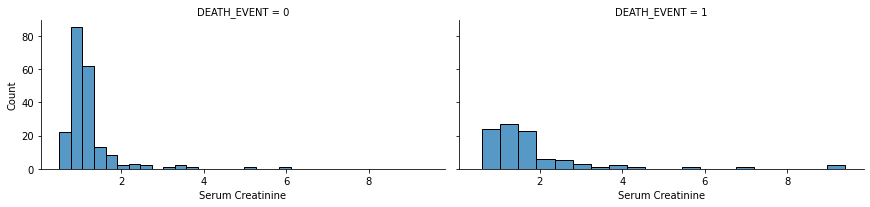

In [17]:
fig = sns.FacetGrid(data_df, col = "DEATH_EVENT", aspect = 2)
fig.map(sns.histplot, 'serum_creatinine', bins = 20)
fig.set_axis_labels("Serum Creatinine", "Count")

#### Although there are some outliers, the number of deaths are higher with people with lower serum creatinine level.

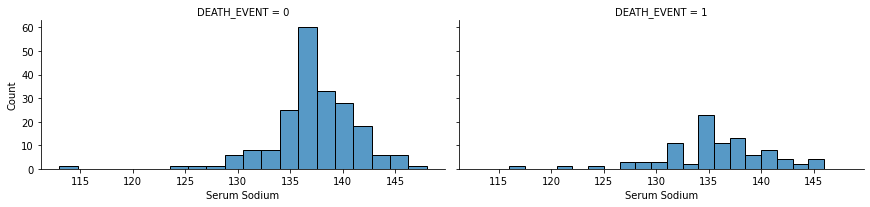

In [18]:
fig = sns.FacetGrid(data_df, col = "DEATH_EVENT", aspect = 2)
fig.map(sns.histplot, 'serum_sodium', bins = 20)
fig.set_axis_labels("Serum Sodium", "Count")

#### Most people with a serum sodium level in the range of 135-140 are alive. Around 50% of those are dead.

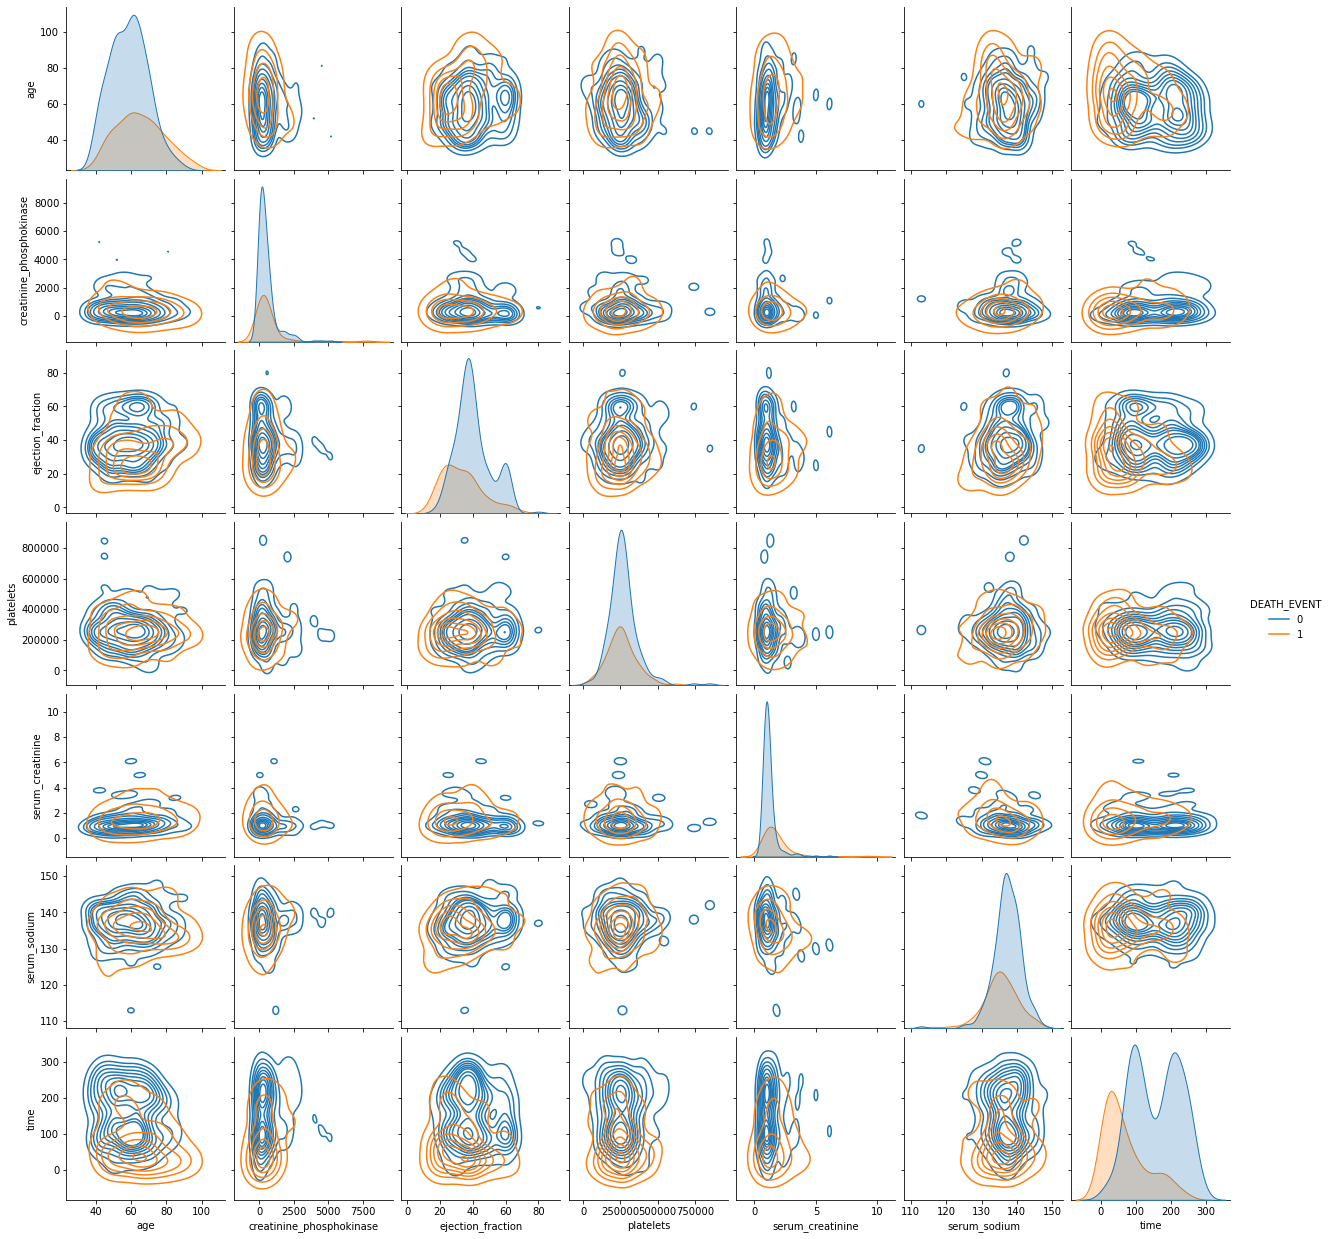

In [28]:
numeric_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']
numeric_df = data_df.loc[:, numeric_cols]
sns.pairplot(data=numeric_df, hue='DEATH_EVENT', kind='kde')
plt.show()

#### Most of the data points overlap, the ones towards the boundaries distingush death event. 

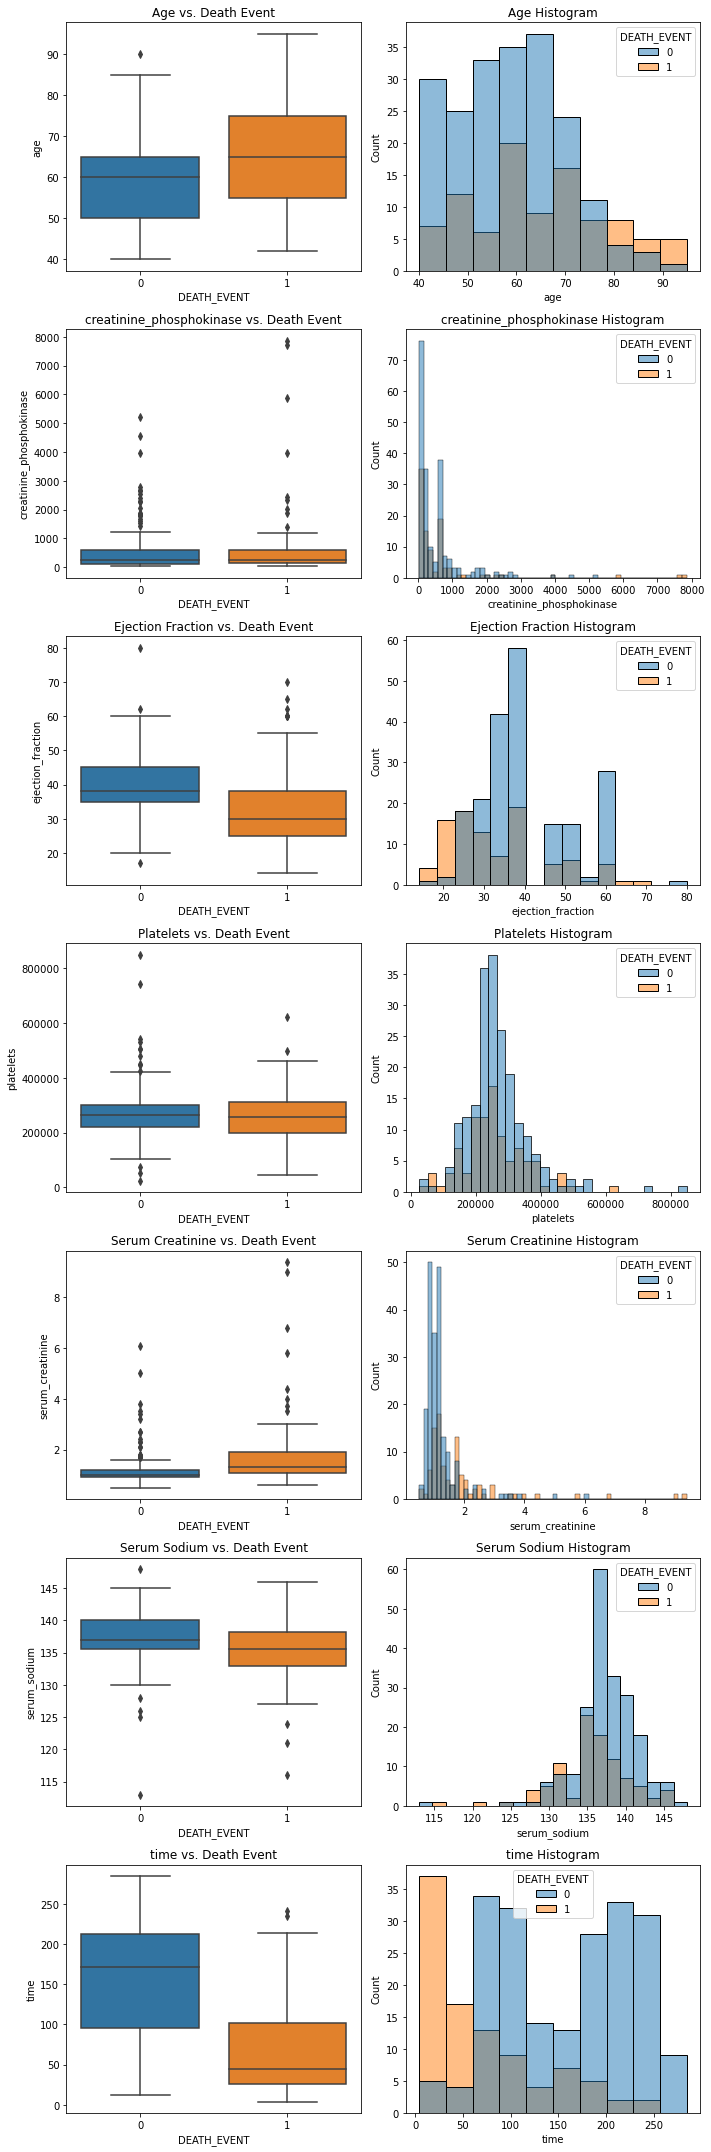

In [20]:
#plot regression plots for all continous variables. 
column_names = np.array(['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium', 'time'])
graph_names = np.array(['Age', 'creatinine_phosphokinase','Ejection Fraction','Platelets','Serum Creatinine','Serum Sodium', 'time'])
fig, axes = plt.subplots(figsize=(10,30), ncols=2, nrows=column_names.shape[0])
for row in range(column_names.shape[0]):
    sns.boxplot(x='DEATH_EVENT', y=column_names[row], data=data_df, ax=axes[row, 0])
    axes[row,0].set_title(f'{graph_names[row]} vs. Death Event')
    
    sns.histplot(x=column_names[row], hue='DEATH_EVENT', data=data_df, ax=axes[row, 1])
    axes[row,1].set_title(f'{graph_names[row]} Histogram')

fig.tight_layout()
plt.show()

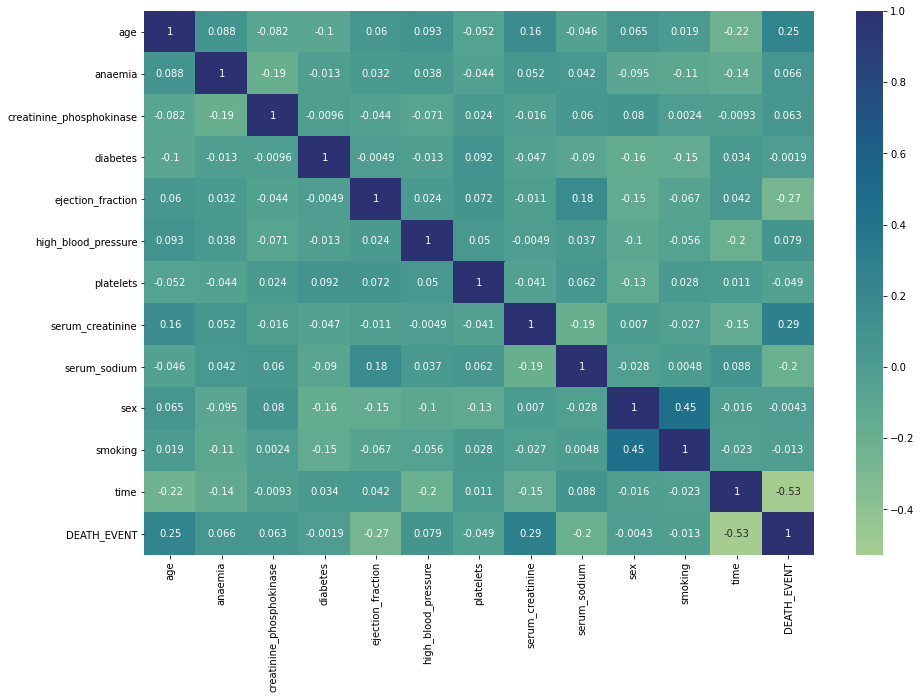

In [21]:
#Correlation.
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), cmap='crest', annot=True)
plt.show()

#### There is not much correlation between any of the features

# Feature Extraction and Pre-processing

In [22]:
#The following features were determined by step-wise logistic regression. i.e. each one was removed and the accuracy was observed.
processed = data_df.drop(['diabetes', 'smoking','sex','platelets','anaemia','creatinine_phosphokinase'], axis=1)

# processed = data_df
X = processed.loc[:, processed.columns != 'DEATH_EVENT']
y = processed.loc[:, 'DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# #Standard Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#-------------------------------------------------------
# scores = []
# columns = processed.columns.tolist()
# columns = ["--None--"] + columns
# columns.remove("DEATH_EVENT")
# model = LogisticRegression()
# for column in columns:
#     X = processed.loc[:, (processed.columns != 'DEATH_EVENT') & (processed.columns != column)]
#     y = processed['DEATH_EVENT']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.fit_transform(X_test)
    
#     model.fit(X_train_scaled, y_train)
#     predictions = model.predict(X_test_scaled)
#     score = model.score(X_test_scaled, y_test)
#     scores.append([column, score])
# print(scores)


# step_wise_df = pd.DataFrame(data=scores, columns=['feature', 'score'])
# step_wise_df.sort_values(by="score", inplace=True)
# step_wise_df

# Model Creation and Training

#### Logistic Regression

In [23]:
model = LogisticRegression(solver='liblinear')
kf = model_selection.StratifiedKFold(n_splits=5)
cv_scores = model_selection.cross_val_score(estimator=model, X=X, y=y)
print(f'Best score: {cv_scores.mean()}')

# cm = metrics.confusion_matrix(y_test, predictions)
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, annot=True, cmap='Blues_r')
# plt.xlabel("Prediction Label")
# plt.ylabel("Actual Label")
# plt.title(f'Accuracy: {score}', size=10)
# plt.show()

Best score: 0.7889265536723163


#### K Nearest Neighbor

In [24]:
param_grid = {
    "n_neighbors" : np.arange(1, 50, 1),
}

model = model_selection.GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    scoring='accuracy',
    cv=5
)

model.fit(X, y)
print(f'Best Score: {model.best_score_}')
print(model.best_estimator_.get_params())
# predictions = model.predict(X_test)
# test_score = model.score(X_test, y_test)
        
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
# cm = metrics.confusion_matrix(y_test, predictions)
# sns.heatmap(cm, annot=True, cmap='Blues_r', ax=axes)
# axes.set_xlabel("Prediction Label")
# axes.set_ylabel("Actual Label")
# axes.set_title(f'Accuracy: {test_score}')
# plt.show()

Best Score: 0.7922598870056496
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 38, 'p': 2, 'weights': 'uniform'}


#### Decision Tree

In [25]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best", "random"],
    "max_leaf_nodes" : np.arange(2,100,1),
    "max_features" : np.arange(1,X_train.shape[1], 1).tolist()
}

model = model_selection.GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_grid,
    verbose=10,
    scoring='accuracy',
    cv=10
)

model.fit(X, y)
print(f'Best Score: {model.best_score_}')
print(model.best_estimator_.get_params())
# predictions = model.predict(X_test)
# test_score = model.score(X_test, y_test)

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
# cm = metrics.confusion_matrix(y_test, predictions)
# sns.heatmap(cm, annot=True, cmap='Blues_r', ax=axes)
# axes.set_xlabel("Prediction Label")
# axes.set_ylabel("Actual Label")
# axes.set_title(f'Test Accuracy: {test_score}')
# plt.show()

Fitting 10 folds for each of 1960 candidates, totalling 19600 fits
[CV 1/10; 1/1960] START criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best
[CV 1/10; 1/1960] END criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 2/10; 1/1960] START criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best
[CV 2/10; 1/1960] END criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 3/10; 1/1960] START criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best
[CV 3/10; 1/1960] END criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 4/10; 1/1960] START criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best
[CV 4/10; 1/1960] END criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 5/10; 1/1960] START criterion=gini, max_features=1, max_leaf_nodes=2, splitter=best
[CV 5/10; 1/1960] END criterion=gini, max_features=1, max_leaf_nodes=

[CV 8/10; 6/1960] END criterion=gini, max_features=1, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 9/10; 6/1960] START criterion=gini, max_features=1, max_leaf_nodes=4, splitter=random
[CV 9/10; 6/1960] END criterion=gini, max_features=1, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 10/10; 6/1960] START criterion=gini, max_features=1, max_leaf_nodes=4, splitter=random
[CV 10/10; 6/1960] END criterion=gini, max_features=1, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 1/10; 7/1960] START criterion=gini, max_features=1, max_leaf_nodes=5, splitter=best
[CV 1/10; 7/1960] END criterion=gini, max_features=1, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 2/10; 7/1960] START criterion=gini, max_features=1, max_leaf_nodes=5, splitter=best
[CV 2/10; 7/1960] END criterion=gini, max_features=1, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 3/10; 7/1960] START criterion=gini, max_features=1, max_leaf_nodes=5, splitter=best
[CV 3/10; 7/1960] 

[CV 7/10; 12/1960] END criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 8/10; 12/1960] START criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random
[CV 8/10; 12/1960] END criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 9/10; 12/1960] START criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random
[CV 9/10; 12/1960] END criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 10/10; 12/1960] START criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random
[CV 10/10; 12/1960] END criterion=gini, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 1/10; 13/1960] START criterion=gini, max_features=1, max_leaf_nodes=8, splitter=best
[CV 1/10; 13/1960] END criterion=gini, max_features=1, max_leaf_nodes=8, splitter=best; total time=   0.0s
[CV 2/10; 13/1960] START criterion=gini, max_features=1, max_leaf_nodes=8, splitter=best
[CV 

[CV 1/10; 18/1960] END criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 2/10; 18/1960] START criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random
[CV 2/10; 18/1960] END criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 3/10; 18/1960] START criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random
[CV 3/10; 18/1960] END criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 4/10; 18/1960] START criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random
[CV 4/10; 18/1960] END criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 5/10; 18/1960] START criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random
[CV 5/10; 18/1960] END criterion=gini, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 6/10; 18/1960] START criterion=gini, max_features=1, max_leaf_nodes=10, splitt

[CV 2/10; 23/1960] END criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 3/10; 23/1960] START criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best
[CV 3/10; 23/1960] END criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 4/10; 23/1960] START criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best
[CV 4/10; 23/1960] END criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 5/10; 23/1960] START criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best
[CV 5/10; 23/1960] END criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 6/10; 23/1960] START criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best
[CV 6/10; 23/1960] END criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 7/10; 23/1960] START criterion=gini, max_features=1, max_leaf_nodes=13, splitter=best
[CV 7/10; 

[CV 3/10; 28/1960] END criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 4/10; 28/1960] START criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random
[CV 4/10; 28/1960] END criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 5/10; 28/1960] START criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random
[CV 5/10; 28/1960] END criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 6/10; 28/1960] START criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random
[CV 6/10; 28/1960] END criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 7/10; 28/1960] START criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random
[CV 7/10; 28/1960] END criterion=gini, max_features=1, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 8/10; 28/1960] START criterion=gini, max_features=1, max_leaf_nodes=15, splitt

[CV 5/10; 34/1960] END criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 6/10; 34/1960] START criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random
[CV 6/10; 34/1960] END criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 7/10; 34/1960] START criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random
[CV 7/10; 34/1960] END criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 8/10; 34/1960] START criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random
[CV 8/10; 34/1960] END criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 9/10; 34/1960] START criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random
[CV 9/10; 34/1960] END criterion=gini, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 10/10; 34/1960] START criterion=gini, max_features=1, max_leaf_nodes=18, split

[CV 4/10; 40/1960] END criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 5/10; 40/1960] START criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random
[CV 5/10; 40/1960] END criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 6/10; 40/1960] START criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random
[CV 6/10; 40/1960] END criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 7/10; 40/1960] START criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random
[CV 7/10; 40/1960] END criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 8/10; 40/1960] START criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random
[CV 8/10; 40/1960] END criterion=gini, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 9/10; 40/1960] START criterion=gini, max_features=1, max_leaf_nodes=21, splitt

[CV 9/10; 45/1960] END criterion=gini, max_features=1, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 10/10; 45/1960] START criterion=gini, max_features=1, max_leaf_nodes=24, splitter=best
[CV 10/10; 45/1960] END criterion=gini, max_features=1, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 1/10; 46/1960] START criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random
[CV 1/10; 46/1960] END criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 2/10; 46/1960] START criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random
[CV 2/10; 46/1960] END criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 3/10; 46/1960] START criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random
[CV 3/10; 46/1960] END criterion=gini, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 4/10; 46/1960] START criterion=gini, max_features=1, max_leaf_nodes=24, splitter=r

[CV 7/10; 51/1960] END criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 8/10; 51/1960] START criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best
[CV 8/10; 51/1960] END criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 9/10; 51/1960] START criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best
[CV 9/10; 51/1960] END criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 10/10; 51/1960] START criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best
[CV 10/10; 51/1960] END criterion=gini, max_features=1, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 1/10; 52/1960] START criterion=gini, max_features=1, max_leaf_nodes=27, splitter=random
[CV 1/10; 52/1960] END criterion=gini, max_features=1, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 2/10; 52/1960] START criterion=gini, max_features=1, max_leaf_nodes=27, splitter=random
[C

[CV 5/10; 57/1960] END criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 6/10; 57/1960] START criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best
[CV 6/10; 57/1960] END criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 7/10; 57/1960] START criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best
[CV 7/10; 57/1960] END criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 8/10; 57/1960] START criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best
[CV 8/10; 57/1960] END criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 9/10; 57/1960] START criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best
[CV 9/10; 57/1960] END criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 10/10; 57/1960] START criterion=gini, max_features=1, max_leaf_nodes=30, splitter=best
[CV 10/10

[CV 6/10; 63/1960] END criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 7/10; 63/1960] START criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best
[CV 7/10; 63/1960] END criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 8/10; 63/1960] START criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best
[CV 8/10; 63/1960] END criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 9/10; 63/1960] START criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best
[CV 9/10; 63/1960] END criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 10/10; 63/1960] START criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best
[CV 10/10; 63/1960] END criterion=gini, max_features=1, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 1/10; 64/1960] START criterion=gini, max_features=1, max_leaf_nodes=33, splitter=random
[CV 1/

[CV 5/10; 69/1960] END criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 6/10; 69/1960] START criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best
[CV 6/10; 69/1960] END criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 7/10; 69/1960] START criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best
[CV 7/10; 69/1960] END criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 8/10; 69/1960] START criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best
[CV 8/10; 69/1960] END criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 9/10; 69/1960] START criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best
[CV 9/10; 69/1960] END criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 10/10; 69/1960] START criterion=gini, max_features=1, max_leaf_nodes=36, splitter=best
[CV 10/10

[CV 3/10; 75/1960] END criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 4/10; 75/1960] START criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best
[CV 4/10; 75/1960] END criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 5/10; 75/1960] START criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best
[CV 5/10; 75/1960] END criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 6/10; 75/1960] START criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best
[CV 6/10; 75/1960] END criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 7/10; 75/1960] START criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best
[CV 7/10; 75/1960] END criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 8/10; 75/1960] START criterion=gini, max_features=1, max_leaf_nodes=39, splitter=best
[CV 8/10; 

[CV 6/10; 80/1960] END criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random; total time=   0.0s
[CV 7/10; 80/1960] START criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random
[CV 7/10; 80/1960] END criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random; total time=   0.0s
[CV 8/10; 80/1960] START criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random
[CV 8/10; 80/1960] END criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random; total time=   0.0s
[CV 9/10; 80/1960] START criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random
[CV 9/10; 80/1960] END criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random; total time=   0.0s
[CV 10/10; 80/1960] START criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random
[CV 10/10; 80/1960] END criterion=gini, max_features=1, max_leaf_nodes=41, splitter=random; total time=   0.0s
[CV 1/10; 81/1960] START criterion=gini, max_features=1, max_leaf_nodes=42, spli

[CV 2/10; 85/1960] END criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 3/10; 85/1960] START criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best
[CV 3/10; 85/1960] END criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 4/10; 85/1960] START criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best
[CV 4/10; 85/1960] END criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 5/10; 85/1960] START criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best
[CV 5/10; 85/1960] END criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 6/10; 85/1960] START criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best
[CV 6/10; 85/1960] END criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 7/10; 85/1960] START criterion=gini, max_features=1, max_leaf_nodes=44, splitter=best
[CV 7/10; 

[CV 7/10; 89/1960] END criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 8/10; 89/1960] START criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best
[CV 8/10; 89/1960] END criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 9/10; 89/1960] START criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best
[CV 9/10; 89/1960] END criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 10/10; 89/1960] START criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best
[CV 10/10; 89/1960] END criterion=gini, max_features=1, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 1/10; 90/1960] START criterion=gini, max_features=1, max_leaf_nodes=46, splitter=random
[CV 1/10; 90/1960] END criterion=gini, max_features=1, max_leaf_nodes=46, splitter=random; total time=   0.0s
[CV 2/10; 90/1960] START criterion=gini, max_features=1, max_leaf_nodes=46, splitter=random
[C

[CV 10/10; 93/1960] END criterion=gini, max_features=1, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 1/10; 94/1960] START criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random
[CV 1/10; 94/1960] END criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 2/10; 94/1960] START criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random
[CV 2/10; 94/1960] END criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 3/10; 94/1960] START criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random
[CV 3/10; 94/1960] END criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 4/10; 94/1960] START criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random
[CV 4/10; 94/1960] END criterion=gini, max_features=1, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 5/10; 94/1960] START criterion=gini, max_features=1, max_leaf_nodes=48, splitte

[CV 1/10; 100/1960] END criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 2/10; 100/1960] START criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random
[CV 2/10; 100/1960] END criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 3/10; 100/1960] START criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random
[CV 3/10; 100/1960] END criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 4/10; 100/1960] START criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random
[CV 4/10; 100/1960] END criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 5/10; 100/1960] START criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random
[CV 5/10; 100/1960] END criterion=gini, max_features=1, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 6/10; 100/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 3/10; 104/1960] END criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 4/10; 104/1960] START criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random
[CV 4/10; 104/1960] END criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 5/10; 104/1960] START criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random
[CV 5/10; 104/1960] END criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 6/10; 104/1960] START criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random
[CV 6/10; 104/1960] END criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 7/10; 104/1960] START criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random
[CV 7/10; 104/1960] END criterion=gini, max_features=1, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 8/10; 104/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 3/10; 109/1960] END criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 4/10; 109/1960] START criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best
[CV 4/10; 109/1960] END criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 5/10; 109/1960] START criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best
[CV 5/10; 109/1960] END criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 6/10; 109/1960] START criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best
[CV 6/10; 109/1960] END criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 7/10; 109/1960] START criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best
[CV 7/10; 109/1960] END criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 8/10; 109/1960] START criterion=gini, max_features=1, max_leaf_nodes=56, splitter=best


[CV 3/10; 114/1960] END criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 4/10; 114/1960] START criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random
[CV 4/10; 114/1960] END criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 5/10; 114/1960] START criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random
[CV 5/10; 114/1960] END criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 6/10; 114/1960] START criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random
[CV 6/10; 114/1960] END criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 7/10; 114/1960] START criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random
[CV 7/10; 114/1960] END criterion=gini, max_features=1, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 8/10; 114/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 9/10; 119/1960] END criterion=gini, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 10/10; 119/1960] START criterion=gini, max_features=1, max_leaf_nodes=61, splitter=best
[CV 10/10; 119/1960] END criterion=gini, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 1/10; 120/1960] START criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random
[CV 1/10; 120/1960] END criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random; total time=   0.0s
[CV 2/10; 120/1960] START criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random
[CV 2/10; 120/1960] END criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random; total time=   0.0s
[CV 3/10; 120/1960] START criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random
[CV 3/10; 120/1960] END criterion=gini, max_features=1, max_leaf_nodes=61, splitter=random; total time=   0.0s
[CV 4/10; 120/1960] START criterion=gini, max_features=1, max_leaf_nodes=61, 

[CV 1/10; 125/1960] END criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 2/10; 125/1960] START criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best
[CV 2/10; 125/1960] END criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 3/10; 125/1960] START criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best
[CV 3/10; 125/1960] END criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 4/10; 125/1960] START criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best
[CV 4/10; 125/1960] END criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 5/10; 125/1960] START criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best
[CV 5/10; 125/1960] END criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 6/10; 125/1960] START criterion=gini, max_features=1, max_leaf_nodes=64, splitter=best


[CV 2/10; 130/1960] END criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random; total time=   0.0s
[CV 3/10; 130/1960] START criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random
[CV 3/10; 130/1960] END criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random; total time=   0.0s
[CV 4/10; 130/1960] START criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random
[CV 4/10; 130/1960] END criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random; total time=   0.0s
[CV 5/10; 130/1960] START criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random
[CV 5/10; 130/1960] END criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random; total time=   0.0s
[CV 6/10; 130/1960] START criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random
[CV 6/10; 130/1960] END criterion=gini, max_features=1, max_leaf_nodes=66, splitter=random; total time=   0.0s
[CV 7/10; 130/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 7/10; 135/1960] END criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 8/10; 135/1960] START criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best
[CV 8/10; 135/1960] END criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 9/10; 135/1960] START criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best
[CV 9/10; 135/1960] END criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 10/10; 135/1960] START criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best
[CV 10/10; 135/1960] END criterion=gini, max_features=1, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 1/10; 136/1960] START criterion=gini, max_features=1, max_leaf_nodes=69, splitter=random
[CV 1/10; 136/1960] END criterion=gini, max_features=1, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 2/10; 136/1960] START criterion=gini, max_features=1, max_leaf_nodes=69, splitter

[CV 1/10; 141/1960] END criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 2/10; 141/1960] START criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best
[CV 2/10; 141/1960] END criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 3/10; 141/1960] START criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best
[CV 3/10; 141/1960] END criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 4/10; 141/1960] START criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best
[CV 4/10; 141/1960] END criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 5/10; 141/1960] START criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best
[CV 5/10; 141/1960] END criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 6/10; 141/1960] START criterion=gini, max_features=1, max_leaf_nodes=72, splitter=best


[CV 9/10; 145/1960] END criterion=gini, max_features=1, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 10/10; 145/1960] START criterion=gini, max_features=1, max_leaf_nodes=74, splitter=best
[CV 10/10; 145/1960] END criterion=gini, max_features=1, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 1/10; 146/1960] START criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random
[CV 1/10; 146/1960] END criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 2/10; 146/1960] START criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random
[CV 2/10; 146/1960] END criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 3/10; 146/1960] START criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random
[CV 3/10; 146/1960] END criterion=gini, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 4/10; 146/1960] START criterion=gini, max_features=1, max_leaf_nodes=74, 

[CV 10/10; 149/1960] END criterion=gini, max_features=1, max_leaf_nodes=76, splitter=best; total time=   0.0s
[CV 1/10; 150/1960] START criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random
[CV 1/10; 150/1960] END criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 2/10; 150/1960] START criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random
[CV 2/10; 150/1960] END criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 3/10; 150/1960] START criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random
[CV 3/10; 150/1960] END criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 4/10; 150/1960] START criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random
[CV 4/10; 150/1960] END criterion=gini, max_features=1, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 5/10; 150/1960] START criterion=gini, max_features=1, max_leaf_nodes=7

[CV 6/10; 155/1960] END criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best; total time=   0.0s
[CV 7/10; 155/1960] START criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best
[CV 7/10; 155/1960] END criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best; total time=   0.0s
[CV 8/10; 155/1960] START criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best
[CV 8/10; 155/1960] END criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best; total time=   0.0s
[CV 9/10; 155/1960] START criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best
[CV 9/10; 155/1960] END criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best; total time=   0.0s
[CV 10/10; 155/1960] START criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best
[CV 10/10; 155/1960] END criterion=gini, max_features=1, max_leaf_nodes=79, splitter=best; total time=   0.0s
[CV 1/10; 156/1960] START criterion=gini, max_features=1, max_leaf_nodes=79, splitter=ran

[CV 2/10; 160/1960] END criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 3/10; 160/1960] START criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random
[CV 3/10; 160/1960] END criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 4/10; 160/1960] START criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random
[CV 4/10; 160/1960] END criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 5/10; 160/1960] START criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random
[CV 5/10; 160/1960] END criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 6/10; 160/1960] START criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random
[CV 6/10; 160/1960] END criterion=gini, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 7/10; 160/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 8/10; 165/1960] END criterion=gini, max_features=1, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 9/10; 165/1960] START criterion=gini, max_features=1, max_leaf_nodes=84, splitter=best
[CV 9/10; 165/1960] END criterion=gini, max_features=1, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 10/10; 165/1960] START criterion=gini, max_features=1, max_leaf_nodes=84, splitter=best
[CV 10/10; 165/1960] END criterion=gini, max_features=1, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 1/10; 166/1960] START criterion=gini, max_features=1, max_leaf_nodes=84, splitter=random
[CV 1/10; 166/1960] END criterion=gini, max_features=1, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 2/10; 166/1960] START criterion=gini, max_features=1, max_leaf_nodes=84, splitter=random
[CV 2/10; 166/1960] END criterion=gini, max_features=1, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 3/10; 166/1960] START criterion=gini, max_features=1, max_leaf_nodes=84, spli

[CV 10/10; 169/1960] END criterion=gini, max_features=1, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 1/10; 170/1960] START criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random
[CV 1/10; 170/1960] END criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random; total time=   0.0s
[CV 2/10; 170/1960] START criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random
[CV 2/10; 170/1960] END criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random; total time=   0.0s
[CV 3/10; 170/1960] START criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random
[CV 3/10; 170/1960] END criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random; total time=   0.0s
[CV 4/10; 170/1960] START criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random
[CV 4/10; 170/1960] END criterion=gini, max_features=1, max_leaf_nodes=86, splitter=random; total time=   0.0s
[CV 5/10; 170/1960] START criterion=gini, max_features=1, max_leaf_nodes=8

[CV 10/10; 174/1960] END criterion=gini, max_features=1, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 1/10; 175/1960] START criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best
[CV 1/10; 175/1960] END criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 2/10; 175/1960] START criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best
[CV 2/10; 175/1960] END criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 3/10; 175/1960] START criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best
[CV 3/10; 175/1960] END criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 4/10; 175/1960] START criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best
[CV 4/10; 175/1960] END criterion=gini, max_features=1, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 5/10; 175/1960] START criterion=gini, max_features=1, max_leaf_nodes=89, splitter=be

[CV 7/10; 180/1960] END criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random; total time=   0.0s
[CV 8/10; 180/1960] START criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random
[CV 8/10; 180/1960] END criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random; total time=   0.0s
[CV 9/10; 180/1960] START criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random
[CV 9/10; 180/1960] END criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random; total time=   0.0s
[CV 10/10; 180/1960] START criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random
[CV 10/10; 180/1960] END criterion=gini, max_features=1, max_leaf_nodes=91, splitter=random; total time=   0.0s
[CV 1/10; 181/1960] START criterion=gini, max_features=1, max_leaf_nodes=92, splitter=best
[CV 1/10; 181/1960] END criterion=gini, max_features=1, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 2/10; 181/1960] START criterion=gini, max_features=1, max_leaf_nodes=92

[CV 3/10; 186/1960] END criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 4/10; 186/1960] START criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random
[CV 4/10; 186/1960] END criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 5/10; 186/1960] START criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random
[CV 5/10; 186/1960] END criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 6/10; 186/1960] START criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random
[CV 6/10; 186/1960] END criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 7/10; 186/1960] START criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random
[CV 7/10; 186/1960] END criterion=gini, max_features=1, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 8/10; 186/1960] START criterion=gini, max_features=1, max_leaf_nodes=

[CV 5/10; 192/1960] END criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 6/10; 192/1960] START criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random
[CV 6/10; 192/1960] END criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 7/10; 192/1960] START criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random
[CV 7/10; 192/1960] END criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 8/10; 192/1960] START criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random
[CV 8/10; 192/1960] END criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 9/10; 192/1960] START criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random
[CV 9/10; 192/1960] END criterion=gini, max_features=1, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 10/10; 192/1960] START criterion=gini, max_features=1, max_leaf_nodes

[CV 9/10; 196/1960] END criterion=gini, max_features=1, max_leaf_nodes=99, splitter=random; total time=   0.0s
[CV 10/10; 196/1960] START criterion=gini, max_features=1, max_leaf_nodes=99, splitter=random
[CV 10/10; 196/1960] END criterion=gini, max_features=1, max_leaf_nodes=99, splitter=random; total time=   0.0s
[CV 1/10; 197/1960] START criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best
[CV 1/10; 197/1960] END criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 2/10; 197/1960] START criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best
[CV 2/10; 197/1960] END criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 3/10; 197/1960] START criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best
[CV 3/10; 197/1960] END criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 4/10; 197/1960] START criterion=gini, max_features=2, max_leaf_nodes=2, splitter=best

[CV 10/10; 202/1960] END criterion=gini, max_features=2, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 1/10; 203/1960] START criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best
[CV 1/10; 203/1960] END criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 2/10; 203/1960] START criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best
[CV 2/10; 203/1960] END criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 3/10; 203/1960] START criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best
[CV 3/10; 203/1960] END criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 4/10; 203/1960] START criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best
[CV 4/10; 203/1960] END criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 5/10; 203/1960] START criterion=gini, max_features=2, max_leaf_nodes=5, splitter=best
[CV 5/1

[CV 5/10; 207/1960] END criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 6/10; 207/1960] START criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best
[CV 6/10; 207/1960] END criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 7/10; 207/1960] START criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best
[CV 7/10; 207/1960] END criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 8/10; 207/1960] START criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best
[CV 8/10; 207/1960] END criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 9/10; 207/1960] START criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best
[CV 9/10; 207/1960] END criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 10/10; 207/1960] START criterion=gini, max_features=2, max_leaf_nodes=7, splitter=best
[CV 10/10

[CV 6/10; 213/1960] END criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 7/10; 213/1960] START criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best
[CV 7/10; 213/1960] END criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 8/10; 213/1960] START criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best
[CV 8/10; 213/1960] END criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 9/10; 213/1960] START criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best
[CV 9/10; 213/1960] END criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 10/10; 213/1960] START criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best
[CV 10/10; 213/1960] END criterion=gini, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 1/10; 214/1960] START criterion=gini, max_features=2, max_leaf_nodes=10, splitter=ran

[CV 9/10; 217/1960] END criterion=gini, max_features=2, max_leaf_nodes=12, splitter=best; total time=   0.0s
[CV 10/10; 217/1960] START criterion=gini, max_features=2, max_leaf_nodes=12, splitter=best
[CV 10/10; 217/1960] END criterion=gini, max_features=2, max_leaf_nodes=12, splitter=best; total time=   0.0s
[CV 1/10; 218/1960] START criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random
[CV 1/10; 218/1960] END criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 2/10; 218/1960] START criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random
[CV 2/10; 218/1960] END criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 3/10; 218/1960] START criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random
[CV 3/10; 218/1960] END criterion=gini, max_features=2, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 4/10; 218/1960] START criterion=gini, max_features=2, max_leaf_nodes=12, 

[CV 2/10; 223/1960] END criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 3/10; 223/1960] START criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best
[CV 3/10; 223/1960] END criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 4/10; 223/1960] START criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best
[CV 4/10; 223/1960] END criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 5/10; 223/1960] START criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best
[CV 5/10; 223/1960] END criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 6/10; 223/1960] START criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best
[CV 6/10; 223/1960] END criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 7/10; 223/1960] START criterion=gini, max_features=2, max_leaf_nodes=15, splitter=best


[CV 5/10; 229/1960] END criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 6/10; 229/1960] START criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best
[CV 6/10; 229/1960] END criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 7/10; 229/1960] START criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best
[CV 7/10; 229/1960] END criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 8/10; 229/1960] START criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best
[CV 8/10; 229/1960] END criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 9/10; 229/1960] START criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best
[CV 9/10; 229/1960] END criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 10/10; 229/1960] START criterion=gini, max_features=2, max_leaf_nodes=18, splitter=best

[CV 6/10; 233/1960] END criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 7/10; 233/1960] START criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best
[CV 7/10; 233/1960] END criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 8/10; 233/1960] START criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best
[CV 8/10; 233/1960] END criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 9/10; 233/1960] START criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best
[CV 9/10; 233/1960] END criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 10/10; 233/1960] START criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best
[CV 10/10; 233/1960] END criterion=gini, max_features=2, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 1/10; 234/1960] START criterion=gini, max_features=2, max_leaf_nodes=20, splitter=ran

[CV 3/10; 239/1960] END criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 4/10; 239/1960] START criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best
[CV 4/10; 239/1960] END criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 5/10; 239/1960] START criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best
[CV 5/10; 239/1960] END criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 6/10; 239/1960] START criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best
[CV 6/10; 239/1960] END criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 7/10; 239/1960] START criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best
[CV 7/10; 239/1960] END criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 8/10; 239/1960] START criterion=gini, max_features=2, max_leaf_nodes=23, splitter=best


[CV 8/10; 243/1960] END criterion=gini, max_features=2, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 9/10; 243/1960] START criterion=gini, max_features=2, max_leaf_nodes=25, splitter=best
[CV 9/10; 243/1960] END criterion=gini, max_features=2, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 10/10; 243/1960] START criterion=gini, max_features=2, max_leaf_nodes=25, splitter=best
[CV 10/10; 243/1960] END criterion=gini, max_features=2, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 1/10; 244/1960] START criterion=gini, max_features=2, max_leaf_nodes=25, splitter=random
[CV 1/10; 244/1960] END criterion=gini, max_features=2, max_leaf_nodes=25, splitter=random; total time=   0.0s
[CV 2/10; 244/1960] START criterion=gini, max_features=2, max_leaf_nodes=25, splitter=random
[CV 2/10; 244/1960] END criterion=gini, max_features=2, max_leaf_nodes=25, splitter=random; total time=   0.0s
[CV 3/10; 244/1960] START criterion=gini, max_features=2, max_leaf_nodes=25, spli

[CV 9/10; 249/1960] END criterion=gini, max_features=2, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 10/10; 249/1960] START criterion=gini, max_features=2, max_leaf_nodes=28, splitter=best
[CV 10/10; 249/1960] END criterion=gini, max_features=2, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 1/10; 250/1960] START criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random
[CV 1/10; 250/1960] END criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random; total time=   0.0s
[CV 2/10; 250/1960] START criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random
[CV 2/10; 250/1960] END criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random; total time=   0.0s
[CV 3/10; 250/1960] START criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random
[CV 3/10; 250/1960] END criterion=gini, max_features=2, max_leaf_nodes=28, splitter=random; total time=   0.0s
[CV 4/10; 250/1960] START criterion=gini, max_features=2, max_leaf_nodes=28, 

[CV 3/10; 254/1960] END criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 4/10; 254/1960] START criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random
[CV 4/10; 254/1960] END criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 5/10; 254/1960] START criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random
[CV 5/10; 254/1960] END criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 6/10; 254/1960] START criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random
[CV 6/10; 254/1960] END criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 7/10; 254/1960] START criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random
[CV 7/10; 254/1960] END criterion=gini, max_features=2, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 8/10; 254/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 3/10; 260/1960] END criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 4/10; 260/1960] START criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random
[CV 4/10; 260/1960] END criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 5/10; 260/1960] START criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random
[CV 5/10; 260/1960] END criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 6/10; 260/1960] START criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random
[CV 6/10; 260/1960] END criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 7/10; 260/1960] START criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random
[CV 7/10; 260/1960] END criterion=gini, max_features=2, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 8/10; 260/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 8/10; 264/1960] END criterion=gini, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 9/10; 264/1960] START criterion=gini, max_features=2, max_leaf_nodes=35, splitter=random
[CV 9/10; 264/1960] END criterion=gini, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 10/10; 264/1960] START criterion=gini, max_features=2, max_leaf_nodes=35, splitter=random
[CV 10/10; 264/1960] END criterion=gini, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 1/10; 265/1960] START criterion=gini, max_features=2, max_leaf_nodes=36, splitter=best
[CV 1/10; 265/1960] END criterion=gini, max_features=2, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 2/10; 265/1960] START criterion=gini, max_features=2, max_leaf_nodes=36, splitter=best
[CV 2/10; 265/1960] END criterion=gini, max_features=2, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 3/10; 265/1960] START criterion=gini, max_features=2, max_leaf_nodes=36, sp

[CV 8/10; 270/1960] END criterion=gini, max_features=2, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 9/10; 270/1960] START criterion=gini, max_features=2, max_leaf_nodes=38, splitter=random
[CV 9/10; 270/1960] END criterion=gini, max_features=2, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 10/10; 270/1960] START criterion=gini, max_features=2, max_leaf_nodes=38, splitter=random
[CV 10/10; 270/1960] END criterion=gini, max_features=2, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 1/10; 271/1960] START criterion=gini, max_features=2, max_leaf_nodes=39, splitter=best
[CV 1/10; 271/1960] END criterion=gini, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 2/10; 271/1960] START criterion=gini, max_features=2, max_leaf_nodes=39, splitter=best
[CV 2/10; 271/1960] END criterion=gini, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 3/10; 271/1960] START criterion=gini, max_features=2, max_leaf_nodes=39, sp

[CV 2/10; 275/1960] END criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 3/10; 275/1960] START criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best
[CV 3/10; 275/1960] END criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 4/10; 275/1960] START criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best
[CV 4/10; 275/1960] END criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 5/10; 275/1960] START criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best
[CV 5/10; 275/1960] END criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 6/10; 275/1960] START criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best
[CV 6/10; 275/1960] END criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 7/10; 275/1960] START criterion=gini, max_features=2, max_leaf_nodes=41, splitter=best


[CV 1/10; 281/1960] END criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 2/10; 281/1960] START criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best
[CV 2/10; 281/1960] END criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 3/10; 281/1960] START criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best
[CV 3/10; 281/1960] END criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 4/10; 281/1960] START criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best
[CV 4/10; 281/1960] END criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 5/10; 281/1960] START criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best
[CV 5/10; 281/1960] END criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 6/10; 281/1960] START criterion=gini, max_features=2, max_leaf_nodes=44, splitter=best


[CV 5/10; 285/1960] END criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 6/10; 285/1960] START criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best
[CV 6/10; 285/1960] END criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 7/10; 285/1960] START criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best
[CV 7/10; 285/1960] END criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 8/10; 285/1960] START criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best
[CV 8/10; 285/1960] END criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 9/10; 285/1960] START criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best
[CV 9/10; 285/1960] END criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 10/10; 285/1960] START criterion=gini, max_features=2, max_leaf_nodes=46, splitter=best

[CV 4/10; 290/1960] END criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 5/10; 290/1960] START criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random
[CV 5/10; 290/1960] END criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 6/10; 290/1960] START criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random
[CV 6/10; 290/1960] END criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 7/10; 290/1960] START criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random
[CV 7/10; 290/1960] END criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 8/10; 290/1960] START criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random
[CV 8/10; 290/1960] END criterion=gini, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 9/10; 290/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 6/10; 295/1960] END criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 7/10; 295/1960] START criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best
[CV 7/10; 295/1960] END criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 8/10; 295/1960] START criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best
[CV 8/10; 295/1960] END criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 9/10; 295/1960] START criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best
[CV 9/10; 295/1960] END criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 10/10; 295/1960] START criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best
[CV 10/10; 295/1960] END criterion=gini, max_features=2, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 1/10; 296/1960] START criterion=gini, max_features=2, max_leaf_nodes=51, splitter=ran

[CV 5/10; 301/1960] END criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 6/10; 301/1960] START criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best
[CV 6/10; 301/1960] END criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 7/10; 301/1960] START criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best
[CV 7/10; 301/1960] END criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 8/10; 301/1960] START criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best
[CV 8/10; 301/1960] END criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 9/10; 301/1960] START criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best
[CV 9/10; 301/1960] END criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 10/10; 301/1960] START criterion=gini, max_features=2, max_leaf_nodes=54, splitter=best

[CV 3/10; 307/1960] END criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 4/10; 307/1960] START criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best
[CV 4/10; 307/1960] END criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 5/10; 307/1960] START criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best
[CV 5/10; 307/1960] END criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 6/10; 307/1960] START criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best
[CV 6/10; 307/1960] END criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 7/10; 307/1960] START criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best
[CV 7/10; 307/1960] END criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 8/10; 307/1960] START criterion=gini, max_features=2, max_leaf_nodes=57, splitter=best


[CV 4/10; 311/1960] END criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 5/10; 311/1960] START criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best
[CV 5/10; 311/1960] END criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 6/10; 311/1960] START criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best
[CV 6/10; 311/1960] END criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 7/10; 311/1960] START criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best
[CV 7/10; 311/1960] END criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 8/10; 311/1960] START criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best
[CV 8/10; 311/1960] END criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 9/10; 311/1960] START criterion=gini, max_features=2, max_leaf_nodes=59, splitter=best


[CV 3/10; 317/1960] END criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 4/10; 317/1960] START criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best
[CV 4/10; 317/1960] END criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 5/10; 317/1960] START criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best
[CV 5/10; 317/1960] END criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 6/10; 317/1960] START criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best
[CV 6/10; 317/1960] END criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 7/10; 317/1960] START criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best
[CV 7/10; 317/1960] END criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 8/10; 317/1960] START criterion=gini, max_features=2, max_leaf_nodes=62, splitter=best


[CV 9/10; 321/1960] END criterion=gini, max_features=2, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 10/10; 321/1960] START criterion=gini, max_features=2, max_leaf_nodes=64, splitter=best
[CV 10/10; 321/1960] END criterion=gini, max_features=2, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 1/10; 322/1960] START criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random
[CV 1/10; 322/1960] END criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 2/10; 322/1960] START criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random
[CV 2/10; 322/1960] END criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 3/10; 322/1960] START criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random
[CV 3/10; 322/1960] END criterion=gini, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 4/10; 322/1960] START criterion=gini, max_features=2, max_leaf_nodes=64, 

[CV 8/10; 327/1960] END criterion=gini, max_features=2, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 9/10; 327/1960] START criterion=gini, max_features=2, max_leaf_nodes=67, splitter=best
[CV 9/10; 327/1960] END criterion=gini, max_features=2, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 10/10; 327/1960] START criterion=gini, max_features=2, max_leaf_nodes=67, splitter=best
[CV 10/10; 327/1960] END criterion=gini, max_features=2, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 1/10; 328/1960] START criterion=gini, max_features=2, max_leaf_nodes=67, splitter=random
[CV 1/10; 328/1960] END criterion=gini, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 2/10; 328/1960] START criterion=gini, max_features=2, max_leaf_nodes=67, splitter=random
[CV 2/10; 328/1960] END criterion=gini, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 3/10; 328/1960] START criterion=gini, max_features=2, max_leaf_nodes=67, spli

[CV 1/10; 332/1960] END criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 2/10; 332/1960] START criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random
[CV 2/10; 332/1960] END criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 3/10; 332/1960] START criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random
[CV 3/10; 332/1960] END criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 4/10; 332/1960] START criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random
[CV 4/10; 332/1960] END criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 5/10; 332/1960] START criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random
[CV 5/10; 332/1960] END criterion=gini, max_features=2, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 6/10; 332/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 10/10; 337/1960] END criterion=gini, max_features=2, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 1/10; 338/1960] START criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random
[CV 1/10; 338/1960] END criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 2/10; 338/1960] START criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random
[CV 2/10; 338/1960] END criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 3/10; 338/1960] START criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random
[CV 3/10; 338/1960] END criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 4/10; 338/1960] START criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random
[CV 4/10; 338/1960] END criterion=gini, max_features=2, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 5/10; 338/1960] START criterion=gini, max_features=2, max_leaf_nodes=7

[CV 2/10; 342/1960] END criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 3/10; 342/1960] START criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random
[CV 3/10; 342/1960] END criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 4/10; 342/1960] START criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random
[CV 4/10; 342/1960] END criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 5/10; 342/1960] START criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random
[CV 5/10; 342/1960] END criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 6/10; 342/1960] START criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random
[CV 6/10; 342/1960] END criterion=gini, max_features=2, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 7/10; 342/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 6/10; 347/1960] END criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 7/10; 347/1960] START criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best
[CV 7/10; 347/1960] END criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 8/10; 347/1960] START criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best
[CV 8/10; 347/1960] END criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 9/10; 347/1960] START criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best
[CV 9/10; 347/1960] END criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 10/10; 347/1960] START criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best
[CV 10/10; 347/1960] END criterion=gini, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 1/10; 348/1960] START criterion=gini, max_features=2, max_leaf_nodes=77, splitter=ran

[CV 10/10; 353/1960] END criterion=gini, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 1/10; 354/1960] START criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random
[CV 1/10; 354/1960] END criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 2/10; 354/1960] START criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random
[CV 2/10; 354/1960] END criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 3/10; 354/1960] START criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random
[CV 3/10; 354/1960] END criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 4/10; 354/1960] START criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random
[CV 4/10; 354/1960] END criterion=gini, max_features=2, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 5/10; 354/1960] START criterion=gini, max_features=2, max_leaf_nodes=8

[CV 4/10; 358/1960] END criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 5/10; 358/1960] START criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random
[CV 5/10; 358/1960] END criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 6/10; 358/1960] START criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random
[CV 6/10; 358/1960] END criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 7/10; 358/1960] START criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random
[CV 7/10; 358/1960] END criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 8/10; 358/1960] START criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random
[CV 8/10; 358/1960] END criterion=gini, max_features=2, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 9/10; 358/1960] START criterion=gini, max_features=2, max_leaf_nodes=

[CV 9/10; 363/1960] END criterion=gini, max_features=2, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 10/10; 363/1960] START criterion=gini, max_features=2, max_leaf_nodes=85, splitter=best
[CV 10/10; 363/1960] END criterion=gini, max_features=2, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 1/10; 364/1960] START criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random
[CV 1/10; 364/1960] END criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 2/10; 364/1960] START criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random
[CV 2/10; 364/1960] END criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 3/10; 364/1960] START criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random
[CV 3/10; 364/1960] END criterion=gini, max_features=2, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 4/10; 364/1960] START criterion=gini, max_features=2, max_leaf_nodes=85, 

[CV 7/10; 369/1960] END criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 8/10; 369/1960] START criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best
[CV 8/10; 369/1960] END criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 9/10; 369/1960] START criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best
[CV 9/10; 369/1960] END criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 10/10; 369/1960] START criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best
[CV 10/10; 369/1960] END criterion=gini, max_features=2, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 1/10; 370/1960] START criterion=gini, max_features=2, max_leaf_nodes=88, splitter=random
[CV 1/10; 370/1960] END criterion=gini, max_features=2, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 2/10; 370/1960] START criterion=gini, max_features=2, max_leaf_nodes=88, splitter

[CV 10/10; 373/1960] END criterion=gini, max_features=2, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 1/10; 374/1960] START criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random
[CV 1/10; 374/1960] END criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 2/10; 374/1960] START criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random
[CV 2/10; 374/1960] END criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 3/10; 374/1960] START criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random
[CV 3/10; 374/1960] END criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 4/10; 374/1960] START criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random
[CV 4/10; 374/1960] END criterion=gini, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 5/10; 374/1960] START criterion=gini, max_features=2, max_leaf_nodes=9

[CV 4/10; 379/1960] END criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 5/10; 379/1960] START criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best
[CV 5/10; 379/1960] END criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 6/10; 379/1960] START criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best
[CV 6/10; 379/1960] END criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 7/10; 379/1960] START criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best
[CV 7/10; 379/1960] END criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 8/10; 379/1960] START criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best
[CV 8/10; 379/1960] END criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 9/10; 379/1960] START criterion=gini, max_features=2, max_leaf_nodes=93, splitter=best


[CV 2/10; 385/1960] END criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 3/10; 385/1960] START criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best
[CV 3/10; 385/1960] END criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 4/10; 385/1960] START criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best
[CV 4/10; 385/1960] END criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 5/10; 385/1960] START criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best
[CV 5/10; 385/1960] END criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 6/10; 385/1960] START criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best
[CV 6/10; 385/1960] END criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 7/10; 385/1960] START criterion=gini, max_features=2, max_leaf_nodes=96, splitter=best


[CV 7/10; 389/1960] END criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 8/10; 389/1960] START criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best
[CV 8/10; 389/1960] END criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 9/10; 389/1960] START criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best
[CV 9/10; 389/1960] END criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 10/10; 389/1960] START criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best
[CV 10/10; 389/1960] END criterion=gini, max_features=2, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 1/10; 390/1960] START criterion=gini, max_features=2, max_leaf_nodes=98, splitter=random
[CV 1/10; 390/1960] END criterion=gini, max_features=2, max_leaf_nodes=98, splitter=random; total time=   0.0s
[CV 2/10; 390/1960] START criterion=gini, max_features=2, max_leaf_nodes=98, splitter

[CV 6/10; 395/1960] END criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 7/10; 395/1960] START criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best
[CV 7/10; 395/1960] END criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 8/10; 395/1960] START criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best
[CV 8/10; 395/1960] END criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 9/10; 395/1960] START criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best
[CV 9/10; 395/1960] END criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 10/10; 395/1960] START criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best
[CV 10/10; 395/1960] END criterion=gini, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 1/10; 396/1960] START criterion=gini, max_features=3, max_leaf_nodes=3, splitter=random
[CV 1/

[CV 2/10; 400/1960] END criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 3/10; 400/1960] START criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random
[CV 3/10; 400/1960] END criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 4/10; 400/1960] START criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random
[CV 4/10; 400/1960] END criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 5/10; 400/1960] START criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random
[CV 5/10; 400/1960] END criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 6/10; 400/1960] START criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random
[CV 6/10; 400/1960] END criterion=gini, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 7/10; 400/1960] START criterion=gini, max_features=3, max_leaf_nodes=5, splitt

[CV 2/10; 406/1960] END criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random; total time=   0.0s
[CV 3/10; 406/1960] START criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random
[CV 3/10; 406/1960] END criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random; total time=   0.0s
[CV 4/10; 406/1960] START criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random
[CV 4/10; 406/1960] END criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random; total time=   0.0s
[CV 5/10; 406/1960] START criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random
[CV 5/10; 406/1960] END criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random; total time=   0.0s
[CV 6/10; 406/1960] START criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random
[CV 6/10; 406/1960] END criterion=gini, max_features=3, max_leaf_nodes=8, splitter=random; total time=   0.0s
[CV 7/10; 406/1960] START criterion=gini, max_features=3, max_leaf_nodes=8, splitt

[CV 9/10; 410/1960] END criterion=gini, max_features=3, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 10/10; 410/1960] START criterion=gini, max_features=3, max_leaf_nodes=10, splitter=random
[CV 10/10; 410/1960] END criterion=gini, max_features=3, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 1/10; 411/1960] START criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best
[CV 1/10; 411/1960] END criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best; total time=   0.0s
[CV 2/10; 411/1960] START criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best
[CV 2/10; 411/1960] END criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best; total time=   0.0s
[CV 3/10; 411/1960] START criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best
[CV 3/10; 411/1960] END criterion=gini, max_features=3, max_leaf_nodes=11, splitter=best; total time=   0.0s
[CV 4/10; 411/1960] START criterion=gini, max_features=3, max_leaf_nodes=11, splitt

[CV 9/10; 416/1960] END criterion=gini, max_features=3, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 10/10; 416/1960] START criterion=gini, max_features=3, max_leaf_nodes=13, splitter=random
[CV 10/10; 416/1960] END criterion=gini, max_features=3, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 1/10; 417/1960] START criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best
[CV 1/10; 417/1960] END criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 2/10; 417/1960] START criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best
[CV 2/10; 417/1960] END criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 3/10; 417/1960] START criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best
[CV 3/10; 417/1960] END criterion=gini, max_features=3, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 4/10; 417/1960] START criterion=gini, max_features=3, max_leaf_nodes=14, splitt

[CV 6/10; 421/1960] END criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 7/10; 421/1960] START criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best
[CV 7/10; 421/1960] END criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 8/10; 421/1960] START criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best
[CV 8/10; 421/1960] END criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 9/10; 421/1960] START criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best
[CV 9/10; 421/1960] END criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 10/10; 421/1960] START criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best
[CV 10/10; 421/1960] END criterion=gini, max_features=3, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 1/10; 422/1960] START criterion=gini, max_features=3, max_leaf_nodes=16, splitter=ran

[CV 1/10; 427/1960] END criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 2/10; 427/1960] START criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best
[CV 2/10; 427/1960] END criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 3/10; 427/1960] START criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best
[CV 3/10; 427/1960] END criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 4/10; 427/1960] START criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best
[CV 4/10; 427/1960] END criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 5/10; 427/1960] START criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best
[CV 5/10; 427/1960] END criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 6/10; 427/1960] START criterion=gini, max_features=3, max_leaf_nodes=19, splitter=best


[CV 2/10; 431/1960] END criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 3/10; 431/1960] START criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best
[CV 3/10; 431/1960] END criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 4/10; 431/1960] START criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best
[CV 4/10; 431/1960] END criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 5/10; 431/1960] START criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best
[CV 5/10; 431/1960] END criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 6/10; 431/1960] START criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best
[CV 6/10; 431/1960] END criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 7/10; 431/1960] START criterion=gini, max_features=3, max_leaf_nodes=21, splitter=best


[CV 7/10; 436/1960] END criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random; total time=   0.0s
[CV 8/10; 436/1960] START criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random
[CV 8/10; 436/1960] END criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random; total time=   0.0s
[CV 9/10; 436/1960] START criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random
[CV 9/10; 436/1960] END criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random; total time=   0.0s
[CV 10/10; 436/1960] START criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random
[CV 10/10; 436/1960] END criterion=gini, max_features=3, max_leaf_nodes=23, splitter=random; total time=   0.0s
[CV 1/10; 437/1960] START criterion=gini, max_features=3, max_leaf_nodes=24, splitter=best
[CV 1/10; 437/1960] END criterion=gini, max_features=3, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 2/10; 437/1960] START criterion=gini, max_features=3, max_leaf_nodes=24

[CV 10/10; 442/1960] END criterion=gini, max_features=3, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 1/10; 443/1960] START criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best
[CV 1/10; 443/1960] END criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 2/10; 443/1960] START criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best
[CV 2/10; 443/1960] END criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 3/10; 443/1960] START criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best
[CV 3/10; 443/1960] END criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 4/10; 443/1960] START criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best
[CV 4/10; 443/1960] END criterion=gini, max_features=3, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 5/10; 443/1960] START criterion=gini, max_features=3, max_leaf_nodes=27, splitter=be

[CV 1/10; 447/1960] END criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 2/10; 447/1960] START criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best
[CV 2/10; 447/1960] END criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 3/10; 447/1960] START criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best
[CV 3/10; 447/1960] END criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 4/10; 447/1960] START criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best
[CV 4/10; 447/1960] END criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 5/10; 447/1960] START criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best
[CV 5/10; 447/1960] END criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 6/10; 447/1960] START criterion=gini, max_features=3, max_leaf_nodes=29, splitter=best


[CV 7/10; 452/1960] END criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 8/10; 452/1960] START criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random
[CV 8/10; 452/1960] END criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 9/10; 452/1960] START criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random
[CV 9/10; 452/1960] END criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 10/10; 452/1960] START criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random
[CV 10/10; 452/1960] END criterion=gini, max_features=3, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 1/10; 453/1960] START criterion=gini, max_features=3, max_leaf_nodes=32, splitter=best
[CV 1/10; 453/1960] END criterion=gini, max_features=3, max_leaf_nodes=32, splitter=best; total time=   0.0s
[CV 2/10; 453/1960] START criterion=gini, max_features=3, max_leaf_nodes=32

[CV 10/10; 456/1960] END criterion=gini, max_features=3, max_leaf_nodes=33, splitter=random; total time=   0.0s
[CV 1/10; 457/1960] START criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best
[CV 1/10; 457/1960] END criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 2/10; 457/1960] START criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best
[CV 2/10; 457/1960] END criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 3/10; 457/1960] START criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best
[CV 3/10; 457/1960] END criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 4/10; 457/1960] START criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best
[CV 4/10; 457/1960] END criterion=gini, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 5/10; 457/1960] START criterion=gini, max_features=3, max_leaf_nodes=34, splitter=be

[CV 1/10; 462/1960] END criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random; total time=   0.0s
[CV 2/10; 462/1960] START criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random
[CV 2/10; 462/1960] END criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random; total time=   0.0s
[CV 3/10; 462/1960] START criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random
[CV 3/10; 462/1960] END criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random; total time=   0.0s
[CV 4/10; 462/1960] START criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random
[CV 4/10; 462/1960] END criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random; total time=   0.0s
[CV 5/10; 462/1960] START criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random
[CV 5/10; 462/1960] END criterion=gini, max_features=3, max_leaf_nodes=36, splitter=random; total time=   0.0s
[CV 6/10; 462/1960] START criterion=gini, max_features=3, max_leaf_nodes=

[CV 3/10; 466/1960] END criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 4/10; 466/1960] START criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random
[CV 4/10; 466/1960] END criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 5/10; 466/1960] START criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random
[CV 5/10; 466/1960] END criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 6/10; 466/1960] START criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random
[CV 6/10; 466/1960] END criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 7/10; 466/1960] START criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random
[CV 7/10; 466/1960] END criterion=gini, max_features=3, max_leaf_nodes=38, splitter=random; total time=   0.0s
[CV 8/10; 466/1960] START criterion=gini, max_features=3, max_leaf_nodes=

[CV 2/10; 471/1960] END criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 3/10; 471/1960] START criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best
[CV 3/10; 471/1960] END criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 4/10; 471/1960] START criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best
[CV 4/10; 471/1960] END criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 5/10; 471/1960] START criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best
[CV 5/10; 471/1960] END criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 6/10; 471/1960] START criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best
[CV 6/10; 471/1960] END criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 7/10; 471/1960] START criterion=gini, max_features=3, max_leaf_nodes=41, splitter=best


[CV 6/10; 475/1960] END criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 7/10; 475/1960] START criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best
[CV 7/10; 475/1960] END criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 8/10; 475/1960] START criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best
[CV 8/10; 475/1960] END criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 9/10; 475/1960] START criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best
[CV 9/10; 475/1960] END criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 10/10; 475/1960] START criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best
[CV 10/10; 475/1960] END criterion=gini, max_features=3, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 1/10; 476/1960] START criterion=gini, max_features=3, max_leaf_nodes=43, splitter=ran

[CV 5/10; 481/1960] END criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 6/10; 481/1960] START criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best
[CV 6/10; 481/1960] END criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 7/10; 481/1960] START criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best
[CV 7/10; 481/1960] END criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 8/10; 481/1960] START criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best
[CV 8/10; 481/1960] END criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 9/10; 481/1960] START criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best
[CV 9/10; 481/1960] END criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 10/10; 481/1960] START criterion=gini, max_features=3, max_leaf_nodes=46, splitter=best

[CV 10/10; 485/1960] END criterion=gini, max_features=3, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 1/10; 486/1960] START criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random
[CV 1/10; 486/1960] END criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 2/10; 486/1960] START criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random
[CV 2/10; 486/1960] END criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 3/10; 486/1960] START criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random
[CV 3/10; 486/1960] END criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 4/10; 486/1960] START criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random
[CV 4/10; 486/1960] END criterion=gini, max_features=3, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 5/10; 486/1960] START criterion=gini, max_features=3, max_leaf_nodes=4

[CV 3/10; 491/1960] END criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 4/10; 491/1960] START criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best
[CV 4/10; 491/1960] END criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 5/10; 491/1960] START criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best
[CV 5/10; 491/1960] END criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 6/10; 491/1960] START criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best
[CV 6/10; 491/1960] END criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 7/10; 491/1960] START criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best
[CV 7/10; 491/1960] END criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 8/10; 491/1960] START criterion=gini, max_features=3, max_leaf_nodes=51, splitter=best


[CV 8/10; 495/1960] END criterion=gini, max_features=3, max_leaf_nodes=53, splitter=best; total time=   0.0s
[CV 9/10; 495/1960] START criterion=gini, max_features=3, max_leaf_nodes=53, splitter=best
[CV 9/10; 495/1960] END criterion=gini, max_features=3, max_leaf_nodes=53, splitter=best; total time=   0.0s
[CV 10/10; 495/1960] START criterion=gini, max_features=3, max_leaf_nodes=53, splitter=best
[CV 10/10; 495/1960] END criterion=gini, max_features=3, max_leaf_nodes=53, splitter=best; total time=   0.0s
[CV 1/10; 496/1960] START criterion=gini, max_features=3, max_leaf_nodes=53, splitter=random
[CV 1/10; 496/1960] END criterion=gini, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 2/10; 496/1960] START criterion=gini, max_features=3, max_leaf_nodes=53, splitter=random
[CV 2/10; 496/1960] END criterion=gini, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 3/10; 496/1960] START criterion=gini, max_features=3, max_leaf_nodes=53, spli

[CV 1/10; 501/1960] END criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 2/10; 501/1960] START criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best
[CV 2/10; 501/1960] END criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 3/10; 501/1960] START criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best
[CV 3/10; 501/1960] END criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 4/10; 501/1960] START criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best
[CV 4/10; 501/1960] END criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 5/10; 501/1960] START criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best
[CV 5/10; 501/1960] END criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 6/10; 501/1960] START criterion=gini, max_features=3, max_leaf_nodes=56, splitter=best


[CV 7/10; 505/1960] END criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 8/10; 505/1960] START criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best
[CV 8/10; 505/1960] END criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 9/10; 505/1960] START criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best
[CV 9/10; 505/1960] END criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 10/10; 505/1960] START criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best
[CV 10/10; 505/1960] END criterion=gini, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 1/10; 506/1960] START criterion=gini, max_features=3, max_leaf_nodes=58, splitter=random
[CV 1/10; 506/1960] END criterion=gini, max_features=3, max_leaf_nodes=58, splitter=random; total time=   0.0s
[CV 2/10; 506/1960] START criterion=gini, max_features=3, max_leaf_nodes=58, splitter

[CV 10/10; 510/1960] END criterion=gini, max_features=3, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 1/10; 511/1960] START criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best
[CV 1/10; 511/1960] END criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 2/10; 511/1960] START criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best
[CV 2/10; 511/1960] END criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 3/10; 511/1960] START criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best
[CV 3/10; 511/1960] END criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 4/10; 511/1960] START criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best
[CV 4/10; 511/1960] END criterion=gini, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 5/10; 511/1960] START criterion=gini, max_features=3, max_leaf_nodes=61, splitter=be

[CV 7/10; 515/1960] END criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best; total time=   0.0s
[CV 8/10; 515/1960] START criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best
[CV 8/10; 515/1960] END criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best; total time=   0.0s
[CV 9/10; 515/1960] START criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best
[CV 9/10; 515/1960] END criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best; total time=   0.0s
[CV 10/10; 515/1960] START criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best
[CV 10/10; 515/1960] END criterion=gini, max_features=3, max_leaf_nodes=63, splitter=best; total time=   0.0s
[CV 1/10; 516/1960] START criterion=gini, max_features=3, max_leaf_nodes=63, splitter=random
[CV 1/10; 516/1960] END criterion=gini, max_features=3, max_leaf_nodes=63, splitter=random; total time=   0.0s
[CV 2/10; 516/1960] START criterion=gini, max_features=3, max_leaf_nodes=63, splitter

[CV 10/10; 520/1960] END criterion=gini, max_features=3, max_leaf_nodes=65, splitter=random; total time=   0.0s
[CV 1/10; 521/1960] START criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best
[CV 1/10; 521/1960] END criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 2/10; 521/1960] START criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best
[CV 2/10; 521/1960] END criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 3/10; 521/1960] START criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best
[CV 3/10; 521/1960] END criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 4/10; 521/1960] START criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best
[CV 4/10; 521/1960] END criterion=gini, max_features=3, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 5/10; 521/1960] START criterion=gini, max_features=3, max_leaf_nodes=66, splitter=be

[CV 8/10; 525/1960] END criterion=gini, max_features=3, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 9/10; 525/1960] START criterion=gini, max_features=3, max_leaf_nodes=68, splitter=best
[CV 9/10; 525/1960] END criterion=gini, max_features=3, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 10/10; 525/1960] START criterion=gini, max_features=3, max_leaf_nodes=68, splitter=best
[CV 10/10; 525/1960] END criterion=gini, max_features=3, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 1/10; 526/1960] START criterion=gini, max_features=3, max_leaf_nodes=68, splitter=random
[CV 1/10; 526/1960] END criterion=gini, max_features=3, max_leaf_nodes=68, splitter=random; total time=   0.0s
[CV 2/10; 526/1960] START criterion=gini, max_features=3, max_leaf_nodes=68, splitter=random
[CV 2/10; 526/1960] END criterion=gini, max_features=3, max_leaf_nodes=68, splitter=random; total time=   0.0s
[CV 3/10; 526/1960] START criterion=gini, max_features=3, max_leaf_nodes=68, spli

[CV 10/10; 530/1960] END criterion=gini, max_features=3, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 1/10; 531/1960] START criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best
[CV 1/10; 531/1960] END criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 2/10; 531/1960] START criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best
[CV 2/10; 531/1960] END criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 3/10; 531/1960] START criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best
[CV 3/10; 531/1960] END criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 4/10; 531/1960] START criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best
[CV 4/10; 531/1960] END criterion=gini, max_features=3, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 5/10; 531/1960] START criterion=gini, max_features=3, max_leaf_nodes=71, splitter=be

[CV 6/10; 535/1960] END criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 7/10; 535/1960] START criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best
[CV 7/10; 535/1960] END criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 8/10; 535/1960] START criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best
[CV 8/10; 535/1960] END criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 9/10; 535/1960] START criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best
[CV 9/10; 535/1960] END criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 10/10; 535/1960] START criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best
[CV 10/10; 535/1960] END criterion=gini, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 1/10; 536/1960] START criterion=gini, max_features=3, max_leaf_nodes=73, splitter=ran

[CV 9/10; 539/1960] END criterion=gini, max_features=3, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 10/10; 539/1960] START criterion=gini, max_features=3, max_leaf_nodes=75, splitter=best
[CV 10/10; 539/1960] END criterion=gini, max_features=3, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 1/10; 540/1960] START criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random
[CV 1/10; 540/1960] END criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 2/10; 540/1960] START criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random
[CV 2/10; 540/1960] END criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 3/10; 540/1960] START criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random
[CV 3/10; 540/1960] END criterion=gini, max_features=3, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 4/10; 540/1960] START criterion=gini, max_features=3, max_leaf_nodes=75, 

[CV 5/10; 545/1960] END criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 6/10; 545/1960] START criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best
[CV 6/10; 545/1960] END criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 7/10; 545/1960] START criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best
[CV 7/10; 545/1960] END criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 8/10; 545/1960] START criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best
[CV 8/10; 545/1960] END criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 9/10; 545/1960] START criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best
[CV 9/10; 545/1960] END criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 10/10; 545/1960] START criterion=gini, max_features=3, max_leaf_nodes=78, splitter=best

[CV 10/10; 549/1960] END criterion=gini, max_features=3, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 1/10; 550/1960] START criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random
[CV 1/10; 550/1960] END criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 2/10; 550/1960] START criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random
[CV 2/10; 550/1960] END criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 3/10; 550/1960] START criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random
[CV 3/10; 550/1960] END criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 4/10; 550/1960] START criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random
[CV 4/10; 550/1960] END criterion=gini, max_features=3, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 5/10; 550/1960] START criterion=gini, max_features=3, max_leaf_nodes=8

[CV 2/10; 555/1960] END criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best; total time=   0.0s
[CV 3/10; 555/1960] START criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best
[CV 3/10; 555/1960] END criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best; total time=   0.0s
[CV 4/10; 555/1960] START criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best
[CV 4/10; 555/1960] END criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best; total time=   0.0s
[CV 5/10; 555/1960] START criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best
[CV 5/10; 555/1960] END criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best; total time=   0.0s
[CV 6/10; 555/1960] START criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best
[CV 6/10; 555/1960] END criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best; total time=   0.0s
[CV 7/10; 555/1960] START criterion=gini, max_features=3, max_leaf_nodes=83, splitter=best


[CV 9/10; 559/1960] END criterion=gini, max_features=3, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 10/10; 559/1960] START criterion=gini, max_features=3, max_leaf_nodes=85, splitter=best
[CV 10/10; 559/1960] END criterion=gini, max_features=3, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 1/10; 560/1960] START criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random
[CV 1/10; 560/1960] END criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 2/10; 560/1960] START criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random
[CV 2/10; 560/1960] END criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 3/10; 560/1960] START criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random
[CV 3/10; 560/1960] END criterion=gini, max_features=3, max_leaf_nodes=85, splitter=random; total time=   0.0s
[CV 4/10; 560/1960] START criterion=gini, max_features=3, max_leaf_nodes=85, 

[CV 2/10; 565/1960] END criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 3/10; 565/1960] START criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best
[CV 3/10; 565/1960] END criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 4/10; 565/1960] START criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best
[CV 4/10; 565/1960] END criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 5/10; 565/1960] START criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best
[CV 5/10; 565/1960] END criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 6/10; 565/1960] START criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best
[CV 6/10; 565/1960] END criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best; total time=   0.0s
[CV 7/10; 565/1960] START criterion=gini, max_features=3, max_leaf_nodes=88, splitter=best


[CV 9/10; 569/1960] END criterion=gini, max_features=3, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 10/10; 569/1960] START criterion=gini, max_features=3, max_leaf_nodes=90, splitter=best
[CV 10/10; 569/1960] END criterion=gini, max_features=3, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 1/10; 570/1960] START criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random
[CV 1/10; 570/1960] END criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 2/10; 570/1960] START criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random
[CV 2/10; 570/1960] END criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 3/10; 570/1960] START criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random
[CV 3/10; 570/1960] END criterion=gini, max_features=3, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 4/10; 570/1960] START criterion=gini, max_features=3, max_leaf_nodes=90, 

[CV 4/10; 575/1960] END criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 5/10; 575/1960] START criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best
[CV 5/10; 575/1960] END criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 6/10; 575/1960] START criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best
[CV 6/10; 575/1960] END criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 7/10; 575/1960] START criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best
[CV 7/10; 575/1960] END criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 8/10; 575/1960] START criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best
[CV 8/10; 575/1960] END criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best; total time=   0.0s
[CV 9/10; 575/1960] START criterion=gini, max_features=3, max_leaf_nodes=93, splitter=best


[CV 2/10; 580/1960] END criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random; total time=   0.0s
[CV 3/10; 580/1960] START criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random
[CV 3/10; 580/1960] END criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random; total time=   0.0s
[CV 4/10; 580/1960] START criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random
[CV 4/10; 580/1960] END criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random; total time=   0.0s
[CV 5/10; 580/1960] START criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random
[CV 5/10; 580/1960] END criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random; total time=   0.0s
[CV 6/10; 580/1960] START criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random
[CV 6/10; 580/1960] END criterion=gini, max_features=3, max_leaf_nodes=95, splitter=random; total time=   0.0s
[CV 7/10; 580/1960] START criterion=gini, max_features=3, max_leaf_nodes=

[CV 4/10; 585/1960] END criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 5/10; 585/1960] START criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best
[CV 5/10; 585/1960] END criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 6/10; 585/1960] START criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best
[CV 6/10; 585/1960] END criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 7/10; 585/1960] START criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best
[CV 7/10; 585/1960] END criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 8/10; 585/1960] START criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best
[CV 8/10; 585/1960] END criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 9/10; 585/1960] START criterion=gini, max_features=3, max_leaf_nodes=98, splitter=best


[CV 3/10; 590/1960] END criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 4/10; 590/1960] START criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random
[CV 4/10; 590/1960] END criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 5/10; 590/1960] START criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random
[CV 5/10; 590/1960] END criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 6/10; 590/1960] START criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random
[CV 6/10; 590/1960] END criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 7/10; 590/1960] START criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random
[CV 7/10; 590/1960] END criterion=gini, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 8/10; 590/1960] START criterion=gini, max_features=4, max_leaf_nodes=2, splitt

[CV 9/10; 595/1960] END criterion=gini, max_features=4, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 10/10; 595/1960] START criterion=gini, max_features=4, max_leaf_nodes=5, splitter=best
[CV 10/10; 595/1960] END criterion=gini, max_features=4, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 1/10; 596/1960] START criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random
[CV 1/10; 596/1960] END criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 2/10; 596/1960] START criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random
[CV 2/10; 596/1960] END criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 3/10; 596/1960] START criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random
[CV 3/10; 596/1960] END criterion=gini, max_features=4, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 4/10; 596/1960] START criterion=gini, max_features=4, max_leaf_nodes=5, splitter=r

[CV 9/10; 600/1960] END criterion=gini, max_features=4, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 10/10; 600/1960] START criterion=gini, max_features=4, max_leaf_nodes=7, splitter=random
[CV 10/10; 600/1960] END criterion=gini, max_features=4, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 1/10; 601/1960] START criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best
[CV 1/10; 601/1960] END criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best; total time=   0.0s
[CV 2/10; 601/1960] START criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best
[CV 2/10; 601/1960] END criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best; total time=   0.0s
[CV 3/10; 601/1960] START criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best
[CV 3/10; 601/1960] END criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best; total time=   0.0s
[CV 4/10; 601/1960] START criterion=gini, max_features=4, max_leaf_nodes=8, splitter=best
[C

[CV 3/10; 606/1960] END criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 4/10; 606/1960] START criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random
[CV 4/10; 606/1960] END criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 5/10; 606/1960] START criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random
[CV 5/10; 606/1960] END criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 6/10; 606/1960] START criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random
[CV 6/10; 606/1960] END criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 7/10; 606/1960] START criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random
[CV 7/10; 606/1960] END criterion=gini, max_features=4, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 8/10; 606/1960] START criterion=gini, max_features=4, max_leaf_nodes=

[CV 5/10; 611/1960] END criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 6/10; 611/1960] START criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best
[CV 6/10; 611/1960] END criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 7/10; 611/1960] START criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best
[CV 7/10; 611/1960] END criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 8/10; 611/1960] START criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best
[CV 8/10; 611/1960] END criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 9/10; 611/1960] START criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best
[CV 9/10; 611/1960] END criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 10/10; 611/1960] START criterion=gini, max_features=4, max_leaf_nodes=13, splitter=best

[CV 4/10; 616/1960] END criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 5/10; 616/1960] START criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random
[CV 5/10; 616/1960] END criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 6/10; 616/1960] START criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random
[CV 6/10; 616/1960] END criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 7/10; 616/1960] START criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random
[CV 7/10; 616/1960] END criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 8/10; 616/1960] START criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random
[CV 8/10; 616/1960] END criterion=gini, max_features=4, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 9/10; 616/1960] START criterion=gini, max_features=4, max_leaf_nodes=

[CV 7/10; 620/1960] END criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 8/10; 620/1960] START criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random
[CV 8/10; 620/1960] END criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 9/10; 620/1960] START criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random
[CV 9/10; 620/1960] END criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 10/10; 620/1960] START criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random
[CV 10/10; 620/1960] END criterion=gini, max_features=4, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 1/10; 621/1960] START criterion=gini, max_features=4, max_leaf_nodes=18, splitter=best
[CV 1/10; 621/1960] END criterion=gini, max_features=4, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 2/10; 621/1960] START criterion=gini, max_features=4, max_leaf_nodes=18

[CV 4/10; 625/1960] END criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 5/10; 625/1960] START criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best
[CV 5/10; 625/1960] END criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 6/10; 625/1960] START criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best
[CV 6/10; 625/1960] END criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 7/10; 625/1960] START criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best
[CV 7/10; 625/1960] END criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 8/10; 625/1960] START criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best
[CV 8/10; 625/1960] END criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 9/10; 625/1960] START criterion=gini, max_features=4, max_leaf_nodes=20, splitter=best


[CV 5/10; 630/1960] END criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 6/10; 630/1960] START criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random
[CV 6/10; 630/1960] END criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 7/10; 630/1960] START criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random
[CV 7/10; 630/1960] END criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 8/10; 630/1960] START criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random
[CV 8/10; 630/1960] END criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 9/10; 630/1960] START criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random
[CV 9/10; 630/1960] END criterion=gini, max_features=4, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 10/10; 630/1960] START criterion=gini, max_features=4, max_leaf_nodes

[CV 6/10; 635/1960] END criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 7/10; 635/1960] START criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best
[CV 7/10; 635/1960] END criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 8/10; 635/1960] START criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best
[CV 8/10; 635/1960] END criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 9/10; 635/1960] START criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best
[CV 9/10; 635/1960] END criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 10/10; 635/1960] START criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best
[CV 10/10; 635/1960] END criterion=gini, max_features=4, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 1/10; 636/1960] START criterion=gini, max_features=4, max_leaf_nodes=25, splitter=ran

[CV 9/10; 640/1960] END criterion=gini, max_features=4, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 10/10; 640/1960] START criterion=gini, max_features=4, max_leaf_nodes=27, splitter=random
[CV 10/10; 640/1960] END criterion=gini, max_features=4, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 1/10; 641/1960] START criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best
[CV 1/10; 641/1960] END criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 2/10; 641/1960] START criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best
[CV 2/10; 641/1960] END criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 3/10; 641/1960] START criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best
[CV 3/10; 641/1960] END criterion=gini, max_features=4, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 4/10; 641/1960] START criterion=gini, max_features=4, max_leaf_nodes=28, splitt

[CV 10/10; 645/1960] END criterion=gini, max_features=4, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 1/10; 646/1960] START criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random
[CV 1/10; 646/1960] END criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 2/10; 646/1960] START criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random
[CV 2/10; 646/1960] END criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 3/10; 646/1960] START criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random
[CV 3/10; 646/1960] END criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 4/10; 646/1960] START criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random
[CV 4/10; 646/1960] END criterion=gini, max_features=4, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 5/10; 646/1960] START criterion=gini, max_features=4, max_leaf_nodes=3

[CV 9/10; 650/1960] END criterion=gini, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 10/10; 650/1960] START criterion=gini, max_features=4, max_leaf_nodes=32, splitter=random
[CV 10/10; 650/1960] END criterion=gini, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 1/10; 651/1960] START criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best
[CV 1/10; 651/1960] END criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 2/10; 651/1960] START criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best
[CV 2/10; 651/1960] END criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 3/10; 651/1960] START criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best
[CV 3/10; 651/1960] END criterion=gini, max_features=4, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 4/10; 651/1960] START criterion=gini, max_features=4, max_leaf_nodes=33, splitt

[CV 10/10; 655/1960] END criterion=gini, max_features=4, max_leaf_nodes=35, splitter=best; total time=   0.0s
[CV 1/10; 656/1960] START criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random
[CV 1/10; 656/1960] END criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 2/10; 656/1960] START criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random
[CV 2/10; 656/1960] END criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 3/10; 656/1960] START criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random
[CV 3/10; 656/1960] END criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 4/10; 656/1960] START criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random
[CV 4/10; 656/1960] END criterion=gini, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 5/10; 656/1960] START criterion=gini, max_features=4, max_leaf_nodes=3

[CV 8/10; 660/1960] END criterion=gini, max_features=4, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 9/10; 660/1960] START criterion=gini, max_features=4, max_leaf_nodes=37, splitter=random
[CV 9/10; 660/1960] END criterion=gini, max_features=4, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 10/10; 660/1960] START criterion=gini, max_features=4, max_leaf_nodes=37, splitter=random
[CV 10/10; 660/1960] END criterion=gini, max_features=4, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 1/10; 661/1960] START criterion=gini, max_features=4, max_leaf_nodes=38, splitter=best
[CV 1/10; 661/1960] END criterion=gini, max_features=4, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 2/10; 661/1960] START criterion=gini, max_features=4, max_leaf_nodes=38, splitter=best
[CV 2/10; 661/1960] END criterion=gini, max_features=4, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 3/10; 661/1960] START criterion=gini, max_features=4, max_leaf_nodes=38, sp

[CV 9/10; 665/1960] END criterion=gini, max_features=4, max_leaf_nodes=40, splitter=best; total time=   0.0s
[CV 10/10; 665/1960] START criterion=gini, max_features=4, max_leaf_nodes=40, splitter=best
[CV 10/10; 665/1960] END criterion=gini, max_features=4, max_leaf_nodes=40, splitter=best; total time=   0.0s
[CV 1/10; 666/1960] START criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random
[CV 1/10; 666/1960] END criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 2/10; 666/1960] START criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random
[CV 2/10; 666/1960] END criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 3/10; 666/1960] START criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random
[CV 3/10; 666/1960] END criterion=gini, max_features=4, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 4/10; 666/1960] START criterion=gini, max_features=4, max_leaf_nodes=40, 

[CV 8/10; 670/1960] END criterion=gini, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 9/10; 670/1960] START criterion=gini, max_features=4, max_leaf_nodes=42, splitter=random
[CV 9/10; 670/1960] END criterion=gini, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 10/10; 670/1960] START criterion=gini, max_features=4, max_leaf_nodes=42, splitter=random
[CV 10/10; 670/1960] END criterion=gini, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 1/10; 671/1960] START criterion=gini, max_features=4, max_leaf_nodes=43, splitter=best
[CV 1/10; 671/1960] END criterion=gini, max_features=4, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 2/10; 671/1960] START criterion=gini, max_features=4, max_leaf_nodes=43, splitter=best
[CV 2/10; 671/1960] END criterion=gini, max_features=4, max_leaf_nodes=43, splitter=best; total time=   0.0s
[CV 3/10; 671/1960] START criterion=gini, max_features=4, max_leaf_nodes=43, sp

[CV 10/10; 675/1960] END criterion=gini, max_features=4, max_leaf_nodes=45, splitter=best; total time=   0.0s
[CV 1/10; 676/1960] START criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random
[CV 1/10; 676/1960] END criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 2/10; 676/1960] START criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random
[CV 2/10; 676/1960] END criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 3/10; 676/1960] START criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random
[CV 3/10; 676/1960] END criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 4/10; 676/1960] START criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random
[CV 4/10; 676/1960] END criterion=gini, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 5/10; 676/1960] START criterion=gini, max_features=4, max_leaf_nodes=4

[CV 10/10; 680/1960] END criterion=gini, max_features=4, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 1/10; 681/1960] START criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best
[CV 1/10; 681/1960] END criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 2/10; 681/1960] START criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best
[CV 2/10; 681/1960] END criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 3/10; 681/1960] START criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best
[CV 3/10; 681/1960] END criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 4/10; 681/1960] START criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best
[CV 4/10; 681/1960] END criterion=gini, max_features=4, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 5/10; 681/1960] START criterion=gini, max_features=4, max_leaf_nodes=48, splitter=be

[CV 1/10; 686/1960] END criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random; total time=   0.0s
[CV 2/10; 686/1960] START criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random
[CV 2/10; 686/1960] END criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random; total time=   0.0s
[CV 3/10; 686/1960] START criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random
[CV 3/10; 686/1960] END criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random; total time=   0.0s
[CV 4/10; 686/1960] START criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random
[CV 4/10; 686/1960] END criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random; total time=   0.0s
[CV 5/10; 686/1960] START criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random
[CV 5/10; 686/1960] END criterion=gini, max_features=4, max_leaf_nodes=50, splitter=random; total time=   0.0s
[CV 6/10; 686/1960] START criterion=gini, max_features=4, max_leaf_nodes=

[CV 8/10; 690/1960] END criterion=gini, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 9/10; 690/1960] START criterion=gini, max_features=4, max_leaf_nodes=52, splitter=random
[CV 9/10; 690/1960] END criterion=gini, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 10/10; 690/1960] START criterion=gini, max_features=4, max_leaf_nodes=52, splitter=random
[CV 10/10; 690/1960] END criterion=gini, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 1/10; 691/1960] START criterion=gini, max_features=4, max_leaf_nodes=53, splitter=best
[CV 1/10; 691/1960] END criterion=gini, max_features=4, max_leaf_nodes=53, splitter=best; total time=   0.0s
[CV 2/10; 691/1960] START criterion=gini, max_features=4, max_leaf_nodes=53, splitter=best
[CV 2/10; 691/1960] END criterion=gini, max_features=4, max_leaf_nodes=53, splitter=best; total time=   0.0s
[CV 3/10; 691/1960] START criterion=gini, max_features=4, max_leaf_nodes=53, sp

[CV 10/10; 695/1960] END criterion=gini, max_features=4, max_leaf_nodes=55, splitter=best; total time=   0.0s
[CV 1/10; 696/1960] START criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random
[CV 1/10; 696/1960] END criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 2/10; 696/1960] START criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random
[CV 2/10; 696/1960] END criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 3/10; 696/1960] START criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random
[CV 3/10; 696/1960] END criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 4/10; 696/1960] START criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random
[CV 4/10; 696/1960] END criterion=gini, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 5/10; 696/1960] START criterion=gini, max_features=4, max_leaf_nodes=5

[CV 3/10; 700/1960] END criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 4/10; 700/1960] START criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random
[CV 4/10; 700/1960] END criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 5/10; 700/1960] START criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random
[CV 5/10; 700/1960] END criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 6/10; 700/1960] START criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random
[CV 6/10; 700/1960] END criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 7/10; 700/1960] START criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random
[CV 7/10; 700/1960] END criterion=gini, max_features=4, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 8/10; 700/1960] START criterion=gini, max_features=4, max_leaf_nodes=

[CV 10/10; 704/1960] END criterion=gini, max_features=4, max_leaf_nodes=59, splitter=random; total time=   0.0s
[CV 1/10; 705/1960] START criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best
[CV 1/10; 705/1960] END criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best; total time=   0.0s
[CV 2/10; 705/1960] START criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best
[CV 2/10; 705/1960] END criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best; total time=   0.0s
[CV 3/10; 705/1960] START criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best
[CV 3/10; 705/1960] END criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best; total time=   0.0s
[CV 4/10; 705/1960] START criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best
[CV 4/10; 705/1960] END criterion=gini, max_features=4, max_leaf_nodes=60, splitter=best; total time=   0.0s
[CV 5/10; 705/1960] START criterion=gini, max_features=4, max_leaf_nodes=60, splitter=be

[CV 5/10; 709/1960] END criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 6/10; 709/1960] START criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best
[CV 6/10; 709/1960] END criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 7/10; 709/1960] START criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best
[CV 7/10; 709/1960] END criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 8/10; 709/1960] START criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best
[CV 8/10; 709/1960] END criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 9/10; 709/1960] START criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best
[CV 9/10; 709/1960] END criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best; total time=   0.0s
[CV 10/10; 709/1960] START criterion=gini, max_features=4, max_leaf_nodes=62, splitter=best

[CV 9/10; 714/1960] END criterion=gini, max_features=4, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 10/10; 714/1960] START criterion=gini, max_features=4, max_leaf_nodes=64, splitter=random
[CV 10/10; 714/1960] END criterion=gini, max_features=4, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 1/10; 715/1960] START criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best
[CV 1/10; 715/1960] END criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best; total time=   0.0s
[CV 2/10; 715/1960] START criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best
[CV 2/10; 715/1960] END criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best; total time=   0.0s
[CV 3/10; 715/1960] START criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best
[CV 3/10; 715/1960] END criterion=gini, max_features=4, max_leaf_nodes=65, splitter=best; total time=   0.0s
[CV 4/10; 715/1960] START criterion=gini, max_features=4, max_leaf_nodes=65, splitt

[CV 7/10; 719/1960] END criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 8/10; 719/1960] START criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best
[CV 8/10; 719/1960] END criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 9/10; 719/1960] START criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best
[CV 9/10; 719/1960] END criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 10/10; 719/1960] START criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best
[CV 10/10; 719/1960] END criterion=gini, max_features=4, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 1/10; 720/1960] START criterion=gini, max_features=4, max_leaf_nodes=67, splitter=random
[CV 1/10; 720/1960] END criterion=gini, max_features=4, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 2/10; 720/1960] START criterion=gini, max_features=4, max_leaf_nodes=67, splitter

[CV 10/10; 724/1960] END criterion=gini, max_features=4, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 1/10; 725/1960] START criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best
[CV 1/10; 725/1960] END criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 2/10; 725/1960] START criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best
[CV 2/10; 725/1960] END criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 3/10; 725/1960] START criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best
[CV 3/10; 725/1960] END criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 4/10; 725/1960] START criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best
[CV 4/10; 725/1960] END criterion=gini, max_features=4, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 5/10; 725/1960] START criterion=gini, max_features=4, max_leaf_nodes=70, splitter=be

[CV 7/10; 729/1960] END criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 8/10; 729/1960] START criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best
[CV 8/10; 729/1960] END criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 9/10; 729/1960] START criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best
[CV 9/10; 729/1960] END criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 10/10; 729/1960] START criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best
[CV 10/10; 729/1960] END criterion=gini, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 1/10; 730/1960] START criterion=gini, max_features=4, max_leaf_nodes=72, splitter=random
[CV 1/10; 730/1960] END criterion=gini, max_features=4, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 2/10; 730/1960] START criterion=gini, max_features=4, max_leaf_nodes=72, splitter

[CV 2/10; 735/1960] END criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 3/10; 735/1960] START criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best
[CV 3/10; 735/1960] END criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 4/10; 735/1960] START criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best
[CV 4/10; 735/1960] END criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 5/10; 735/1960] START criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best
[CV 5/10; 735/1960] END criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 6/10; 735/1960] START criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best
[CV 6/10; 735/1960] END criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 7/10; 735/1960] START criterion=gini, max_features=4, max_leaf_nodes=75, splitter=best


[CV 8/10; 739/1960] END criterion=gini, max_features=4, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 9/10; 739/1960] START criterion=gini, max_features=4, max_leaf_nodes=77, splitter=best
[CV 9/10; 739/1960] END criterion=gini, max_features=4, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 10/10; 739/1960] START criterion=gini, max_features=4, max_leaf_nodes=77, splitter=best
[CV 10/10; 739/1960] END criterion=gini, max_features=4, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 1/10; 740/1960] START criterion=gini, max_features=4, max_leaf_nodes=77, splitter=random
[CV 1/10; 740/1960] END criterion=gini, max_features=4, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 2/10; 740/1960] START criterion=gini, max_features=4, max_leaf_nodes=77, splitter=random
[CV 2/10; 740/1960] END criterion=gini, max_features=4, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 3/10; 740/1960] START criterion=gini, max_features=4, max_leaf_nodes=77, spli

[CV 3/10; 745/1960] END criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 4/10; 745/1960] START criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best
[CV 4/10; 745/1960] END criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 5/10; 745/1960] START criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best
[CV 5/10; 745/1960] END criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 6/10; 745/1960] START criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best
[CV 6/10; 745/1960] END criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 7/10; 745/1960] START criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best
[CV 7/10; 745/1960] END criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 8/10; 745/1960] START criterion=gini, max_features=4, max_leaf_nodes=80, splitter=best


[CV 6/10; 749/1960] END criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 7/10; 749/1960] START criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best
[CV 7/10; 749/1960] END criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 8/10; 749/1960] START criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best
[CV 8/10; 749/1960] END criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 9/10; 749/1960] START criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best
[CV 9/10; 749/1960] END criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 10/10; 749/1960] START criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best
[CV 10/10; 749/1960] END criterion=gini, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 1/10; 750/1960] START criterion=gini, max_features=4, max_leaf_nodes=82, splitter=ran

[CV 3/10; 755/1960] END criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 4/10; 755/1960] START criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best
[CV 4/10; 755/1960] END criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 5/10; 755/1960] START criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best
[CV 5/10; 755/1960] END criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 6/10; 755/1960] START criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best
[CV 6/10; 755/1960] END criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 7/10; 755/1960] START criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best
[CV 7/10; 755/1960] END criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 8/10; 755/1960] START criterion=gini, max_features=4, max_leaf_nodes=85, splitter=best


[CV 8/10; 759/1960] END criterion=gini, max_features=4, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 9/10; 759/1960] START criterion=gini, max_features=4, max_leaf_nodes=87, splitter=best
[CV 9/10; 759/1960] END criterion=gini, max_features=4, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 10/10; 759/1960] START criterion=gini, max_features=4, max_leaf_nodes=87, splitter=best
[CV 10/10; 759/1960] END criterion=gini, max_features=4, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 1/10; 760/1960] START criterion=gini, max_features=4, max_leaf_nodes=87, splitter=random
[CV 1/10; 760/1960] END criterion=gini, max_features=4, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 2/10; 760/1960] START criterion=gini, max_features=4, max_leaf_nodes=87, splitter=random
[CV 2/10; 760/1960] END criterion=gini, max_features=4, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 3/10; 760/1960] START criterion=gini, max_features=4, max_leaf_nodes=87, spli

[CV 4/10; 765/1960] END criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 5/10; 765/1960] START criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best
[CV 5/10; 765/1960] END criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 6/10; 765/1960] START criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best
[CV 6/10; 765/1960] END criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 7/10; 765/1960] START criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best
[CV 7/10; 765/1960] END criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 8/10; 765/1960] START criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best
[CV 8/10; 765/1960] END criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best; total time=   0.0s
[CV 9/10; 765/1960] START criterion=gini, max_features=4, max_leaf_nodes=90, splitter=best


[CV 8/10; 769/1960] END criterion=gini, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 9/10; 769/1960] START criterion=gini, max_features=4, max_leaf_nodes=92, splitter=best
[CV 9/10; 769/1960] END criterion=gini, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 10/10; 769/1960] START criterion=gini, max_features=4, max_leaf_nodes=92, splitter=best
[CV 10/10; 769/1960] END criterion=gini, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 1/10; 770/1960] START criterion=gini, max_features=4, max_leaf_nodes=92, splitter=random
[CV 1/10; 770/1960] END criterion=gini, max_features=4, max_leaf_nodes=92, splitter=random; total time=   0.0s
[CV 2/10; 770/1960] START criterion=gini, max_features=4, max_leaf_nodes=92, splitter=random
[CV 2/10; 770/1960] END criterion=gini, max_features=4, max_leaf_nodes=92, splitter=random; total time=   0.0s
[CV 3/10; 770/1960] START criterion=gini, max_features=4, max_leaf_nodes=92, spli

[CV 9/10; 774/1960] END criterion=gini, max_features=4, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 10/10; 774/1960] START criterion=gini, max_features=4, max_leaf_nodes=94, splitter=random
[CV 10/10; 774/1960] END criterion=gini, max_features=4, max_leaf_nodes=94, splitter=random; total time=   0.0s
[CV 1/10; 775/1960] START criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best
[CV 1/10; 775/1960] END criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 2/10; 775/1960] START criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best
[CV 2/10; 775/1960] END criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 3/10; 775/1960] START criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best
[CV 3/10; 775/1960] END criterion=gini, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 4/10; 775/1960] START criterion=gini, max_features=4, max_leaf_nodes=95, splitt

[CV 5/10; 780/1960] END criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 6/10; 780/1960] START criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random
[CV 6/10; 780/1960] END criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 7/10; 780/1960] START criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random
[CV 7/10; 780/1960] END criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 8/10; 780/1960] START criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random
[CV 8/10; 780/1960] END criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 9/10; 780/1960] START criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random
[CV 9/10; 780/1960] END criterion=gini, max_features=4, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 10/10; 780/1960] START criterion=gini, max_features=4, max_leaf_nodes

[CV 5/10; 786/1960] END criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 6/10; 786/1960] START criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random
[CV 6/10; 786/1960] END criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 7/10; 786/1960] START criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random
[CV 7/10; 786/1960] END criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 8/10; 786/1960] START criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random
[CV 8/10; 786/1960] END criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 9/10; 786/1960] START criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random
[CV 9/10; 786/1960] END criterion=gini, max_features=5, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 10/10; 786/1960] START criterion=gini, max_features=5, max_leaf_nodes=2, split

[CV 7/10; 790/1960] END criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 8/10; 790/1960] START criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random
[CV 8/10; 790/1960] END criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 9/10; 790/1960] START criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random
[CV 9/10; 790/1960] END criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 10/10; 790/1960] START criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random
[CV 10/10; 790/1960] END criterion=gini, max_features=5, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 1/10; 791/1960] START criterion=gini, max_features=5, max_leaf_nodes=5, splitter=best
[CV 1/10; 791/1960] END criterion=gini, max_features=5, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 2/10; 791/1960] START criterion=gini, max_features=5, max_leaf_nodes=5, splitter

[CV 10/10; 795/1960] END criterion=gini, max_features=5, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 1/10; 796/1960] START criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random
[CV 1/10; 796/1960] END criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 2/10; 796/1960] START criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random
[CV 2/10; 796/1960] END criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 3/10; 796/1960] START criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random
[CV 3/10; 796/1960] END criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 4/10; 796/1960] START criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random
[CV 4/10; 796/1960] END criterion=gini, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 5/10; 796/1960] START criterion=gini, max_features=5, max_leaf_nodes=7, splitte

[CV 3/10; 800/1960] END criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 4/10; 800/1960] START criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random
[CV 4/10; 800/1960] END criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 5/10; 800/1960] START criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random
[CV 5/10; 800/1960] END criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 6/10; 800/1960] START criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random
[CV 6/10; 800/1960] END criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 7/10; 800/1960] START criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random
[CV 7/10; 800/1960] END criterion=gini, max_features=5, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 8/10; 800/1960] START criterion=gini, max_features=5, max_leaf_nodes=9, splitt

[CV 2/10; 806/1960] END criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 3/10; 806/1960] START criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random
[CV 3/10; 806/1960] END criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 4/10; 806/1960] START criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random
[CV 4/10; 806/1960] END criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 5/10; 806/1960] START criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random
[CV 5/10; 806/1960] END criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 6/10; 806/1960] START criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random
[CV 6/10; 806/1960] END criterion=gini, max_features=5, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 7/10; 806/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 5/10; 810/1960] END criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random; total time=   0.0s
[CV 6/10; 810/1960] START criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random
[CV 6/10; 810/1960] END criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random; total time=   0.0s
[CV 7/10; 810/1960] START criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random
[CV 7/10; 810/1960] END criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random; total time=   0.0s
[CV 8/10; 810/1960] START criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random
[CV 8/10; 810/1960] END criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random; total time=   0.0s
[CV 9/10; 810/1960] START criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random
[CV 9/10; 810/1960] END criterion=gini, max_features=5, max_leaf_nodes=14, splitter=random; total time=   0.0s
[CV 10/10; 810/1960] START criterion=gini, max_features=5, max_leaf_nodes

[CV 2/10; 816/1960] END criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 3/10; 816/1960] START criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random
[CV 3/10; 816/1960] END criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 4/10; 816/1960] START criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random
[CV 4/10; 816/1960] END criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 5/10; 816/1960] START criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random
[CV 5/10; 816/1960] END criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 6/10; 816/1960] START criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random
[CV 6/10; 816/1960] END criterion=gini, max_features=5, max_leaf_nodes=17, splitter=random; total time=   0.0s
[CV 7/10; 816/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 3/10; 820/1960] END criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 4/10; 820/1960] START criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random
[CV 4/10; 820/1960] END criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 5/10; 820/1960] START criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random
[CV 5/10; 820/1960] END criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 6/10; 820/1960] START criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random
[CV 6/10; 820/1960] END criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 7/10; 820/1960] START criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random
[CV 7/10; 820/1960] END criterion=gini, max_features=5, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 8/10; 820/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 10/10; 825/1960] END criterion=gini, max_features=5, max_leaf_nodes=22, splitter=best; total time=   0.0s
[CV 1/10; 826/1960] START criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random
[CV 1/10; 826/1960] END criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 2/10; 826/1960] START criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random
[CV 2/10; 826/1960] END criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 3/10; 826/1960] START criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random
[CV 3/10; 826/1960] END criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 4/10; 826/1960] START criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random
[CV 4/10; 826/1960] END criterion=gini, max_features=5, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 5/10; 826/1960] START criterion=gini, max_features=5, max_leaf_nodes=2

[CV 1/10; 830/1960] END criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 2/10; 830/1960] START criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random
[CV 2/10; 830/1960] END criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 3/10; 830/1960] START criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random
[CV 3/10; 830/1960] END criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 4/10; 830/1960] START criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random
[CV 4/10; 830/1960] END criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 5/10; 830/1960] START criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random
[CV 5/10; 830/1960] END criterion=gini, max_features=5, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 6/10; 830/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 8/10; 835/1960] END criterion=gini, max_features=5, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 9/10; 835/1960] START criterion=gini, max_features=5, max_leaf_nodes=27, splitter=best
[CV 9/10; 835/1960] END criterion=gini, max_features=5, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 10/10; 835/1960] START criterion=gini, max_features=5, max_leaf_nodes=27, splitter=best
[CV 10/10; 835/1960] END criterion=gini, max_features=5, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 1/10; 836/1960] START criterion=gini, max_features=5, max_leaf_nodes=27, splitter=random
[CV 1/10; 836/1960] END criterion=gini, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 2/10; 836/1960] START criterion=gini, max_features=5, max_leaf_nodes=27, splitter=random
[CV 2/10; 836/1960] END criterion=gini, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 3/10; 836/1960] START criterion=gini, max_features=5, max_leaf_nodes=27, spli

[CV 1/10; 842/1960] END criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 2/10; 842/1960] START criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random
[CV 2/10; 842/1960] END criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 3/10; 842/1960] START criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random
[CV 3/10; 842/1960] END criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 4/10; 842/1960] START criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random
[CV 4/10; 842/1960] END criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 5/10; 842/1960] START criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random
[CV 5/10; 842/1960] END criterion=gini, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 6/10; 842/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 2/10; 846/1960] END criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 3/10; 846/1960] START criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random
[CV 3/10; 846/1960] END criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 4/10; 846/1960] START criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random
[CV 4/10; 846/1960] END criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 5/10; 846/1960] START criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random
[CV 5/10; 846/1960] END criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 6/10; 846/1960] START criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random
[CV 6/10; 846/1960] END criterion=gini, max_features=5, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 7/10; 846/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 8/10; 851/1960] END criterion=gini, max_features=5, max_leaf_nodes=35, splitter=best; total time=   0.0s
[CV 9/10; 851/1960] START criterion=gini, max_features=5, max_leaf_nodes=35, splitter=best
[CV 9/10; 851/1960] END criterion=gini, max_features=5, max_leaf_nodes=35, splitter=best; total time=   0.0s
[CV 10/10; 851/1960] START criterion=gini, max_features=5, max_leaf_nodes=35, splitter=best
[CV 10/10; 851/1960] END criterion=gini, max_features=5, max_leaf_nodes=35, splitter=best; total time=   0.0s
[CV 1/10; 852/1960] START criterion=gini, max_features=5, max_leaf_nodes=35, splitter=random
[CV 1/10; 852/1960] END criterion=gini, max_features=5, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 2/10; 852/1960] START criterion=gini, max_features=5, max_leaf_nodes=35, splitter=random
[CV 2/10; 852/1960] END criterion=gini, max_features=5, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 3/10; 852/1960] START criterion=gini, max_features=5, max_leaf_nodes=35, spli

[CV 5/10; 857/1960] END criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 6/10; 857/1960] START criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best
[CV 6/10; 857/1960] END criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 7/10; 857/1960] START criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best
[CV 7/10; 857/1960] END criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 8/10; 857/1960] START criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best
[CV 8/10; 857/1960] END criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 9/10; 857/1960] START criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best
[CV 9/10; 857/1960] END criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 10/10; 857/1960] START criterion=gini, max_features=5, max_leaf_nodes=38, splitter=best

[CV 3/10; 863/1960] END criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 4/10; 863/1960] START criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best
[CV 4/10; 863/1960] END criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 5/10; 863/1960] START criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best
[CV 5/10; 863/1960] END criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 6/10; 863/1960] START criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best
[CV 6/10; 863/1960] END criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 7/10; 863/1960] START criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best
[CV 7/10; 863/1960] END criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 8/10; 863/1960] START criterion=gini, max_features=5, max_leaf_nodes=41, splitter=best


[CV 10/10; 869/1960] END criterion=gini, max_features=5, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 1/10; 870/1960] START criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random
[CV 1/10; 870/1960] END criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 2/10; 870/1960] START criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random
[CV 2/10; 870/1960] END criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 3/10; 870/1960] START criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random
[CV 3/10; 870/1960] END criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 4/10; 870/1960] START criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random
[CV 4/10; 870/1960] END criterion=gini, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 5/10; 870/1960] START criterion=gini, max_features=5, max_leaf_nodes=4

[CV 8/10; 876/1960] END criterion=gini, max_features=5, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 9/10; 876/1960] START criterion=gini, max_features=5, max_leaf_nodes=47, splitter=random
[CV 9/10; 876/1960] END criterion=gini, max_features=5, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 10/10; 876/1960] START criterion=gini, max_features=5, max_leaf_nodes=47, splitter=random
[CV 10/10; 876/1960] END criterion=gini, max_features=5, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 1/10; 877/1960] START criterion=gini, max_features=5, max_leaf_nodes=48, splitter=best
[CV 1/10; 877/1960] END criterion=gini, max_features=5, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 2/10; 877/1960] START criterion=gini, max_features=5, max_leaf_nodes=48, splitter=best
[CV 2/10; 877/1960] END criterion=gini, max_features=5, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 3/10; 877/1960] START criterion=gini, max_features=5, max_leaf_nodes=48, sp

[CV 5/10; 883/1960] END criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 6/10; 883/1960] START criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best
[CV 6/10; 883/1960] END criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 7/10; 883/1960] START criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best
[CV 7/10; 883/1960] END criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 8/10; 883/1960] START criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best
[CV 8/10; 883/1960] END criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 9/10; 883/1960] START criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best
[CV 9/10; 883/1960] END criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 10/10; 883/1960] START criterion=gini, max_features=5, max_leaf_nodes=51, splitter=best

[CV 2/10; 890/1960] END criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 3/10; 890/1960] START criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random
[CV 3/10; 890/1960] END criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 4/10; 890/1960] START criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random
[CV 4/10; 890/1960] END criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 5/10; 890/1960] START criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random
[CV 5/10; 890/1960] END criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 6/10; 890/1960] START criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random
[CV 6/10; 890/1960] END criterion=gini, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 7/10; 890/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 1/10; 897/1960] END criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 2/10; 897/1960] START criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best
[CV 2/10; 897/1960] END criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 3/10; 897/1960] START criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best
[CV 3/10; 897/1960] END criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 4/10; 897/1960] START criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best
[CV 4/10; 897/1960] END criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 5/10; 897/1960] START criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best
[CV 5/10; 897/1960] END criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 6/10; 897/1960] START criterion=gini, max_features=5, max_leaf_nodes=58, splitter=best


[CV 8/10; 903/1960] END criterion=gini, max_features=5, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 9/10; 903/1960] START criterion=gini, max_features=5, max_leaf_nodes=61, splitter=best
[CV 9/10; 903/1960] END criterion=gini, max_features=5, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 10/10; 903/1960] START criterion=gini, max_features=5, max_leaf_nodes=61, splitter=best
[CV 10/10; 903/1960] END criterion=gini, max_features=5, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 1/10; 904/1960] START criterion=gini, max_features=5, max_leaf_nodes=61, splitter=random
[CV 1/10; 904/1960] END criterion=gini, max_features=5, max_leaf_nodes=61, splitter=random; total time=   0.0s
[CV 2/10; 904/1960] START criterion=gini, max_features=5, max_leaf_nodes=61, splitter=random
[CV 2/10; 904/1960] END criterion=gini, max_features=5, max_leaf_nodes=61, splitter=random; total time=   0.0s
[CV 3/10; 904/1960] START criterion=gini, max_features=5, max_leaf_nodes=61, spli

[CV 7/10; 910/1960] END criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 8/10; 910/1960] START criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random
[CV 8/10; 910/1960] END criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 9/10; 910/1960] START criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random
[CV 9/10; 910/1960] END criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 10/10; 910/1960] START criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random
[CV 10/10; 910/1960] END criterion=gini, max_features=5, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 1/10; 911/1960] START criterion=gini, max_features=5, max_leaf_nodes=65, splitter=best
[CV 1/10; 911/1960] END criterion=gini, max_features=5, max_leaf_nodes=65, splitter=best; total time=   0.0s
[CV 2/10; 911/1960] START criterion=gini, max_features=5, max_leaf_nodes=65

[CV 4/10; 917/1960] END criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 5/10; 917/1960] START criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best
[CV 5/10; 917/1960] END criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 6/10; 917/1960] START criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best
[CV 6/10; 917/1960] END criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 7/10; 917/1960] START criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best
[CV 7/10; 917/1960] END criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 8/10; 917/1960] START criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best
[CV 8/10; 917/1960] END criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 9/10; 917/1960] START criterion=gini, max_features=5, max_leaf_nodes=68, splitter=best


[CV 2/10; 924/1960] END criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random; total time=   0.0s
[CV 3/10; 924/1960] START criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random
[CV 3/10; 924/1960] END criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random; total time=   0.0s
[CV 4/10; 924/1960] START criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random
[CV 4/10; 924/1960] END criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random; total time=   0.0s
[CV 5/10; 924/1960] START criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random
[CV 5/10; 924/1960] END criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random; total time=   0.0s
[CV 6/10; 924/1960] START criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random
[CV 6/10; 924/1960] END criterion=gini, max_features=5, max_leaf_nodes=71, splitter=random; total time=   0.0s
[CV 7/10; 924/1960] START criterion=gini, max_features=5, max_leaf_nodes=

[CV 10/10; 930/1960] END criterion=gini, max_features=5, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 1/10; 931/1960] START criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best
[CV 1/10; 931/1960] END criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 2/10; 931/1960] START criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best
[CV 2/10; 931/1960] END criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 3/10; 931/1960] START criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best
[CV 3/10; 931/1960] END criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 4/10; 931/1960] START criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best
[CV 4/10; 931/1960] END criterion=gini, max_features=5, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 5/10; 931/1960] START criterion=gini, max_features=5, max_leaf_nodes=75, splitter=be

[CV 2/10; 937/1960] END criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 3/10; 937/1960] START criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best
[CV 3/10; 937/1960] END criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 4/10; 937/1960] START criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best
[CV 4/10; 937/1960] END criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 5/10; 937/1960] START criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best
[CV 5/10; 937/1960] END criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 6/10; 937/1960] START criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best
[CV 6/10; 937/1960] END criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 7/10; 937/1960] START criterion=gini, max_features=5, max_leaf_nodes=78, splitter=best


[CV 9/10; 942/1960] END criterion=gini, max_features=5, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 10/10; 942/1960] START criterion=gini, max_features=5, max_leaf_nodes=80, splitter=random
[CV 10/10; 942/1960] END criterion=gini, max_features=5, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 1/10; 943/1960] START criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best
[CV 1/10; 943/1960] END criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 2/10; 943/1960] START criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best
[CV 2/10; 943/1960] END criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 3/10; 943/1960] START criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best
[CV 3/10; 943/1960] END criterion=gini, max_features=5, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 4/10; 943/1960] START criterion=gini, max_features=5, max_leaf_nodes=81, splitt

[CV 3/10; 949/1960] END criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 4/10; 949/1960] START criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best
[CV 4/10; 949/1960] END criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 5/10; 949/1960] START criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best
[CV 5/10; 949/1960] END criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 6/10; 949/1960] START criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best
[CV 6/10; 949/1960] END criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 7/10; 949/1960] START criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best
[CV 7/10; 949/1960] END criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 8/10; 949/1960] START criterion=gini, max_features=5, max_leaf_nodes=84, splitter=best


[CV 10/10; 955/1960] END criterion=gini, max_features=5, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 1/10; 956/1960] START criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random
[CV 1/10; 956/1960] END criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 2/10; 956/1960] START criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random
[CV 2/10; 956/1960] END criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 3/10; 956/1960] START criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random
[CV 3/10; 956/1960] END criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 4/10; 956/1960] START criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random
[CV 4/10; 956/1960] END criterion=gini, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 5/10; 956/1960] START criterion=gini, max_features=5, max_leaf_nodes=8

[CV 6/10; 962/1960] END criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 7/10; 962/1960] START criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random
[CV 7/10; 962/1960] END criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 8/10; 962/1960] START criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random
[CV 8/10; 962/1960] END criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 9/10; 962/1960] START criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random
[CV 9/10; 962/1960] END criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 10/10; 962/1960] START criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random
[CV 10/10; 962/1960] END criterion=gini, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 1/10; 963/1960] START criterion=gini, max_features=5, max_leaf_node

[CV 2/10; 969/1960] END criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 3/10; 969/1960] START criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best
[CV 3/10; 969/1960] END criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 4/10; 969/1960] START criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best
[CV 4/10; 969/1960] END criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 5/10; 969/1960] START criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best
[CV 5/10; 969/1960] END criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 6/10; 969/1960] START criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best
[CV 6/10; 969/1960] END criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 7/10; 969/1960] START criterion=gini, max_features=5, max_leaf_nodes=94, splitter=best


[CV 7/10; 975/1960] END criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 8/10; 975/1960] START criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best
[CV 8/10; 975/1960] END criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 9/10; 975/1960] START criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best
[CV 9/10; 975/1960] END criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 10/10; 975/1960] START criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best
[CV 10/10; 975/1960] END criterion=gini, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 1/10; 976/1960] START criterion=gini, max_features=5, max_leaf_nodes=97, splitter=random
[CV 1/10; 976/1960] END criterion=gini, max_features=5, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 2/10; 976/1960] START criterion=gini, max_features=5, max_leaf_nodes=97, splitter

[CV 5/10; 981/1960] END criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 6/10; 981/1960] START criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best
[CV 6/10; 981/1960] END criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 7/10; 981/1960] START criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best
[CV 7/10; 981/1960] END criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 8/10; 981/1960] START criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best
[CV 8/10; 981/1960] END criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 9/10; 981/1960] START criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best
[CV 9/10; 981/1960] END criterion=entropy, max_features=1, max_leaf_nodes=2, splitter=best; total time=   0.0s
[CV 10/10; 981/1960] START criterion=entropy, max_features=1, max_leaf_no

[CV 9/10; 986/1960] END criterion=entropy, max_features=1, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 10/10; 986/1960] START criterion=entropy, max_features=1, max_leaf_nodes=4, splitter=random
[CV 10/10; 986/1960] END criterion=entropy, max_features=1, max_leaf_nodes=4, splitter=random; total time=   0.0s
[CV 1/10; 987/1960] START criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best
[CV 1/10; 987/1960] END criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 2/10; 987/1960] START criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best
[CV 2/10; 987/1960] END criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 3/10; 987/1960] START criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best
[CV 3/10; 987/1960] END criterion=entropy, max_features=1, max_leaf_nodes=5, splitter=best; total time=   0.0s
[CV 4/10; 987/1960] START criterion=entropy, max_features=1, max_

[CV 4/10; 992/1960] END criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 5/10; 992/1960] START criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random
[CV 5/10; 992/1960] END criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 6/10; 992/1960] START criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random
[CV 6/10; 992/1960] END criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 7/10; 992/1960] START criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random
[CV 7/10; 992/1960] END criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 8/10; 992/1960] START criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random
[CV 8/10; 992/1960] END criterion=entropy, max_features=1, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 9/10; 992/1960] START criterion=entropy, max_featur

[CV 6/10; 998/1960] END criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 7/10; 998/1960] START criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random
[CV 7/10; 998/1960] END criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 8/10; 998/1960] START criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random
[CV 8/10; 998/1960] END criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 9/10; 998/1960] START criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random
[CV 9/10; 998/1960] END criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 10/10; 998/1960] START criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random
[CV 10/10; 998/1960] END criterion=entropy, max_features=1, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 1/10; 999/1960] START criterion=entropy,

[CV 6/10; 1004/1960] END criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 7/10; 1004/1960] START criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random
[CV 7/10; 1004/1960] END criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 8/10; 1004/1960] START criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random
[CV 8/10; 1004/1960] END criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 9/10; 1004/1960] START criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random
[CV 9/10; 1004/1960] END criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 10/10; 1004/1960] START criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random
[CV 10/10; 1004/1960] END criterion=entropy, max_features=1, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 1/10; 1005/1960] START criterio

[CV 4/10; 1009/1960] END criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 5/10; 1009/1960] START criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best
[CV 5/10; 1009/1960] END criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 6/10; 1009/1960] START criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best
[CV 6/10; 1009/1960] END criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 7/10; 1009/1960] START criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best
[CV 7/10; 1009/1960] END criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 8/10; 1009/1960] START criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best
[CV 8/10; 1009/1960] END criterion=entropy, max_features=1, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 9/10; 1009/1960] START criterion=entropy, max_featu

[CV 9/10; 1014/1960] END criterion=entropy, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 10/10; 1014/1960] START criterion=entropy, max_features=1, max_leaf_nodes=18, splitter=random
[CV 10/10; 1014/1960] END criterion=entropy, max_features=1, max_leaf_nodes=18, splitter=random; total time=   0.0s
[CV 1/10; 1015/1960] START criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best
[CV 1/10; 1015/1960] END criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 2/10; 1015/1960] START criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best
[CV 2/10; 1015/1960] END criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 3/10; 1015/1960] START criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best
[CV 3/10; 1015/1960] END criterion=entropy, max_features=1, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 4/10; 1015/1960] START criterion=entropy, m

[CV 1/10; 1020/1960] END criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 2/10; 1020/1960] START criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random
[CV 2/10; 1020/1960] END criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 3/10; 1020/1960] START criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random
[CV 3/10; 1020/1960] END criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 4/10; 1020/1960] START criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random
[CV 4/10; 1020/1960] END criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 5/10; 1020/1960] START criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random
[CV 5/10; 1020/1960] END criterion=entropy, max_features=1, max_leaf_nodes=21, splitter=random; total time=   0.0s
[CV 6/10; 1020/1960] START criterion=

[CV 7/10; 1026/1960] END criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 8/10; 1026/1960] START criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random
[CV 8/10; 1026/1960] END criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 9/10; 1026/1960] START criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random
[CV 9/10; 1026/1960] END criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 10/10; 1026/1960] START criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random
[CV 10/10; 1026/1960] END criterion=entropy, max_features=1, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 1/10; 1027/1960] START criterion=entropy, max_features=1, max_leaf_nodes=25, splitter=best
[CV 1/10; 1027/1960] END criterion=entropy, max_features=1, max_leaf_nodes=25, splitter=best; total time=   0.0s
[CV 2/10; 1027/1960] START criterion=en

[CV 6/10; 1033/1960] END criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 7/10; 1033/1960] START criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best
[CV 7/10; 1033/1960] END criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 8/10; 1033/1960] START criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best
[CV 8/10; 1033/1960] END criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 9/10; 1033/1960] START criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best
[CV 9/10; 1033/1960] END criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 10/10; 1033/1960] START criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best
[CV 10/10; 1033/1960] END criterion=entropy, max_features=1, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 1/10; 1034/1960] START criterion=entropy, max_fea

[CV 8/10; 1039/1960] END criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 9/10; 1039/1960] START criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=best
[CV 9/10; 1039/1960] END criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 10/10; 1039/1960] START criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=best
[CV 10/10; 1039/1960] END criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 1/10; 1040/1960] START criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=random
[CV 1/10; 1040/1960] END criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 2/10; 1040/1960] START criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=random
[CV 2/10; 1040/1960] END criterion=entropy, max_features=1, max_leaf_nodes=31, splitter=random; total time=   0.0s
[CV 3/10; 1040/1960] START criterion=entropy,

[CV 6/10; 1046/1960] END criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 7/10; 1046/1960] START criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random
[CV 7/10; 1046/1960] END criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 8/10; 1046/1960] START criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random
[CV 8/10; 1046/1960] END criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 9/10; 1046/1960] START criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random
[CV 9/10; 1046/1960] END criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 10/10; 1046/1960] START criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random
[CV 10/10; 1046/1960] END criterion=entropy, max_features=1, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 1/10; 1047/1960] START criterio

[CV 9/10; 1052/1960] END criterion=entropy, max_features=1, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 10/10; 1052/1960] START criterion=entropy, max_features=1, max_leaf_nodes=37, splitter=random
[CV 10/10; 1052/1960] END criterion=entropy, max_features=1, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 1/10; 1053/1960] START criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best
[CV 1/10; 1053/1960] END criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 2/10; 1053/1960] START criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best
[CV 2/10; 1053/1960] END criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 3/10; 1053/1960] START criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best
[CV 3/10; 1053/1960] END criterion=entropy, max_features=1, max_leaf_nodes=38, splitter=best; total time=   0.0s
[CV 4/10; 1053/1960] START criterion=entropy, m

[CV 9/10; 1058/1960] END criterion=entropy, max_features=1, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 10/10; 1058/1960] START criterion=entropy, max_features=1, max_leaf_nodes=40, splitter=random
[CV 10/10; 1058/1960] END criterion=entropy, max_features=1, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 1/10; 1059/1960] START criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best
[CV 1/10; 1059/1960] END criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 2/10; 1059/1960] START criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best
[CV 2/10; 1059/1960] END criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 3/10; 1059/1960] START criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best
[CV 3/10; 1059/1960] END criterion=entropy, max_features=1, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 4/10; 1059/1960] START criterion=entropy, m

[CV 10/10; 1064/1960] END criterion=entropy, max_features=1, max_leaf_nodes=43, splitter=random; total time=   0.0s
[CV 1/10; 1065/1960] START criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best
[CV 1/10; 1065/1960] END criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 2/10; 1065/1960] START criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best
[CV 2/10; 1065/1960] END criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 3/10; 1065/1960] START criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best
[CV 3/10; 1065/1960] END criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 4/10; 1065/1960] START criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best
[CV 4/10; 1065/1960] END criterion=entropy, max_features=1, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 5/10; 1065/1960] START criterion=entropy, max_fe

[CV 1/10; 1072/1960] END criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 2/10; 1072/1960] START criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random
[CV 2/10; 1072/1960] END criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 3/10; 1072/1960] START criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random
[CV 3/10; 1072/1960] END criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 4/10; 1072/1960] START criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random
[CV 4/10; 1072/1960] END criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 5/10; 1072/1960] START criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random
[CV 5/10; 1072/1960] END criterion=entropy, max_features=1, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 6/10; 1072/1960] START criterion=

[CV 1/10; 1079/1960] END criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 2/10; 1079/1960] START criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best
[CV 2/10; 1079/1960] END criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 3/10; 1079/1960] START criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best
[CV 3/10; 1079/1960] END criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 4/10; 1079/1960] START criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best
[CV 4/10; 1079/1960] END criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 5/10; 1079/1960] START criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best
[CV 5/10; 1079/1960] END criterion=entropy, max_features=1, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 6/10; 1079/1960] START criterion=entropy, max_featu

[CV 8/10; 1085/1960] END criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 9/10; 1085/1960] START criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=best
[CV 9/10; 1085/1960] END criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 10/10; 1085/1960] START criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=best
[CV 10/10; 1085/1960] END criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 1/10; 1086/1960] START criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=random
[CV 1/10; 1086/1960] END criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 2/10; 1086/1960] START criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=random
[CV 2/10; 1086/1960] END criterion=entropy, max_features=1, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 3/10; 1086/1960] START criterion=entropy,

[CV 4/10; 1092/1960] END criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 5/10; 1092/1960] START criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random
[CV 5/10; 1092/1960] END criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 6/10; 1092/1960] START criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random
[CV 6/10; 1092/1960] END criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 7/10; 1092/1960] START criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random
[CV 7/10; 1092/1960] END criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 8/10; 1092/1960] START criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random
[CV 8/10; 1092/1960] END criterion=entropy, max_features=1, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 9/10; 1092/1960] START criterion=

[CV 10/10; 1098/1960] END criterion=entropy, max_features=1, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 1/10; 1099/1960] START criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best
[CV 1/10; 1099/1960] END criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 2/10; 1099/1960] START criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best
[CV 2/10; 1099/1960] END criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 3/10; 1099/1960] START criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best
[CV 3/10; 1099/1960] END criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 4/10; 1099/1960] START criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best
[CV 4/10; 1099/1960] END criterion=entropy, max_features=1, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 5/10; 1099/1960] START criterion=entropy, max_fe

[CV 9/10; 1105/1960] END criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 10/10; 1105/1960] START criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=best
[CV 10/10; 1105/1960] END criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 1/10; 1106/1960] START criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random
[CV 1/10; 1106/1960] END criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 2/10; 1106/1960] START criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random
[CV 2/10; 1106/1960] END criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 3/10; 1106/1960] START criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random
[CV 3/10; 1106/1960] END criterion=entropy, max_features=1, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 4/10; 1106/1960] START criterion=entr

[CV 8/10; 1112/1960] END criterion=entropy, max_features=1, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 9/10; 1112/1960] START criterion=entropy, max_features=1, max_leaf_nodes=67, splitter=random
[CV 9/10; 1112/1960] END criterion=entropy, max_features=1, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 10/10; 1112/1960] START criterion=entropy, max_features=1, max_leaf_nodes=67, splitter=random
[CV 10/10; 1112/1960] END criterion=entropy, max_features=1, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 1/10; 1113/1960] START criterion=entropy, max_features=1, max_leaf_nodes=68, splitter=best
[CV 1/10; 1113/1960] END criterion=entropy, max_features=1, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 2/10; 1113/1960] START criterion=entropy, max_features=1, max_leaf_nodes=68, splitter=best
[CV 2/10; 1113/1960] END criterion=entropy, max_features=1, max_leaf_nodes=68, splitter=best; total time=   0.0s
[CV 3/10; 1113/1960] START criterion=entrop

[CV 5/10; 1119/1960] END criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 6/10; 1119/1960] START criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best
[CV 6/10; 1119/1960] END criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 7/10; 1119/1960] START criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best
[CV 7/10; 1119/1960] END criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 8/10; 1119/1960] START criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best
[CV 8/10; 1119/1960] END criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 9/10; 1119/1960] START criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best
[CV 9/10; 1119/1960] END criterion=entropy, max_features=1, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 10/10; 1119/1960] START criterion=entropy, max_feat

[CV 6/10; 1126/1960] END criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 7/10; 1126/1960] START criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random
[CV 7/10; 1126/1960] END criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 8/10; 1126/1960] START criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random
[CV 8/10; 1126/1960] END criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 9/10; 1126/1960] START criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random
[CV 9/10; 1126/1960] END criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 10/10; 1126/1960] START criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random
[CV 10/10; 1126/1960] END criterion=entropy, max_features=1, max_leaf_nodes=74, splitter=random; total time=   0.0s
[CV 1/10; 1127/1960] START criterio

[CV 5/10; 1133/1960] END criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 6/10; 1133/1960] START criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best
[CV 6/10; 1133/1960] END criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 7/10; 1133/1960] START criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best
[CV 7/10; 1133/1960] END criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 8/10; 1133/1960] START criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best
[CV 8/10; 1133/1960] END criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 9/10; 1133/1960] START criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best
[CV 9/10; 1133/1960] END criterion=entropy, max_features=1, max_leaf_nodes=78, splitter=best; total time=   0.0s
[CV 10/10; 1133/1960] START criterion=entropy, max_feat

[CV 7/10; 1139/1960] END criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 8/10; 1139/1960] START criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best
[CV 8/10; 1139/1960] END criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 9/10; 1139/1960] START criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best
[CV 9/10; 1139/1960] END criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 10/10; 1139/1960] START criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best
[CV 10/10; 1139/1960] END criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 1/10; 1140/1960] START criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=random
[CV 1/10; 1140/1960] END criterion=entropy, max_features=1, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 2/10; 1140/1960] START criterion=entropy, max

[CV 9/10; 1145/1960] END criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 10/10; 1145/1960] START criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=best
[CV 10/10; 1145/1960] END criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 1/10; 1146/1960] START criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random
[CV 1/10; 1146/1960] END criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 2/10; 1146/1960] START criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random
[CV 2/10; 1146/1960] END criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 3/10; 1146/1960] START criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random
[CV 3/10; 1146/1960] END criterion=entropy, max_features=1, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 4/10; 1146/1960] START criterion=entr

[CV 10/10; 1151/1960] END criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 1/10; 1152/1960] START criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random
[CV 1/10; 1152/1960] END criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 2/10; 1152/1960] START criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random
[CV 2/10; 1152/1960] END criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 3/10; 1152/1960] START criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random
[CV 3/10; 1152/1960] END criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 4/10; 1152/1960] START criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random
[CV 4/10; 1152/1960] END criterion=entropy, max_features=1, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 5/10; 1152/1960] START criterion=e

[CV 4/10; 1158/1960] END criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 5/10; 1158/1960] START criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random
[CV 5/10; 1158/1960] END criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 6/10; 1158/1960] START criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random
[CV 6/10; 1158/1960] END criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 7/10; 1158/1960] START criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random
[CV 7/10; 1158/1960] END criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 8/10; 1158/1960] START criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random
[CV 8/10; 1158/1960] END criterion=entropy, max_features=1, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 9/10; 1158/1960] START criterion=

[CV 3/10; 1164/1960] END criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random; total time=   0.0s
[CV 4/10; 1164/1960] START criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random
[CV 4/10; 1164/1960] END criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random; total time=   0.0s
[CV 5/10; 1164/1960] START criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random
[CV 5/10; 1164/1960] END criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random; total time=   0.0s
[CV 6/10; 1164/1960] START criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random
[CV 6/10; 1164/1960] END criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random; total time=   0.0s
[CV 7/10; 1164/1960] START criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random
[CV 7/10; 1164/1960] END criterion=entropy, max_features=1, max_leaf_nodes=93, splitter=random; total time=   0.0s
[CV 8/10; 1164/1960] START criterion=

[CV 9/10; 1169/1960] END criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 10/10; 1169/1960] START criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=best
[CV 10/10; 1169/1960] END criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=best; total time=   0.0s
[CV 1/10; 1170/1960] START criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random
[CV 1/10; 1170/1960] END criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random; total time=   0.0s
[CV 2/10; 1170/1960] START criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random
[CV 2/10; 1170/1960] END criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random; total time=   0.0s
[CV 3/10; 1170/1960] START criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random
[CV 3/10; 1170/1960] END criterion=entropy, max_features=1, max_leaf_nodes=96, splitter=random; total time=   0.0s
[CV 4/10; 1170/1960] START criterion=entr

[CV 5/10; 1175/1960] END criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best; total time=   0.0s
[CV 6/10; 1175/1960] START criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best
[CV 6/10; 1175/1960] END criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best; total time=   0.0s
[CV 7/10; 1175/1960] START criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best
[CV 7/10; 1175/1960] END criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best; total time=   0.0s
[CV 8/10; 1175/1960] START criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best
[CV 8/10; 1175/1960] END criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best; total time=   0.0s
[CV 9/10; 1175/1960] START criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best
[CV 9/10; 1175/1960] END criterion=entropy, max_features=1, max_leaf_nodes=99, splitter=best; total time=   0.0s
[CV 10/10; 1175/1960] START criterion=entropy, max_feat

[CV 3/10; 1181/1960] END criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 4/10; 1181/1960] START criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best
[CV 4/10; 1181/1960] END criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 5/10; 1181/1960] START criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best
[CV 5/10; 1181/1960] END criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 6/10; 1181/1960] START criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best
[CV 6/10; 1181/1960] END criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 7/10; 1181/1960] START criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best
[CV 7/10; 1181/1960] END criterion=entropy, max_features=2, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 8/10; 1181/1960] START criterion=entropy, max_features=2, ma

[CV 7/10; 1187/1960] END criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 8/10; 1187/1960] START criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best
[CV 8/10; 1187/1960] END criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 9/10; 1187/1960] START criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best
[CV 9/10; 1187/1960] END criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 10/10; 1187/1960] START criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best
[CV 10/10; 1187/1960] END criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 1/10; 1188/1960] START criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=random
[CV 1/10; 1188/1960] END criterion=entropy, max_features=2, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 2/10; 1188/1960] START criterion=entropy, max_features

[CV 10/10; 1193/1960] END criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=best; total time=   0.0s
[CV 1/10; 1194/1960] START criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random
[CV 1/10; 1194/1960] END criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 2/10; 1194/1960] START criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random
[CV 2/10; 1194/1960] END criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 3/10; 1194/1960] START criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random
[CV 3/10; 1194/1960] END criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 4/10; 1194/1960] START criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random
[CV 4/10; 1194/1960] END criterion=entropy, max_features=2, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 5/10; 1194/1960] START criterion=e

[CV 9/10; 1199/1960] END criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 10/10; 1199/1960] START criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=best
[CV 10/10; 1199/1960] END criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 1/10; 1200/1960] START criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random
[CV 1/10; 1200/1960] END criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 2/10; 1200/1960] START criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random
[CV 2/10; 1200/1960] END criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 3/10; 1200/1960] START criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random
[CV 3/10; 1200/1960] END criterion=entropy, max_features=2, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 4/10; 1200/1960] START criterion=entr

[CV 6/10; 1205/1960] END criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 7/10; 1205/1960] START criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best
[CV 7/10; 1205/1960] END criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 8/10; 1205/1960] START criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best
[CV 8/10; 1205/1960] END criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 9/10; 1205/1960] START criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best
[CV 9/10; 1205/1960] END criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 10/10; 1205/1960] START criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best
[CV 10/10; 1205/1960] END criterion=entropy, max_features=2, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 1/10; 1206/1960] START criterion=entropy, max_fea

[CV 7/10; 1211/1960] END criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 8/10; 1211/1960] START criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best
[CV 8/10; 1211/1960] END criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 9/10; 1211/1960] START criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best
[CV 9/10; 1211/1960] END criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 10/10; 1211/1960] START criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best
[CV 10/10; 1211/1960] END criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=best; total time=   0.0s
[CV 1/10; 1212/1960] START criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=random
[CV 1/10; 1212/1960] END criterion=entropy, max_features=2, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 2/10; 1212/1960] START criterion=entropy, max

[CV 6/10; 1218/1960] END criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 7/10; 1218/1960] START criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random
[CV 7/10; 1218/1960] END criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 8/10; 1218/1960] START criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random
[CV 8/10; 1218/1960] END criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 9/10; 1218/1960] START criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random
[CV 9/10; 1218/1960] END criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 10/10; 1218/1960] START criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random
[CV 10/10; 1218/1960] END criterion=entropy, max_features=2, max_leaf_nodes=22, splitter=random; total time=   0.0s
[CV 1/10; 1219/1960] START criterio

[CV 10/10; 1224/1960] END criterion=entropy, max_features=2, max_leaf_nodes=25, splitter=random; total time=   0.0s
[CV 1/10; 1225/1960] START criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best
[CV 1/10; 1225/1960] END criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best; total time=   0.0s
[CV 2/10; 1225/1960] START criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best
[CV 2/10; 1225/1960] END criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best; total time=   0.0s
[CV 3/10; 1225/1960] START criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best
[CV 3/10; 1225/1960] END criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best; total time=   0.0s
[CV 4/10; 1225/1960] START criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best
[CV 4/10; 1225/1960] END criterion=entropy, max_features=2, max_leaf_nodes=26, splitter=best; total time=   0.0s
[CV 5/10; 1225/1960] START criterion=entropy, max_fe

[CV 7/10; 1231/1960] END criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 8/10; 1231/1960] START criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best
[CV 8/10; 1231/1960] END criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 9/10; 1231/1960] START criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best
[CV 9/10; 1231/1960] END criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 10/10; 1231/1960] START criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best
[CV 10/10; 1231/1960] END criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=best; total time=   0.0s
[CV 1/10; 1232/1960] START criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=random
[CV 1/10; 1232/1960] END criterion=entropy, max_features=2, max_leaf_nodes=29, splitter=random; total time=   0.0s
[CV 2/10; 1232/1960] START criterion=entropy, max

[CV 5/10; 1238/1960] END criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 6/10; 1238/1960] START criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random
[CV 6/10; 1238/1960] END criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 7/10; 1238/1960] START criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random
[CV 7/10; 1238/1960] END criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 8/10; 1238/1960] START criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random
[CV 8/10; 1238/1960] END criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 9/10; 1238/1960] START criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random
[CV 9/10; 1238/1960] END criterion=entropy, max_features=2, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 10/10; 1238/1960] START criterion

[CV 8/10; 1244/1960] END criterion=entropy, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 9/10; 1244/1960] START criterion=entropy, max_features=2, max_leaf_nodes=35, splitter=random
[CV 9/10; 1244/1960] END criterion=entropy, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 10/10; 1244/1960] START criterion=entropy, max_features=2, max_leaf_nodes=35, splitter=random
[CV 10/10; 1244/1960] END criterion=entropy, max_features=2, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 1/10; 1245/1960] START criterion=entropy, max_features=2, max_leaf_nodes=36, splitter=best
[CV 1/10; 1245/1960] END criterion=entropy, max_features=2, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 2/10; 1245/1960] START criterion=entropy, max_features=2, max_leaf_nodes=36, splitter=best
[CV 2/10; 1245/1960] END criterion=entropy, max_features=2, max_leaf_nodes=36, splitter=best; total time=   0.0s
[CV 3/10; 1245/1960] START criterion=entrop

[CV 2/10; 1251/1960] END criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 3/10; 1251/1960] START criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best
[CV 3/10; 1251/1960] END criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 4/10; 1251/1960] START criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best
[CV 4/10; 1251/1960] END criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 5/10; 1251/1960] START criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best
[CV 5/10; 1251/1960] END criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 6/10; 1251/1960] START criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best
[CV 6/10; 1251/1960] END criterion=entropy, max_features=2, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 7/10; 1251/1960] START criterion=entropy, max_featu

[CV 5/10; 1257/1960] END criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best; total time=   0.0s
[CV 6/10; 1257/1960] START criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best
[CV 6/10; 1257/1960] END criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best; total time=   0.0s
[CV 7/10; 1257/1960] START criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best
[CV 7/10; 1257/1960] END criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best; total time=   0.0s
[CV 8/10; 1257/1960] START criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best
[CV 8/10; 1257/1960] END criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best; total time=   0.0s
[CV 9/10; 1257/1960] START criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best
[CV 9/10; 1257/1960] END criterion=entropy, max_features=2, max_leaf_nodes=42, splitter=best; total time=   0.0s
[CV 10/10; 1257/1960] START criterion=entropy, max_feat

[CV 10/10; 1263/1960] END criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=best; total time=   0.0s
[CV 1/10; 1264/1960] START criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random
[CV 1/10; 1264/1960] END criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 2/10; 1264/1960] START criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random
[CV 2/10; 1264/1960] END criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 3/10; 1264/1960] START criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random
[CV 3/10; 1264/1960] END criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 4/10; 1264/1960] START criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random
[CV 4/10; 1264/1960] END criterion=entropy, max_features=2, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 5/10; 1264/1960] START criterion=e

[CV 8/10; 1269/1960] END criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 9/10; 1269/1960] START criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=best
[CV 9/10; 1269/1960] END criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 10/10; 1269/1960] START criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=best
[CV 10/10; 1269/1960] END criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 1/10; 1270/1960] START criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=random
[CV 1/10; 1270/1960] END criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 2/10; 1270/1960] START criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=random
[CV 2/10; 1270/1960] END criterion=entropy, max_features=2, max_leaf_nodes=48, splitter=random; total time=   0.0s
[CV 3/10; 1270/1960] START criterion=entropy,

[CV 2/10; 1276/1960] END criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 3/10; 1276/1960] START criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random
[CV 3/10; 1276/1960] END criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 4/10; 1276/1960] START criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random
[CV 4/10; 1276/1960] END criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 5/10; 1276/1960] START criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random
[CV 5/10; 1276/1960] END criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 6/10; 1276/1960] START criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random
[CV 6/10; 1276/1960] END criterion=entropy, max_features=2, max_leaf_nodes=51, splitter=random; total time=   0.0s
[CV 7/10; 1276/1960] START criterion=

[CV 6/10; 1282/1960] END criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 7/10; 1282/1960] START criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random
[CV 7/10; 1282/1960] END criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 8/10; 1282/1960] START criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random
[CV 8/10; 1282/1960] END criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 9/10; 1282/1960] START criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random
[CV 9/10; 1282/1960] END criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 10/10; 1282/1960] START criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random
[CV 10/10; 1282/1960] END criterion=entropy, max_features=2, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 1/10; 1283/1960] START criterio

[CV 9/10; 1288/1960] END criterion=entropy, max_features=2, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 10/10; 1288/1960] START criterion=entropy, max_features=2, max_leaf_nodes=57, splitter=random
[CV 10/10; 1288/1960] END criterion=entropy, max_features=2, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 1/10; 1289/1960] START criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best
[CV 1/10; 1289/1960] END criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 2/10; 1289/1960] START criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best
[CV 2/10; 1289/1960] END criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 3/10; 1289/1960] START criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best
[CV 3/10; 1289/1960] END criterion=entropy, max_features=2, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 4/10; 1289/1960] START criterion=entropy, m

[CV 6/10; 1295/1960] END criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 7/10; 1295/1960] START criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best
[CV 7/10; 1295/1960] END criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 8/10; 1295/1960] START criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best
[CV 8/10; 1295/1960] END criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 9/10; 1295/1960] START criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best
[CV 9/10; 1295/1960] END criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 10/10; 1295/1960] START criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best
[CV 10/10; 1295/1960] END criterion=entropy, max_features=2, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 1/10; 1296/1960] START criterion=entropy, max_fea

[CV 3/10; 1302/1960] END criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 4/10; 1302/1960] START criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random
[CV 4/10; 1302/1960] END criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 5/10; 1302/1960] START criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random
[CV 5/10; 1302/1960] END criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 6/10; 1302/1960] START criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random
[CV 6/10; 1302/1960] END criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 7/10; 1302/1960] START criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random
[CV 7/10; 1302/1960] END criterion=entropy, max_features=2, max_leaf_nodes=64, splitter=random; total time=   0.0s
[CV 8/10; 1302/1960] START criterion=

[CV 5/10; 1308/1960] END criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 6/10; 1308/1960] START criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random
[CV 6/10; 1308/1960] END criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 7/10; 1308/1960] START criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random
[CV 7/10; 1308/1960] END criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 8/10; 1308/1960] START criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random
[CV 8/10; 1308/1960] END criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 9/10; 1308/1960] START criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random
[CV 9/10; 1308/1960] END criterion=entropy, max_features=2, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 10/10; 1308/1960] START criterion

[CV 8/10; 1314/1960] END criterion=entropy, max_features=2, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 9/10; 1314/1960] START criterion=entropy, max_features=2, max_leaf_nodes=70, splitter=random
[CV 9/10; 1314/1960] END criterion=entropy, max_features=2, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 10/10; 1314/1960] START criterion=entropy, max_features=2, max_leaf_nodes=70, splitter=random
[CV 10/10; 1314/1960] END criterion=entropy, max_features=2, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 1/10; 1315/1960] START criterion=entropy, max_features=2, max_leaf_nodes=71, splitter=best
[CV 1/10; 1315/1960] END criterion=entropy, max_features=2, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 2/10; 1315/1960] START criterion=entropy, max_features=2, max_leaf_nodes=71, splitter=best
[CV 2/10; 1315/1960] END criterion=entropy, max_features=2, max_leaf_nodes=71, splitter=best; total time=   0.0s
[CV 3/10; 1315/1960] START criterion=entrop

[CV 10/10; 1320/1960] END criterion=entropy, max_features=2, max_leaf_nodes=73, splitter=random; total time=   0.0s
[CV 1/10; 1321/1960] START criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best
[CV 1/10; 1321/1960] END criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 2/10; 1321/1960] START criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best
[CV 2/10; 1321/1960] END criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 3/10; 1321/1960] START criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best
[CV 3/10; 1321/1960] END criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 4/10; 1321/1960] START criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best
[CV 4/10; 1321/1960] END criterion=entropy, max_features=2, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 5/10; 1321/1960] START criterion=entropy, max_fe

[CV 1/10; 1327/1960] END criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 2/10; 1327/1960] START criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best
[CV 2/10; 1327/1960] END criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 3/10; 1327/1960] START criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best
[CV 3/10; 1327/1960] END criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 4/10; 1327/1960] START criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best
[CV 4/10; 1327/1960] END criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 5/10; 1327/1960] START criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best
[CV 5/10; 1327/1960] END criterion=entropy, max_features=2, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 6/10; 1327/1960] START criterion=entropy, max_featu

[CV 6/10; 1333/1960] END criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 7/10; 1333/1960] START criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best
[CV 7/10; 1333/1960] END criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 8/10; 1333/1960] START criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best
[CV 8/10; 1333/1960] END criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 9/10; 1333/1960] START criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best
[CV 9/10; 1333/1960] END criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 10/10; 1333/1960] START criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best
[CV 10/10; 1333/1960] END criterion=entropy, max_features=2, max_leaf_nodes=80, splitter=best; total time=   0.0s
[CV 1/10; 1334/1960] START criterion=entropy, max_fea

[CV 6/10; 1340/1960] END criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random; total time=   0.0s
[CV 7/10; 1340/1960] START criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random
[CV 7/10; 1340/1960] END criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random; total time=   0.0s
[CV 8/10; 1340/1960] START criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random
[CV 8/10; 1340/1960] END criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random; total time=   0.0s
[CV 9/10; 1340/1960] START criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random
[CV 9/10; 1340/1960] END criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random; total time=   0.0s
[CV 10/10; 1340/1960] START criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random
[CV 10/10; 1340/1960] END criterion=entropy, max_features=2, max_leaf_nodes=83, splitter=random; total time=   0.0s
[CV 1/10; 1341/1960] START criterio

[CV 4/10; 1347/1960] END criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 5/10; 1347/1960] START criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best
[CV 5/10; 1347/1960] END criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 6/10; 1347/1960] START criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best
[CV 6/10; 1347/1960] END criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 7/10; 1347/1960] START criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best
[CV 7/10; 1347/1960] END criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 8/10; 1347/1960] START criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best
[CV 8/10; 1347/1960] END criterion=entropy, max_features=2, max_leaf_nodes=87, splitter=best; total time=   0.0s
[CV 9/10; 1347/1960] START criterion=entropy, max_featu

[CV 3/10; 1354/1960] END criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 4/10; 1354/1960] START criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random
[CV 4/10; 1354/1960] END criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 5/10; 1354/1960] START criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random
[CV 5/10; 1354/1960] END criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 6/10; 1354/1960] START criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random
[CV 6/10; 1354/1960] END criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 7/10; 1354/1960] START criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random
[CV 7/10; 1354/1960] END criterion=entropy, max_features=2, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 8/10; 1354/1960] START criterion=

[CV 3/10; 1361/1960] END criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 4/10; 1361/1960] START criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best
[CV 4/10; 1361/1960] END criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 5/10; 1361/1960] START criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best
[CV 5/10; 1361/1960] END criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 6/10; 1361/1960] START criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best
[CV 6/10; 1361/1960] END criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 7/10; 1361/1960] START criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best
[CV 7/10; 1361/1960] END criterion=entropy, max_features=2, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 8/10; 1361/1960] START criterion=entropy, max_featu

[CV 2/10; 1368/1960] END criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 3/10; 1368/1960] START criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random
[CV 3/10; 1368/1960] END criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 4/10; 1368/1960] START criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random
[CV 4/10; 1368/1960] END criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 5/10; 1368/1960] START criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random
[CV 5/10; 1368/1960] END criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 6/10; 1368/1960] START criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random
[CV 6/10; 1368/1960] END criterion=entropy, max_features=2, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 7/10; 1368/1960] START criterion=

[CV 8/10; 1374/1960] END criterion=entropy, max_features=3, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 9/10; 1374/1960] START criterion=entropy, max_features=3, max_leaf_nodes=2, splitter=random
[CV 9/10; 1374/1960] END criterion=entropy, max_features=3, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 10/10; 1374/1960] START criterion=entropy, max_features=3, max_leaf_nodes=2, splitter=random
[CV 10/10; 1374/1960] END criterion=entropy, max_features=3, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 1/10; 1375/1960] START criterion=entropy, max_features=3, max_leaf_nodes=3, splitter=best
[CV 1/10; 1375/1960] END criterion=entropy, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 2/10; 1375/1960] START criterion=entropy, max_features=3, max_leaf_nodes=3, splitter=best
[CV 2/10; 1375/1960] END criterion=entropy, max_features=3, max_leaf_nodes=3, splitter=best; total time=   0.0s
[CV 3/10; 1375/1960] START criterion=entropy, max_fe

[CV 10/10; 1380/1960] END criterion=entropy, max_features=3, max_leaf_nodes=5, splitter=random; total time=   0.0s
[CV 1/10; 1381/1960] START criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best
[CV 1/10; 1381/1960] END criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 2/10; 1381/1960] START criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best
[CV 2/10; 1381/1960] END criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 3/10; 1381/1960] START criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best
[CV 3/10; 1381/1960] END criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 4/10; 1381/1960] START criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best
[CV 4/10; 1381/1960] END criterion=entropy, max_features=3, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 5/10; 1381/1960] START criterion=entropy, max_features=3,

[CV 7/10; 1387/1960] END criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best; total time=   0.0s
[CV 8/10; 1387/1960] START criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best
[CV 8/10; 1387/1960] END criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best; total time=   0.0s
[CV 9/10; 1387/1960] START criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best
[CV 9/10; 1387/1960] END criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best; total time=   0.0s
[CV 10/10; 1387/1960] START criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best
[CV 10/10; 1387/1960] END criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=best; total time=   0.0s
[CV 1/10; 1388/1960] START criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=random
[CV 1/10; 1388/1960] END criterion=entropy, max_features=3, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 2/10; 1388/1960] START criterion=entropy, max_features

[CV 9/10; 1393/1960] END criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=best; total time=   0.0s
[CV 10/10; 1393/1960] START criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=best
[CV 10/10; 1393/1960] END criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=best; total time=   0.0s
[CV 1/10; 1394/1960] START criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random
[CV 1/10; 1394/1960] END criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 2/10; 1394/1960] START criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random
[CV 2/10; 1394/1960] END criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 3/10; 1394/1960] START criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random
[CV 3/10; 1394/1960] END criterion=entropy, max_features=3, max_leaf_nodes=12, splitter=random; total time=   0.0s
[CV 4/10; 1394/1960] START criterion=entr

[CV 7/10; 1399/1960] END criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 8/10; 1399/1960] START criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best
[CV 8/10; 1399/1960] END criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 9/10; 1399/1960] START criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best
[CV 9/10; 1399/1960] END criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 10/10; 1399/1960] START criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best
[CV 10/10; 1399/1960] END criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=best; total time=   0.0s
[CV 1/10; 1400/1960] START criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=random
[CV 1/10; 1400/1960] END criterion=entropy, max_features=3, max_leaf_nodes=15, splitter=random; total time=   0.0s
[CV 2/10; 1400/1960] START criterion=entropy, max

[CV 3/10; 1405/1960] END criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 4/10; 1405/1960] START criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best
[CV 4/10; 1405/1960] END criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 5/10; 1405/1960] START criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best
[CV 5/10; 1405/1960] END criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 6/10; 1405/1960] START criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best
[CV 6/10; 1405/1960] END criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 7/10; 1405/1960] START criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best
[CV 7/10; 1405/1960] END criterion=entropy, max_features=3, max_leaf_nodes=18, splitter=best; total time=   0.0s
[CV 8/10; 1405/1960] START criterion=entropy, max_featu

[CV 3/10; 1411/1960] END criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 4/10; 1411/1960] START criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best
[CV 4/10; 1411/1960] END criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 5/10; 1411/1960] START criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best
[CV 5/10; 1411/1960] END criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 6/10; 1411/1960] START criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best
[CV 6/10; 1411/1960] END criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 7/10; 1411/1960] START criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best
[CV 7/10; 1411/1960] END criterion=entropy, max_features=3, max_leaf_nodes=21, splitter=best; total time=   0.0s
[CV 8/10; 1411/1960] START criterion=entropy, max_featu

[CV 10/10; 1417/1960] END criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 1/10; 1418/1960] START criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random
[CV 1/10; 1418/1960] END criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 2/10; 1418/1960] START criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random
[CV 2/10; 1418/1960] END criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 3/10; 1418/1960] START criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random
[CV 3/10; 1418/1960] END criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 4/10; 1418/1960] START criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random
[CV 4/10; 1418/1960] END criterion=entropy, max_features=3, max_leaf_nodes=24, splitter=random; total time=   0.0s
[CV 5/10; 1418/1960] START criterion=e

[CV 8/10; 1424/1960] END criterion=entropy, max_features=3, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 9/10; 1424/1960] START criterion=entropy, max_features=3, max_leaf_nodes=27, splitter=random
[CV 9/10; 1424/1960] END criterion=entropy, max_features=3, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 10/10; 1424/1960] START criterion=entropy, max_features=3, max_leaf_nodes=27, splitter=random
[CV 10/10; 1424/1960] END criterion=entropy, max_features=3, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 1/10; 1425/1960] START criterion=entropy, max_features=3, max_leaf_nodes=28, splitter=best
[CV 1/10; 1425/1960] END criterion=entropy, max_features=3, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 2/10; 1425/1960] START criterion=entropy, max_features=3, max_leaf_nodes=28, splitter=best
[CV 2/10; 1425/1960] END criterion=entropy, max_features=3, max_leaf_nodes=28, splitter=best; total time=   0.0s
[CV 3/10; 1425/1960] START criterion=entrop

[CV 4/10; 1431/1960] END criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 5/10; 1431/1960] START criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best
[CV 5/10; 1431/1960] END criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 6/10; 1431/1960] START criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best
[CV 6/10; 1431/1960] END criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 7/10; 1431/1960] START criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best
[CV 7/10; 1431/1960] END criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 8/10; 1431/1960] START criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best
[CV 8/10; 1431/1960] END criterion=entropy, max_features=3, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 9/10; 1431/1960] START criterion=entropy, max_featu

[CV 4/10; 1437/1960] END criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 5/10; 1437/1960] START criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best
[CV 5/10; 1437/1960] END criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 6/10; 1437/1960] START criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best
[CV 6/10; 1437/1960] END criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 7/10; 1437/1960] START criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best
[CV 7/10; 1437/1960] END criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 8/10; 1437/1960] START criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best
[CV 8/10; 1437/1960] END criterion=entropy, max_features=3, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 9/10; 1437/1960] START criterion=entropy, max_featu

[CV 8/10; 1443/1960] END criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=best; total time=   0.0s
[CV 9/10; 1443/1960] START criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=best
[CV 9/10; 1443/1960] END criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=best; total time=   0.0s
[CV 10/10; 1443/1960] START criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=best
[CV 10/10; 1443/1960] END criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=best; total time=   0.0s
[CV 1/10; 1444/1960] START criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=random
[CV 1/10; 1444/1960] END criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 2/10; 1444/1960] START criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=random
[CV 2/10; 1444/1960] END criterion=entropy, max_features=3, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 3/10; 1444/1960] START criterion=entropy,

[CV 8/10; 1450/1960] END criterion=entropy, max_features=3, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 9/10; 1450/1960] START criterion=entropy, max_features=3, max_leaf_nodes=40, splitter=random
[CV 9/10; 1450/1960] END criterion=entropy, max_features=3, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 10/10; 1450/1960] START criterion=entropy, max_features=3, max_leaf_nodes=40, splitter=random
[CV 10/10; 1450/1960] END criterion=entropy, max_features=3, max_leaf_nodes=40, splitter=random; total time=   0.0s
[CV 1/10; 1451/1960] START criterion=entropy, max_features=3, max_leaf_nodes=41, splitter=best
[CV 1/10; 1451/1960] END criterion=entropy, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 2/10; 1451/1960] START criterion=entropy, max_features=3, max_leaf_nodes=41, splitter=best
[CV 2/10; 1451/1960] END criterion=entropy, max_features=3, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 3/10; 1451/1960] START criterion=entrop

[CV 7/10; 1457/1960] END criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 8/10; 1457/1960] START criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best
[CV 8/10; 1457/1960] END criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 9/10; 1457/1960] START criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best
[CV 9/10; 1457/1960] END criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 10/10; 1457/1960] START criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best
[CV 10/10; 1457/1960] END criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=best; total time=   0.0s
[CV 1/10; 1458/1960] START criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=random
[CV 1/10; 1458/1960] END criterion=entropy, max_features=3, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 2/10; 1458/1960] START criterion=entropy, max

[CV 6/10; 1464/1960] END criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 7/10; 1464/1960] START criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random
[CV 7/10; 1464/1960] END criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 8/10; 1464/1960] START criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random
[CV 8/10; 1464/1960] END criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 9/10; 1464/1960] START criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random
[CV 9/10; 1464/1960] END criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 10/10; 1464/1960] START criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random
[CV 10/10; 1464/1960] END criterion=entropy, max_features=3, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 1/10; 1465/1960] START criterio

[CV 6/10; 1471/1960] END criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 7/10; 1471/1960] START criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best
[CV 7/10; 1471/1960] END criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 8/10; 1471/1960] START criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best
[CV 8/10; 1471/1960] END criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 9/10; 1471/1960] START criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best
[CV 9/10; 1471/1960] END criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 10/10; 1471/1960] START criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best
[CV 10/10; 1471/1960] END criterion=entropy, max_features=3, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 1/10; 1472/1960] START criterion=entropy, max_fea

[CV 6/10; 1476/1960] END criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 7/10; 1476/1960] START criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random
[CV 7/10; 1476/1960] END criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 8/10; 1476/1960] START criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random
[CV 8/10; 1476/1960] END criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 9/10; 1476/1960] START criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random
[CV 9/10; 1476/1960] END criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 10/10; 1476/1960] START criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random
[CV 10/10; 1476/1960] END criterion=entropy, max_features=3, max_leaf_nodes=53, splitter=random; total time=   0.0s
[CV 1/10; 1477/1960] START criterio

[CV 8/10; 1480/1960] END criterion=entropy, max_features=3, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 9/10; 1480/1960] START criterion=entropy, max_features=3, max_leaf_nodes=55, splitter=random
[CV 9/10; 1480/1960] END criterion=entropy, max_features=3, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 10/10; 1480/1960] START criterion=entropy, max_features=3, max_leaf_nodes=55, splitter=random
[CV 10/10; 1480/1960] END criterion=entropy, max_features=3, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 1/10; 1481/1960] START criterion=entropy, max_features=3, max_leaf_nodes=56, splitter=best
[CV 1/10; 1481/1960] END criterion=entropy, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 2/10; 1481/1960] START criterion=entropy, max_features=3, max_leaf_nodes=56, splitter=best
[CV 2/10; 1481/1960] END criterion=entropy, max_features=3, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 3/10; 1481/1960] START criterion=entrop

[CV 2/10; 1485/1960] END criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 3/10; 1485/1960] START criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best
[CV 3/10; 1485/1960] END criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 4/10; 1485/1960] START criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best
[CV 4/10; 1485/1960] END criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 5/10; 1485/1960] START criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best
[CV 5/10; 1485/1960] END criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 6/10; 1485/1960] START criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best
[CV 6/10; 1485/1960] END criterion=entropy, max_features=3, max_leaf_nodes=58, splitter=best; total time=   0.0s
[CV 7/10; 1485/1960] START criterion=entropy, max_featu

[CV 2/10; 1491/1960] END criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 3/10; 1491/1960] START criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best
[CV 3/10; 1491/1960] END criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 4/10; 1491/1960] START criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best
[CV 4/10; 1491/1960] END criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 5/10; 1491/1960] START criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best
[CV 5/10; 1491/1960] END criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 6/10; 1491/1960] START criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best
[CV 6/10; 1491/1960] END criterion=entropy, max_features=3, max_leaf_nodes=61, splitter=best; total time=   0.0s
[CV 7/10; 1491/1960] START criterion=entropy, max_featu

[CV 5/10; 1497/1960] END criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 6/10; 1497/1960] START criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best
[CV 6/10; 1497/1960] END criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 7/10; 1497/1960] START criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best
[CV 7/10; 1497/1960] END criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 8/10; 1497/1960] START criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best
[CV 8/10; 1497/1960] END criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 9/10; 1497/1960] START criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best
[CV 9/10; 1497/1960] END criterion=entropy, max_features=3, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 10/10; 1497/1960] START criterion=entropy, max_feat

[CV 7/10; 1503/1960] END criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 8/10; 1503/1960] START criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best
[CV 8/10; 1503/1960] END criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 9/10; 1503/1960] START criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best
[CV 9/10; 1503/1960] END criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 10/10; 1503/1960] START criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best
[CV 10/10; 1503/1960] END criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 1/10; 1504/1960] START criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=random
[CV 1/10; 1504/1960] END criterion=entropy, max_features=3, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 2/10; 1504/1960] START criterion=entropy, max

[CV 10/10; 1508/1960] END criterion=entropy, max_features=3, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 1/10; 1509/1960] START criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best
[CV 1/10; 1509/1960] END criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 2/10; 1509/1960] START criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best
[CV 2/10; 1509/1960] END criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 3/10; 1509/1960] START criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best
[CV 3/10; 1509/1960] END criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 4/10; 1509/1960] START criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best
[CV 4/10; 1509/1960] END criterion=entropy, max_features=3, max_leaf_nodes=70, splitter=best; total time=   0.0s
[CV 5/10; 1509/1960] START criterion=entropy, max_fe

[CV 4/10; 1515/1960] END criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 5/10; 1515/1960] START criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best
[CV 5/10; 1515/1960] END criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 6/10; 1515/1960] START criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best
[CV 6/10; 1515/1960] END criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 7/10; 1515/1960] START criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best
[CV 7/10; 1515/1960] END criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 8/10; 1515/1960] START criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best
[CV 8/10; 1515/1960] END criterion=entropy, max_features=3, max_leaf_nodes=73, splitter=best; total time=   0.0s
[CV 9/10; 1515/1960] START criterion=entropy, max_featu

[CV 10/10; 1521/1960] END criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=best; total time=   0.0s
[CV 1/10; 1522/1960] START criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random
[CV 1/10; 1522/1960] END criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 2/10; 1522/1960] START criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random
[CV 2/10; 1522/1960] END criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 3/10; 1522/1960] START criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random
[CV 3/10; 1522/1960] END criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 4/10; 1522/1960] START criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random
[CV 4/10; 1522/1960] END criterion=entropy, max_features=3, max_leaf_nodes=76, splitter=random; total time=   0.0s
[CV 5/10; 1522/1960] START criterion=e

[CV 4/10; 1528/1960] END criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random; total time=   0.0s
[CV 5/10; 1528/1960] START criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random
[CV 5/10; 1528/1960] END criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random; total time=   0.0s
[CV 6/10; 1528/1960] START criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random
[CV 6/10; 1528/1960] END criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random; total time=   0.0s
[CV 7/10; 1528/1960] START criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random
[CV 7/10; 1528/1960] END criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random; total time=   0.0s
[CV 8/10; 1528/1960] START criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random
[CV 8/10; 1528/1960] END criterion=entropy, max_features=3, max_leaf_nodes=79, splitter=random; total time=   0.0s
[CV 9/10; 1528/1960] START criterion=

[CV 6/10; 1534/1960] END criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 7/10; 1534/1960] START criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random
[CV 7/10; 1534/1960] END criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 8/10; 1534/1960] START criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random
[CV 8/10; 1534/1960] END criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 9/10; 1534/1960] START criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random
[CV 9/10; 1534/1960] END criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 10/10; 1534/1960] START criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random
[CV 10/10; 1534/1960] END criterion=entropy, max_features=3, max_leaf_nodes=82, splitter=random; total time=   0.0s
[CV 1/10; 1535/1960] START criterio

[CV 2/10; 1541/1960] END criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 3/10; 1541/1960] START criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best
[CV 3/10; 1541/1960] END criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 4/10; 1541/1960] START criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best
[CV 4/10; 1541/1960] END criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 5/10; 1541/1960] START criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best
[CV 5/10; 1541/1960] END criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 6/10; 1541/1960] START criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best
[CV 6/10; 1541/1960] END criterion=entropy, max_features=3, max_leaf_nodes=86, splitter=best; total time=   0.0s
[CV 7/10; 1541/1960] START criterion=entropy, max_featu

[CV 9/10; 1546/1960] END criterion=entropy, max_features=3, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 10/10; 1546/1960] START criterion=entropy, max_features=3, max_leaf_nodes=88, splitter=random
[CV 10/10; 1546/1960] END criterion=entropy, max_features=3, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 1/10; 1547/1960] START criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best
[CV 1/10; 1547/1960] END criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 2/10; 1547/1960] START criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best
[CV 2/10; 1547/1960] END criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 3/10; 1547/1960] START criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best
[CV 3/10; 1547/1960] END criterion=entropy, max_features=3, max_leaf_nodes=89, splitter=best; total time=   0.0s
[CV 4/10; 1547/1960] START criterion=entropy, m

[CV 6/10; 1551/1960] END criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 7/10; 1551/1960] START criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best
[CV 7/10; 1551/1960] END criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 8/10; 1551/1960] START criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best
[CV 8/10; 1551/1960] END criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 9/10; 1551/1960] START criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best
[CV 9/10; 1551/1960] END criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 10/10; 1551/1960] START criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best
[CV 10/10; 1551/1960] END criterion=entropy, max_features=3, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 1/10; 1552/1960] START criterion=entropy, max_fea

[CV 3/10; 1557/1960] END criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 4/10; 1557/1960] START criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best
[CV 4/10; 1557/1960] END criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 5/10; 1557/1960] START criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best
[CV 5/10; 1557/1960] END criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 6/10; 1557/1960] START criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best
[CV 6/10; 1557/1960] END criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 7/10; 1557/1960] START criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best
[CV 7/10; 1557/1960] END criterion=entropy, max_features=3, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 8/10; 1557/1960] START criterion=entropy, max_featu

[CV 10/10; 1563/1960] END criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 1/10; 1564/1960] START criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random
[CV 1/10; 1564/1960] END criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 2/10; 1564/1960] START criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random
[CV 2/10; 1564/1960] END criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 3/10; 1564/1960] START criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random
[CV 3/10; 1564/1960] END criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 4/10; 1564/1960] START criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random
[CV 4/10; 1564/1960] END criterion=entropy, max_features=3, max_leaf_nodes=97, splitter=random; total time=   0.0s
[CV 5/10; 1564/1960] START criterion=e

[CV 6/10; 1570/1960] END criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 7/10; 1570/1960] START criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random
[CV 7/10; 1570/1960] END criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 8/10; 1570/1960] START criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random
[CV 8/10; 1570/1960] END criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 9/10; 1570/1960] START criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random
[CV 9/10; 1570/1960] END criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 10/10; 1570/1960] START criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random
[CV 10/10; 1570/1960] END criterion=entropy, max_features=4, max_leaf_nodes=2, splitter=random; total time=   0.0s
[CV 1/10; 1571/1960] START criterion=entropy

[CV 5/10; 1577/1960] END criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 6/10; 1577/1960] START criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best
[CV 6/10; 1577/1960] END criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 7/10; 1577/1960] START criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best
[CV 7/10; 1577/1960] END criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 8/10; 1577/1960] START criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best
[CV 8/10; 1577/1960] END criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 9/10; 1577/1960] START criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best
[CV 9/10; 1577/1960] END criterion=entropy, max_features=4, max_leaf_nodes=6, splitter=best; total time=   0.0s
[CV 10/10; 1577/1960] START criterion=entropy, max_features=4, m

[CV 5/10; 1584/1960] END criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 6/10; 1584/1960] START criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random
[CV 6/10; 1584/1960] END criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 7/10; 1584/1960] START criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random
[CV 7/10; 1584/1960] END criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 8/10; 1584/1960] START criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random
[CV 8/10; 1584/1960] END criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 9/10; 1584/1960] START criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random
[CV 9/10; 1584/1960] END criterion=entropy, max_features=4, max_leaf_nodes=9, splitter=random; total time=   0.0s
[CV 10/10; 1584/1960] START criterion=entropy,

[CV 1/10; 1591/1960] END criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 2/10; 1591/1960] START criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best
[CV 2/10; 1591/1960] END criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 3/10; 1591/1960] START criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best
[CV 3/10; 1591/1960] END criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 4/10; 1591/1960] START criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best
[CV 4/10; 1591/1960] END criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 5/10; 1591/1960] START criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best
[CV 5/10; 1591/1960] END criterion=entropy, max_features=4, max_leaf_nodes=13, splitter=best; total time=   0.0s
[CV 6/10; 1591/1960] START criterion=entropy, max_featu

[CV 10/10; 1597/1960] END criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=best; total time=   0.0s
[CV 1/10; 1598/1960] START criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random
[CV 1/10; 1598/1960] END criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random; total time=   0.0s
[CV 2/10; 1598/1960] START criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random
[CV 2/10; 1598/1960] END criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random; total time=   0.0s
[CV 3/10; 1598/1960] START criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random
[CV 3/10; 1598/1960] END criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random; total time=   0.0s
[CV 4/10; 1598/1960] START criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random
[CV 4/10; 1598/1960] END criterion=entropy, max_features=4, max_leaf_nodes=16, splitter=random; total time=   0.0s
[CV 5/10; 1598/1960] START criterion=e

[CV 8/10; 1604/1960] END criterion=entropy, max_features=4, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 9/10; 1604/1960] START criterion=entropy, max_features=4, max_leaf_nodes=19, splitter=random
[CV 9/10; 1604/1960] END criterion=entropy, max_features=4, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 10/10; 1604/1960] START criterion=entropy, max_features=4, max_leaf_nodes=19, splitter=random
[CV 10/10; 1604/1960] END criterion=entropy, max_features=4, max_leaf_nodes=19, splitter=random; total time=   0.0s
[CV 1/10; 1605/1960] START criterion=entropy, max_features=4, max_leaf_nodes=20, splitter=best
[CV 1/10; 1605/1960] END criterion=entropy, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 2/10; 1605/1960] START criterion=entropy, max_features=4, max_leaf_nodes=20, splitter=best
[CV 2/10; 1605/1960] END criterion=entropy, max_features=4, max_leaf_nodes=20, splitter=best; total time=   0.0s
[CV 3/10; 1605/1960] START criterion=entrop

[CV 5/10; 1611/1960] END criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 6/10; 1611/1960] START criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best
[CV 6/10; 1611/1960] END criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 7/10; 1611/1960] START criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best
[CV 7/10; 1611/1960] END criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 8/10; 1611/1960] START criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best
[CV 8/10; 1611/1960] END criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 9/10; 1611/1960] START criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best
[CV 9/10; 1611/1960] END criterion=entropy, max_features=4, max_leaf_nodes=23, splitter=best; total time=   0.0s
[CV 10/10; 1611/1960] START criterion=entropy, max_feat

[CV 1/10; 1618/1960] END criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 2/10; 1618/1960] START criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random
[CV 2/10; 1618/1960] END criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 3/10; 1618/1960] START criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random
[CV 3/10; 1618/1960] END criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 4/10; 1618/1960] START criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random
[CV 4/10; 1618/1960] END criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 5/10; 1618/1960] START criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random
[CV 5/10; 1618/1960] END criterion=entropy, max_features=4, max_leaf_nodes=26, splitter=random; total time=   0.0s
[CV 6/10; 1618/1960] START criterion=

[CV 7/10; 1624/1960] END criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random; total time=   0.0s
[CV 8/10; 1624/1960] START criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random
[CV 8/10; 1624/1960] END criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random; total time=   0.0s
[CV 9/10; 1624/1960] START criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random
[CV 9/10; 1624/1960] END criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random; total time=   0.0s
[CV 10/10; 1624/1960] START criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random
[CV 10/10; 1624/1960] END criterion=entropy, max_features=4, max_leaf_nodes=29, splitter=random; total time=   0.0s
[CV 1/10; 1625/1960] START criterion=entropy, max_features=4, max_leaf_nodes=30, splitter=best
[CV 1/10; 1625/1960] END criterion=entropy, max_features=4, max_leaf_nodes=30, splitter=best; total time=   0.0s
[CV 2/10; 1625/1960] START criterion=en

[CV 7/10; 1630/1960] END criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 8/10; 1630/1960] START criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random
[CV 8/10; 1630/1960] END criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 9/10; 1630/1960] START criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random
[CV 9/10; 1630/1960] END criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 10/10; 1630/1960] START criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random
[CV 10/10; 1630/1960] END criterion=entropy, max_features=4, max_leaf_nodes=32, splitter=random; total time=   0.0s
[CV 1/10; 1631/1960] START criterion=entropy, max_features=4, max_leaf_nodes=33, splitter=best
[CV 1/10; 1631/1960] END criterion=entropy, max_features=4, max_leaf_nodes=33, splitter=best; total time=   0.0s
[CV 2/10; 1631/1960] START criterion=en

[CV 6/10; 1636/1960] END criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 7/10; 1636/1960] START criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random
[CV 7/10; 1636/1960] END criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 8/10; 1636/1960] START criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random
[CV 8/10; 1636/1960] END criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 9/10; 1636/1960] START criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random
[CV 9/10; 1636/1960] END criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 10/10; 1636/1960] START criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random
[CV 10/10; 1636/1960] END criterion=entropy, max_features=4, max_leaf_nodes=35, splitter=random; total time=   0.0s
[CV 1/10; 1637/1960] START criterio

[CV 3/10; 1643/1960] END criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 4/10; 1643/1960] START criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best
[CV 4/10; 1643/1960] END criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 5/10; 1643/1960] START criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best
[CV 5/10; 1643/1960] END criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 6/10; 1643/1960] START criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best
[CV 6/10; 1643/1960] END criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 7/10; 1643/1960] START criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best
[CV 7/10; 1643/1960] END criterion=entropy, max_features=4, max_leaf_nodes=39, splitter=best; total time=   0.0s
[CV 8/10; 1643/1960] START criterion=entropy, max_featu

[CV 1/10; 1650/1960] END criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 2/10; 1650/1960] START criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random
[CV 2/10; 1650/1960] END criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 3/10; 1650/1960] START criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random
[CV 3/10; 1650/1960] END criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 4/10; 1650/1960] START criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random
[CV 4/10; 1650/1960] END criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 5/10; 1650/1960] START criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random
[CV 5/10; 1650/1960] END criterion=entropy, max_features=4, max_leaf_nodes=42, splitter=random; total time=   0.0s
[CV 6/10; 1650/1960] START criterion=

[CV 7/10; 1656/1960] END criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 8/10; 1656/1960] START criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random
[CV 8/10; 1656/1960] END criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 9/10; 1656/1960] START criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random
[CV 9/10; 1656/1960] END criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 10/10; 1656/1960] START criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random
[CV 10/10; 1656/1960] END criterion=entropy, max_features=4, max_leaf_nodes=45, splitter=random; total time=   0.0s
[CV 1/10; 1657/1960] START criterion=entropy, max_features=4, max_leaf_nodes=46, splitter=best
[CV 1/10; 1657/1960] END criterion=entropy, max_features=4, max_leaf_nodes=46, splitter=best; total time=   0.0s
[CV 2/10; 1657/1960] START criterion=en

[CV 5/10; 1663/1960] END criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best; total time=   0.0s
[CV 6/10; 1663/1960] START criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best
[CV 6/10; 1663/1960] END criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best; total time=   0.0s
[CV 7/10; 1663/1960] START criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best
[CV 7/10; 1663/1960] END criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best; total time=   0.0s
[CV 8/10; 1663/1960] START criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best
[CV 8/10; 1663/1960] END criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best; total time=   0.0s
[CV 9/10; 1663/1960] START criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best
[CV 9/10; 1663/1960] END criterion=entropy, max_features=4, max_leaf_nodes=49, splitter=best; total time=   0.0s
[CV 10/10; 1663/1960] START criterion=entropy, max_feat

[CV 3/10; 1670/1960] END criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 4/10; 1670/1960] START criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random
[CV 4/10; 1670/1960] END criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 5/10; 1670/1960] START criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random
[CV 5/10; 1670/1960] END criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 6/10; 1670/1960] START criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random
[CV 6/10; 1670/1960] END criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 7/10; 1670/1960] START criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random
[CV 7/10; 1670/1960] END criterion=entropy, max_features=4, max_leaf_nodes=52, splitter=random; total time=   0.0s
[CV 8/10; 1670/1960] START criterion=

[CV 9/10; 1676/1960] END criterion=entropy, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 10/10; 1676/1960] START criterion=entropy, max_features=4, max_leaf_nodes=55, splitter=random
[CV 10/10; 1676/1960] END criterion=entropy, max_features=4, max_leaf_nodes=55, splitter=random; total time=   0.0s
[CV 1/10; 1677/1960] START criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best
[CV 1/10; 1677/1960] END criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 2/10; 1677/1960] START criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best
[CV 2/10; 1677/1960] END criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 3/10; 1677/1960] START criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best
[CV 3/10; 1677/1960] END criterion=entropy, max_features=4, max_leaf_nodes=56, splitter=best; total time=   0.0s
[CV 4/10; 1677/1960] START criterion=entropy, m

[CV 8/10; 1683/1960] END criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 9/10; 1683/1960] START criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=best
[CV 9/10; 1683/1960] END criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 10/10; 1683/1960] START criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=best
[CV 10/10; 1683/1960] END criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=best; total time=   0.0s
[CV 1/10; 1684/1960] START criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=random
[CV 1/10; 1684/1960] END criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=random; total time=   0.0s
[CV 2/10; 1684/1960] START criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=random
[CV 2/10; 1684/1960] END criterion=entropy, max_features=4, max_leaf_nodes=59, splitter=random; total time=   0.0s
[CV 3/10; 1684/1960] START criterion=entropy,

[CV 6/10; 1690/1960] END criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random; total time=   0.0s
[CV 7/10; 1690/1960] START criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random
[CV 7/10; 1690/1960] END criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random; total time=   0.0s
[CV 8/10; 1690/1960] START criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random
[CV 8/10; 1690/1960] END criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random; total time=   0.0s
[CV 9/10; 1690/1960] START criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random
[CV 9/10; 1690/1960] END criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random; total time=   0.0s
[CV 10/10; 1690/1960] START criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random
[CV 10/10; 1690/1960] END criterion=entropy, max_features=4, max_leaf_nodes=62, splitter=random; total time=   0.0s
[CV 1/10; 1691/1960] START criterio

[CV 1/10; 1697/1960] END criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 2/10; 1697/1960] START criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best
[CV 2/10; 1697/1960] END criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 3/10; 1697/1960] START criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best
[CV 3/10; 1697/1960] END criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 4/10; 1697/1960] START criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best
[CV 4/10; 1697/1960] END criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 5/10; 1697/1960] START criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best
[CV 5/10; 1697/1960] END criterion=entropy, max_features=4, max_leaf_nodes=66, splitter=best; total time=   0.0s
[CV 6/10; 1697/1960] START criterion=entropy, max_featu

[CV 8/10; 1703/1960] END criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 9/10; 1703/1960] START criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=best
[CV 9/10; 1703/1960] END criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 10/10; 1703/1960] START criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=best
[CV 10/10; 1703/1960] END criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=best; total time=   0.0s
[CV 1/10; 1704/1960] START criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=random
[CV 1/10; 1704/1960] END criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 2/10; 1704/1960] START criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=random
[CV 2/10; 1704/1960] END criterion=entropy, max_features=4, max_leaf_nodes=69, splitter=random; total time=   0.0s
[CV 3/10; 1704/1960] START criterion=entropy,

[CV 9/10; 1709/1960] END criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 10/10; 1709/1960] START criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=best
[CV 10/10; 1709/1960] END criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=best; total time=   0.0s
[CV 1/10; 1710/1960] START criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random
[CV 1/10; 1710/1960] END criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 2/10; 1710/1960] START criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random
[CV 2/10; 1710/1960] END criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 3/10; 1710/1960] START criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random
[CV 3/10; 1710/1960] END criterion=entropy, max_features=4, max_leaf_nodes=72, splitter=random; total time=   0.0s
[CV 4/10; 1710/1960] START criterion=entr

[CV 9/10; 1715/1960] END criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 10/10; 1715/1960] START criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=best
[CV 10/10; 1715/1960] END criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=best; total time=   0.0s
[CV 1/10; 1716/1960] START criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random
[CV 1/10; 1716/1960] END criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 2/10; 1716/1960] START criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random
[CV 2/10; 1716/1960] END criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 3/10; 1716/1960] START criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random
[CV 3/10; 1716/1960] END criterion=entropy, max_features=4, max_leaf_nodes=75, splitter=random; total time=   0.0s
[CV 4/10; 1716/1960] START criterion=entr

[CV 4/10; 1722/1960] END criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random; total time=   0.0s
[CV 5/10; 1722/1960] START criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random
[CV 5/10; 1722/1960] END criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random; total time=   0.0s
[CV 6/10; 1722/1960] START criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random
[CV 6/10; 1722/1960] END criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random; total time=   0.0s
[CV 7/10; 1722/1960] START criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random
[CV 7/10; 1722/1960] END criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random; total time=   0.0s
[CV 8/10; 1722/1960] START criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random
[CV 8/10; 1722/1960] END criterion=entropy, max_features=4, max_leaf_nodes=78, splitter=random; total time=   0.0s
[CV 9/10; 1722/1960] START criterion=

[CV 7/10; 1728/1960] END criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 8/10; 1728/1960] START criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random
[CV 8/10; 1728/1960] END criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 9/10; 1728/1960] START criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random
[CV 9/10; 1728/1960] END criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 10/10; 1728/1960] START criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random
[CV 10/10; 1728/1960] END criterion=entropy, max_features=4, max_leaf_nodes=81, splitter=random; total time=   0.0s
[CV 1/10; 1729/1960] START criterion=entropy, max_features=4, max_leaf_nodes=82, splitter=best
[CV 1/10; 1729/1960] END criterion=entropy, max_features=4, max_leaf_nodes=82, splitter=best; total time=   0.0s
[CV 2/10; 1729/1960] START criterion=en

[CV 6/10; 1735/1960] END criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 7/10; 1735/1960] START criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best
[CV 7/10; 1735/1960] END criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 8/10; 1735/1960] START criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best
[CV 8/10; 1735/1960] END criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 9/10; 1735/1960] START criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best
[CV 9/10; 1735/1960] END criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 10/10; 1735/1960] START criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best
[CV 10/10; 1735/1960] END criterion=entropy, max_features=4, max_leaf_nodes=85, splitter=best; total time=   0.0s
[CV 1/10; 1736/1960] START criterion=entropy, max_fea

[CV 2/10; 1742/1960] END criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 3/10; 1742/1960] START criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random
[CV 3/10; 1742/1960] END criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 4/10; 1742/1960] START criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random
[CV 4/10; 1742/1960] END criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 5/10; 1742/1960] START criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random
[CV 5/10; 1742/1960] END criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 6/10; 1742/1960] START criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random
[CV 6/10; 1742/1960] END criterion=entropy, max_features=4, max_leaf_nodes=88, splitter=random; total time=   0.0s
[CV 7/10; 1742/1960] START criterion=

[CV 10/10; 1748/1960] END criterion=entropy, max_features=4, max_leaf_nodes=91, splitter=random; total time=   0.0s
[CV 1/10; 1749/1960] START criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best
[CV 1/10; 1749/1960] END criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 2/10; 1749/1960] START criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best
[CV 2/10; 1749/1960] END criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 3/10; 1749/1960] START criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best
[CV 3/10; 1749/1960] END criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 4/10; 1749/1960] START criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best
[CV 4/10; 1749/1960] END criterion=entropy, max_features=4, max_leaf_nodes=92, splitter=best; total time=   0.0s
[CV 5/10; 1749/1960] START criterion=entropy, max_fe

[CV 3/10; 1755/1960] END criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 4/10; 1755/1960] START criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best
[CV 4/10; 1755/1960] END criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 5/10; 1755/1960] START criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best
[CV 5/10; 1755/1960] END criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 6/10; 1755/1960] START criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best
[CV 6/10; 1755/1960] END criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 7/10; 1755/1960] START criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best
[CV 7/10; 1755/1960] END criterion=entropy, max_features=4, max_leaf_nodes=95, splitter=best; total time=   0.0s
[CV 8/10; 1755/1960] START criterion=entropy, max_featu

[CV 10/10; 1761/1960] END criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=best; total time=   0.0s
[CV 1/10; 1762/1960] START criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random
[CV 1/10; 1762/1960] END criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random; total time=   0.0s
[CV 2/10; 1762/1960] START criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random
[CV 2/10; 1762/1960] END criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random; total time=   0.0s
[CV 3/10; 1762/1960] START criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random
[CV 3/10; 1762/1960] END criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random; total time=   0.0s
[CV 4/10; 1762/1960] START criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random
[CV 4/10; 1762/1960] END criterion=entropy, max_features=4, max_leaf_nodes=98, splitter=random; total time=   0.0s
[CV 5/10; 1762/1960] START criterion=e

[CV 9/10; 1768/1960] END criterion=entropy, max_features=5, max_leaf_nodes=3, splitter=random; total time=   0.0s
[CV 10/10; 1768/1960] START criterion=entropy, max_features=5, max_leaf_nodes=3, splitter=random
[CV 10/10; 1768/1960] END criterion=entropy, max_features=5, max_leaf_nodes=3, splitter=random; total time=   0.0s
[CV 1/10; 1769/1960] START criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best
[CV 1/10; 1769/1960] END criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 2/10; 1769/1960] START criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best
[CV 2/10; 1769/1960] END criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 3/10; 1769/1960] START criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best
[CV 3/10; 1769/1960] END criterion=entropy, max_features=5, max_leaf_nodes=4, splitter=best; total time=   0.0s
[CV 4/10; 1769/1960] START criterion=entropy, max_featur

[CV 8/10; 1775/1960] END criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 9/10; 1775/1960] START criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=best
[CV 9/10; 1775/1960] END criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 10/10; 1775/1960] START criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=best
[CV 10/10; 1775/1960] END criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=best; total time=   0.0s
[CV 1/10; 1776/1960] START criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=random
[CV 1/10; 1776/1960] END criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 2/10; 1776/1960] START criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=random
[CV 2/10; 1776/1960] END criterion=entropy, max_features=5, max_leaf_nodes=7, splitter=random; total time=   0.0s
[CV 3/10; 1776/1960] START criterion=entropy, max_feat

[CV 8/10; 1782/1960] END criterion=entropy, max_features=5, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 9/10; 1782/1960] START criterion=entropy, max_features=5, max_leaf_nodes=10, splitter=random
[CV 9/10; 1782/1960] END criterion=entropy, max_features=5, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 10/10; 1782/1960] START criterion=entropy, max_features=5, max_leaf_nodes=10, splitter=random
[CV 10/10; 1782/1960] END criterion=entropy, max_features=5, max_leaf_nodes=10, splitter=random; total time=   0.0s
[CV 1/10; 1783/1960] START criterion=entropy, max_features=5, max_leaf_nodes=11, splitter=best
[CV 1/10; 1783/1960] END criterion=entropy, max_features=5, max_leaf_nodes=11, splitter=best; total time=   0.0s
[CV 2/10; 1783/1960] START criterion=entropy, max_features=5, max_leaf_nodes=11, splitter=best
[CV 2/10; 1783/1960] END criterion=entropy, max_features=5, max_leaf_nodes=11, splitter=best; total time=   0.0s
[CV 3/10; 1783/1960] START criterion=entrop

[CV 10/10; 1788/1960] END criterion=entropy, max_features=5, max_leaf_nodes=13, splitter=random; total time=   0.0s
[CV 1/10; 1789/1960] START criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best
[CV 1/10; 1789/1960] END criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 2/10; 1789/1960] START criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best
[CV 2/10; 1789/1960] END criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 3/10; 1789/1960] START criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best
[CV 3/10; 1789/1960] END criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 4/10; 1789/1960] START criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best
[CV 4/10; 1789/1960] END criterion=entropy, max_features=5, max_leaf_nodes=14, splitter=best; total time=   0.0s
[CV 5/10; 1789/1960] START criterion=entropy, max_fe

[CV 5/10; 1795/1960] END criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best; total time=   0.0s
[CV 6/10; 1795/1960] START criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best
[CV 6/10; 1795/1960] END criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best; total time=   0.0s
[CV 7/10; 1795/1960] START criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best
[CV 7/10; 1795/1960] END criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best; total time=   0.0s
[CV 8/10; 1795/1960] START criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best
[CV 8/10; 1795/1960] END criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best; total time=   0.0s
[CV 9/10; 1795/1960] START criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best
[CV 9/10; 1795/1960] END criterion=entropy, max_features=5, max_leaf_nodes=17, splitter=best; total time=   0.0s
[CV 10/10; 1795/1960] START criterion=entropy, max_feat

[CV 3/10; 1802/1960] END criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random; total time=   0.0s
[CV 4/10; 1802/1960] START criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random
[CV 4/10; 1802/1960] END criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random; total time=   0.0s
[CV 5/10; 1802/1960] START criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random
[CV 5/10; 1802/1960] END criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random; total time=   0.0s
[CV 6/10; 1802/1960] START criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random
[CV 6/10; 1802/1960] END criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random; total time=   0.0s
[CV 7/10; 1802/1960] START criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random
[CV 7/10; 1802/1960] END criterion=entropy, max_features=5, max_leaf_nodes=20, splitter=random; total time=   0.0s
[CV 8/10; 1802/1960] START criterion=

[CV 10/10; 1808/1960] END criterion=entropy, max_features=5, max_leaf_nodes=23, splitter=random; total time=   0.0s
[CV 1/10; 1809/1960] START criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best
[CV 1/10; 1809/1960] END criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 2/10; 1809/1960] START criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best
[CV 2/10; 1809/1960] END criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 3/10; 1809/1960] START criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best
[CV 3/10; 1809/1960] END criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 4/10; 1809/1960] START criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best
[CV 4/10; 1809/1960] END criterion=entropy, max_features=5, max_leaf_nodes=24, splitter=best; total time=   0.0s
[CV 5/10; 1809/1960] START criterion=entropy, max_fe

[CV 10/10; 1815/1960] END criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=best; total time=   0.0s
[CV 1/10; 1816/1960] START criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random
[CV 1/10; 1816/1960] END criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 2/10; 1816/1960] START criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random
[CV 2/10; 1816/1960] END criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 3/10; 1816/1960] START criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random
[CV 3/10; 1816/1960] END criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 4/10; 1816/1960] START criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random
[CV 4/10; 1816/1960] END criterion=entropy, max_features=5, max_leaf_nodes=27, splitter=random; total time=   0.0s
[CV 5/10; 1816/1960] START criterion=e

[CV 8/10; 1822/1960] END criterion=entropy, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 9/10; 1822/1960] START criterion=entropy, max_features=5, max_leaf_nodes=30, splitter=random
[CV 9/10; 1822/1960] END criterion=entropy, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 10/10; 1822/1960] START criterion=entropy, max_features=5, max_leaf_nodes=30, splitter=random
[CV 10/10; 1822/1960] END criterion=entropy, max_features=5, max_leaf_nodes=30, splitter=random; total time=   0.0s
[CV 1/10; 1823/1960] START criterion=entropy, max_features=5, max_leaf_nodes=31, splitter=best
[CV 1/10; 1823/1960] END criterion=entropy, max_features=5, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 2/10; 1823/1960] START criterion=entropy, max_features=5, max_leaf_nodes=31, splitter=best
[CV 2/10; 1823/1960] END criterion=entropy, max_features=5, max_leaf_nodes=31, splitter=best; total time=   0.0s
[CV 3/10; 1823/1960] START criterion=entrop

[CV 7/10; 1829/1960] END criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 8/10; 1829/1960] START criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best
[CV 8/10; 1829/1960] END criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 9/10; 1829/1960] START criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best
[CV 9/10; 1829/1960] END criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 10/10; 1829/1960] START criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best
[CV 10/10; 1829/1960] END criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=best; total time=   0.0s
[CV 1/10; 1830/1960] START criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=random
[CV 1/10; 1830/1960] END criterion=entropy, max_features=5, max_leaf_nodes=34, splitter=random; total time=   0.0s
[CV 2/10; 1830/1960] START criterion=entropy, max

[CV 6/10; 1836/1960] END criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 7/10; 1836/1960] START criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random
[CV 7/10; 1836/1960] END criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 8/10; 1836/1960] START criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random
[CV 8/10; 1836/1960] END criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 9/10; 1836/1960] START criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random
[CV 9/10; 1836/1960] END criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 10/10; 1836/1960] START criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random
[CV 10/10; 1836/1960] END criterion=entropy, max_features=5, max_leaf_nodes=37, splitter=random; total time=   0.0s
[CV 1/10; 1837/1960] START criterio

[CV 4/10; 1843/1960] END criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 5/10; 1843/1960] START criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best
[CV 5/10; 1843/1960] END criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 6/10; 1843/1960] START criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best
[CV 6/10; 1843/1960] END criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 7/10; 1843/1960] START criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best
[CV 7/10; 1843/1960] END criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 8/10; 1843/1960] START criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best
[CV 8/10; 1843/1960] END criterion=entropy, max_features=5, max_leaf_nodes=41, splitter=best; total time=   0.0s
[CV 9/10; 1843/1960] START criterion=entropy, max_featu

[CV 1/10; 1850/1960] END criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 2/10; 1850/1960] START criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random
[CV 2/10; 1850/1960] END criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 3/10; 1850/1960] START criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random
[CV 3/10; 1850/1960] END criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 4/10; 1850/1960] START criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random
[CV 4/10; 1850/1960] END criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 5/10; 1850/1960] START criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random
[CV 5/10; 1850/1960] END criterion=entropy, max_features=5, max_leaf_nodes=44, splitter=random; total time=   0.0s
[CV 6/10; 1850/1960] START criterion=

[CV 9/10; 1856/1960] END criterion=entropy, max_features=5, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 10/10; 1856/1960] START criterion=entropy, max_features=5, max_leaf_nodes=47, splitter=random
[CV 10/10; 1856/1960] END criterion=entropy, max_features=5, max_leaf_nodes=47, splitter=random; total time=   0.0s
[CV 1/10; 1857/1960] START criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best
[CV 1/10; 1857/1960] END criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 2/10; 1857/1960] START criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best
[CV 2/10; 1857/1960] END criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 3/10; 1857/1960] START criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best
[CV 3/10; 1857/1960] END criterion=entropy, max_features=5, max_leaf_nodes=48, splitter=best; total time=   0.0s
[CV 4/10; 1857/1960] START criterion=entropy, m

[CV 5/10; 1863/1960] END criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 6/10; 1863/1960] START criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best
[CV 6/10; 1863/1960] END criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 7/10; 1863/1960] START criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best
[CV 7/10; 1863/1960] END criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 8/10; 1863/1960] START criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best
[CV 8/10; 1863/1960] END criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 9/10; 1863/1960] START criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best
[CV 9/10; 1863/1960] END criterion=entropy, max_features=5, max_leaf_nodes=51, splitter=best; total time=   0.0s
[CV 10/10; 1863/1960] START criterion=entropy, max_feat

[CV 7/10; 1869/1960] END criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 8/10; 1869/1960] START criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best
[CV 8/10; 1869/1960] END criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 9/10; 1869/1960] START criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best
[CV 9/10; 1869/1960] END criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 10/10; 1869/1960] START criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best
[CV 10/10; 1869/1960] END criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=best; total time=   0.0s
[CV 1/10; 1870/1960] START criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=random
[CV 1/10; 1870/1960] END criterion=entropy, max_features=5, max_leaf_nodes=54, splitter=random; total time=   0.0s
[CV 2/10; 1870/1960] START criterion=entropy, max

[CV 10/10; 1875/1960] END criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=best; total time=   0.0s
[CV 1/10; 1876/1960] START criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random
[CV 1/10; 1876/1960] END criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 2/10; 1876/1960] START criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random
[CV 2/10; 1876/1960] END criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 3/10; 1876/1960] START criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random
[CV 3/10; 1876/1960] END criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 4/10; 1876/1960] START criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random
[CV 4/10; 1876/1960] END criterion=entropy, max_features=5, max_leaf_nodes=57, splitter=random; total time=   0.0s
[CV 5/10; 1876/1960] START criterion=e

[CV 3/10; 1882/1960] END criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 4/10; 1882/1960] START criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random
[CV 4/10; 1882/1960] END criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 5/10; 1882/1960] START criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random
[CV 5/10; 1882/1960] END criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 6/10; 1882/1960] START criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random
[CV 6/10; 1882/1960] END criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 7/10; 1882/1960] START criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random
[CV 7/10; 1882/1960] END criterion=entropy, max_features=5, max_leaf_nodes=60, splitter=random; total time=   0.0s
[CV 8/10; 1882/1960] START criterion=

[CV 1/10; 1889/1960] END criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 2/10; 1889/1960] START criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best
[CV 2/10; 1889/1960] END criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 3/10; 1889/1960] START criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best
[CV 3/10; 1889/1960] END criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 4/10; 1889/1960] START criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best
[CV 4/10; 1889/1960] END criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 5/10; 1889/1960] START criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best
[CV 5/10; 1889/1960] END criterion=entropy, max_features=5, max_leaf_nodes=64, splitter=best; total time=   0.0s
[CV 6/10; 1889/1960] START criterion=entropy, max_featu

[CV 9/10; 1895/1960] END criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 10/10; 1895/1960] START criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=best
[CV 10/10; 1895/1960] END criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=best; total time=   0.0s
[CV 1/10; 1896/1960] START criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random
[CV 1/10; 1896/1960] END criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 2/10; 1896/1960] START criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random
[CV 2/10; 1896/1960] END criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 3/10; 1896/1960] START criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random
[CV 3/10; 1896/1960] END criterion=entropy, max_features=5, max_leaf_nodes=67, splitter=random; total time=   0.0s
[CV 4/10; 1896/1960] START criterion=entr

[CV 5/10; 1902/1960] END criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 6/10; 1902/1960] START criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random
[CV 6/10; 1902/1960] END criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 7/10; 1902/1960] START criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random
[CV 7/10; 1902/1960] END criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 8/10; 1902/1960] START criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random
[CV 8/10; 1902/1960] END criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 9/10; 1902/1960] START criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random
[CV 9/10; 1902/1960] END criterion=entropy, max_features=5, max_leaf_nodes=70, splitter=random; total time=   0.0s
[CV 10/10; 1902/1960] START criterion

[CV 2/10; 1909/1960] END criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 3/10; 1909/1960] START criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best
[CV 3/10; 1909/1960] END criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 4/10; 1909/1960] START criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best
[CV 4/10; 1909/1960] END criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 5/10; 1909/1960] START criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best
[CV 5/10; 1909/1960] END criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 6/10; 1909/1960] START criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best
[CV 6/10; 1909/1960] END criterion=entropy, max_features=5, max_leaf_nodes=74, splitter=best; total time=   0.0s
[CV 7/10; 1909/1960] START criterion=entropy, max_featu

[CV 10/10; 1915/1960] END criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=best; total time=   0.0s
[CV 1/10; 1916/1960] START criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random
[CV 1/10; 1916/1960] END criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 2/10; 1916/1960] START criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random
[CV 2/10; 1916/1960] END criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 3/10; 1916/1960] START criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random
[CV 3/10; 1916/1960] END criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 4/10; 1916/1960] START criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random
[CV 4/10; 1916/1960] END criterion=entropy, max_features=5, max_leaf_nodes=77, splitter=random; total time=   0.0s
[CV 5/10; 1916/1960] START criterion=e

[CV 8/10; 1922/1960] END criterion=entropy, max_features=5, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 9/10; 1922/1960] START criterion=entropy, max_features=5, max_leaf_nodes=80, splitter=random
[CV 9/10; 1922/1960] END criterion=entropy, max_features=5, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 10/10; 1922/1960] START criterion=entropy, max_features=5, max_leaf_nodes=80, splitter=random
[CV 10/10; 1922/1960] END criterion=entropy, max_features=5, max_leaf_nodes=80, splitter=random; total time=   0.0s
[CV 1/10; 1923/1960] START criterion=entropy, max_features=5, max_leaf_nodes=81, splitter=best
[CV 1/10; 1923/1960] END criterion=entropy, max_features=5, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 2/10; 1923/1960] START criterion=entropy, max_features=5, max_leaf_nodes=81, splitter=best
[CV 2/10; 1923/1960] END criterion=entropy, max_features=5, max_leaf_nodes=81, splitter=best; total time=   0.0s
[CV 3/10; 1923/1960] START criterion=entrop

[CV 7/10; 1929/1960] END criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 8/10; 1929/1960] START criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best
[CV 8/10; 1929/1960] END criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 9/10; 1929/1960] START criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best
[CV 9/10; 1929/1960] END criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 10/10; 1929/1960] START criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best
[CV 10/10; 1929/1960] END criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=best; total time=   0.0s
[CV 1/10; 1930/1960] START criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=random
[CV 1/10; 1930/1960] END criterion=entropy, max_features=5, max_leaf_nodes=84, splitter=random; total time=   0.0s
[CV 2/10; 1930/1960] START criterion=entropy, max

[CV 2/10; 1936/1960] END criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 3/10; 1936/1960] START criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random
[CV 3/10; 1936/1960] END criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 4/10; 1936/1960] START criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random
[CV 4/10; 1936/1960] END criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 5/10; 1936/1960] START criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random
[CV 5/10; 1936/1960] END criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 6/10; 1936/1960] START criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random
[CV 6/10; 1936/1960] END criterion=entropy, max_features=5, max_leaf_nodes=87, splitter=random; total time=   0.0s
[CV 7/10; 1936/1960] START criterion=

[CV 8/10; 1942/1960] END criterion=entropy, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 9/10; 1942/1960] START criterion=entropy, max_features=5, max_leaf_nodes=90, splitter=random
[CV 9/10; 1942/1960] END criterion=entropy, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 10/10; 1942/1960] START criterion=entropy, max_features=5, max_leaf_nodes=90, splitter=random
[CV 10/10; 1942/1960] END criterion=entropy, max_features=5, max_leaf_nodes=90, splitter=random; total time=   0.0s
[CV 1/10; 1943/1960] START criterion=entropy, max_features=5, max_leaf_nodes=91, splitter=best
[CV 1/10; 1943/1960] END criterion=entropy, max_features=5, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 2/10; 1943/1960] START criterion=entropy, max_features=5, max_leaf_nodes=91, splitter=best
[CV 2/10; 1943/1960] END criterion=entropy, max_features=5, max_leaf_nodes=91, splitter=best; total time=   0.0s
[CV 3/10; 1943/1960] START criterion=entrop

[CV 1/10; 1949/1960] END criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 2/10; 1949/1960] START criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best
[CV 2/10; 1949/1960] END criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 3/10; 1949/1960] START criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best
[CV 3/10; 1949/1960] END criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 4/10; 1949/1960] START criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best
[CV 4/10; 1949/1960] END criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 5/10; 1949/1960] START criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best
[CV 5/10; 1949/1960] END criterion=entropy, max_features=5, max_leaf_nodes=94, splitter=best; total time=   0.0s
[CV 6/10; 1949/1960] START criterion=entropy, max_featu

[CV 3/10; 1955/1960] END criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 4/10; 1955/1960] START criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best
[CV 4/10; 1955/1960] END criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 5/10; 1955/1960] START criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best
[CV 5/10; 1955/1960] END criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 6/10; 1955/1960] START criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best
[CV 6/10; 1955/1960] END criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 7/10; 1955/1960] START criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best
[CV 7/10; 1955/1960] END criterion=entropy, max_features=5, max_leaf_nodes=97, splitter=best; total time=   0.0s
[CV 8/10; 1955/1960] START criterion=entropy, max_featu

Best Score: 0.8562068965517241
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


In [31]:
#visualizing decision tree
# best_params = {
#     "criterion" : model.best_estimator_.get_params()['dec_tree__criterion'],
#     "splitter" : model.best_estimator_.get_params()['dec_tree__splitter'],
#     "max_leaf_nodes" : np.arange(2,100,1),
#     "max_features" : np.arange(1,X_train.shape[1], 1).tolist()
# }
# from sklearn import tree
# fig, ax = plt.subplots(figsize=(10,10))
# out = tree.plot_tree(model, filled=True, rounded=True,
#                      feature_names=['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time'])
# for o in out:
#     arrow = o.arrow_patch
#     if arrow is not None:
#         arrow.set_edgecolor('black')
#         arrow.set_linewidth(3)

# Random Forest Classifier

Best score: 0.7889265536723163


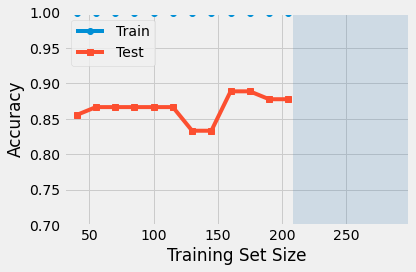

In [27]:
rfc = RandomForestClassifier(n_estimators=100,random_state=123)
rfc.fit(X_train,y_train)
rfc_cv = model_selection.cross_val_score(rfc,X=X_train, y=y_train,cv=10)
print(f'Best score: {cv_scores.mean()}')

pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,15)

for i in intervals:
    rfc.fit(X_train[:i], y_train[:i])
    p_train = rfc.score(X_train[:i], y_train[:i])
    p_test = rfc.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.7, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

#### The larger the training size (the number of trees), the more accurate random forest classifier is.

# Naive Bayes